In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#from empyrical import max_drawdown,cum_returns_final,cum_returns,sortino_ratio,sharpe_ratio,calmar_ratio,annual_return,annual_volatility

import matplotlib.pyplot as plt

import time
import datetime as dt
from datetime import timedelta
#from pytz import timezone

#import yfinance as yf
from datetime import date
#import itertools as it


In [2]:
from platform import python_version

print(python_version())

3.7.4


# LOAD DATA

In [3]:
import_path = '/Users/niclaswolnerhanssen/Desktop/LINC/Sentiment LYNX/1_DATA_MINING/'

BLOOMBERG_TOT = pd.read_excel(
    import_path+'BLOOMBERG_TOT.xlsx',index_col=0)
BLOOMBERG_POS = pd.read_excel(
    import_path+'BLOOMBERG_POS.xlsx',index_col=0)
REDDIT_TOT = pd.read_excel(
    import_path+'REDDIT_TOT.xlsx',index_col=0)
REDDIT_POS = pd.read_excel(
    import_path+'REDDIT_POS.xlsx',index_col=0)
TWITTER_TOT = pd.read_excel(
    import_path+'TWITTER_TOT.xlsx',index_col=0)
TWITTER_POS = pd.read_excel(
    import_path+'TWITTER_POS.xlsx',index_col=0)
XLK_OPEN_ETF = pd.read_excel(
    import_path+'XLK_OPEN_ETF.xlsx',index_col=0)
XLK_CLOSE_ETF = pd.read_excel(
    import_path+'XLK_CLOSE_ETF.xlsx',index_col=0)
STOCK_PRICES_CLOSE = pd.read_excel(
    import_path+'STOCK_PRICES_CLOSE.xlsx',index_col=0)
STOCK_PRICES_OPEN = pd.read_excel(
    import_path+'STOCK_PRICES_OPEN.xlsx',index_col=0)

# Data table visualization

### Bloomberg

In [4]:
BLOOMBERG_TOT.head()

AAPL  ACN  ADBE  ADI  ADP  ADSK  AKAM  AMAT   AMD  ANET  ...  TER  \
Dates                                                                ...        
2020-11-25  2023   66    50   52   16   163    10    13   721    36  ...    9   
2020-11-26  1218   64   104   18    9   110    13     5   739     7  ...   18   
2020-11-27   635   32    30    6    6    19    10     3   210     3  ...    5   
2020-11-30   794   38    58    4   14    20    11     5   291     3  ...    2   
2020-12-01  2996   90   101   25    9    26    19    10  2024     9  ...   10   

            TRMB  TXN  TYL   V  VRSN  WDC  WU  XLNX  ZBRA  
Dates                                                      
2020-11-25     9   13   12  93     6    9  74    12    15  
2020-11-26     2   14   13  56     4   11  44    15    13  
2020-11-27     1    3    3  30     2   11  24     4     3  
2020-11-30     2   10    2  36     3    4  24     7    12  
2020-12-01     6   14    4  98     7   26  40    38    12  

[5 rows x 75 columns]

In [5]:
BLOOMBERG_POS.head()

AAPL  ACN  ADBE  ADI  ADP  ADSK  AKAM  AMAT  AMD  ANET  ...  TER  \
Dates                                                               ...        
2020-11-25    11    7     5   14    1    57     2     3   85     1  ...    1   
2020-11-26     7    5     6   14    1    28     1     3   86     1  ...    1   
2020-11-27     6    3     8   14    1     3     1     3   21     1  ...    2   
2020-11-30     6    1    14   14    1     7     2     3   42     1  ...    2   
2020-12-01    23    8    31    1    1     5     1     3  260     1  ...    2   

            TRMB  TXN  TYL   V  VRSN  WDC  WU  XLNX  ZBRA  
Dates                                                      
2020-11-25     1    1    1  13     4    3   6     1     1  
2020-11-26     1    1    1   2     4    3   1     1     2  
2020-11-27     1    1    1   4     4    3   1     1     2  
2020-11-30     1    3    1   1     4    3   1     3     2  
2020-12-01     1    5    1  12     4    4   1     6     2  

[5 rows x 75 columns]

### Twitter

In [6]:
TWITTER_TOT.head()

AAPL  ACN  ADBE  ADI  ADP  ADSK  AKAM  AMAT  AMD  ANET  ...  TER  \
Date                                                                ...        
2020-11-25     1    0     0    0    0     0     0     0    0     0  ...    0   
2020-11-26     0    0     0    0    0     0     0     0    0     0  ...    0   
2020-11-29     0    0     0    1    0     0     0     0    0     0  ...    0   
2020-11-30     0    0     1    0    0     0     0     0    0     0  ...    0   
2020-12-01     0    0     0    0    0     0     0     0    0     0  ...    0   

            TRMB  TXN  TYL  V  VRSN  WDC  WU  XLNX  ZBRA  
Date                                                      
2020-11-25     0    0    0  0     0    0   0     0     0  
2020-11-26     0    0    0  0     0    0   0     0     0  
2020-11-29     0    0    0  0     0    0   0     0     0  
2020-11-30     0    0    0  0     0    0   0     0     0  
2020-12-01     0    0    0  0     0    0   0     0     0  

[5 rows x 75 columns]

In [7]:
TWITTER_POS.head()

AAPL  ACN  ADBE  ADI  ADP  ADSK  AKAM  AMAT  AMD  ANET  ...  TER  \
Date                                                                ...        
2020-11-25     1    0     0    0    0     0     0     0    0     0  ...    0   
2020-11-26     0    0     0    0    0     0     0     0    0     0  ...    0   
2020-11-29     0    0     0    1    0     0     0     0    0     0  ...    0   
2020-11-30     0    0     1    0    0     0     0     0    0     0  ...    0   
2020-12-01     0    0     0    0    0     0     0     0    0     0  ...    0   

            TRMB  TXN  TYL  V  VRSN  WDC  WU  XLNX  ZBRA  
Date                                                      
2020-11-25     0    0    0  0     0    0   0     0     0  
2020-11-26     0    0    0  0     0    0   0     0     0  
2020-11-29     0    0    0  0     0    0   0     0     0  
2020-11-30     0    0    0  0     0    0   0     0     0  
2020-12-01     0    0    0  0     0    0   0     0     0  

[5 rows x 75 columns]

### Reddit

In [8]:
REDDIT_TOT.head()

AAPL  ACN  ADBE  ADI  ADP  ADSK  AKAM  AMAT  AMD  ANET  ...  TER  \
Date                                                                ...        
2020-11-25    76    0     0    0    0     1     0     0   17     0  ...    0   
2020-11-27    40    0     0    0    0     1     0     1   21     0  ...    0   
2020-11-30    22    0     3    0    0     0     0     1    8     0  ...    0   
2020-12-01   171    0     3    0    0     0     0     0  119     0  ...    0   
2020-12-02   120    0     0    0    2     0     0     0   24     0  ...    0   

            TRMB  TXN  TYL  V  VRSN  WDC  WU  XLNX  ZBRA  
Date                                                      
2020-11-25     0    0    0  0     0    0   0     0     0  
2020-11-27     0    0    0  0     0    0   0     0     0  
2020-11-30     0    0    0  0     0    0   0     0     0  
2020-12-01     0    0    0  0     0    0   0     0     0  
2020-12-02     0    0    0  0     0    0   0     0     0  

[5 rows x 75 columns]

In [9]:
REDDIT_POS.head()

AAPL  ACN  ADBE  ADI  ADP  ADSK  AKAM  AMAT  AMD  ANET  ...  TER  \
Date                                                                ...        
2020-11-25    28    0     0    0    0     1     0     0    4     0  ...    0   
2020-11-27    10    0     0    0    0     0     0     0   12     0  ...    0   
2020-11-30    10    0     2    0    0     0     0     1    4     0  ...    0   
2020-12-01    65    0     1    0    0     0     0     0   49     0  ...    0   
2020-12-02    55    0     0    0    1     0     0     0   13     0  ...    0   

            TRMB  TXN  TYL  V  VRSN  WDC  WU  XLNX  ZBRA  
Date                                                      
2020-11-25     0    0    0  0     0    0   0     0     0  
2020-11-27     0    0    0  0     0    0   0     0     0  
2020-11-30     0    0    0  0     0    0   0     0     0  
2020-12-01     0    0    0  0     0    0   0     0     0  
2020-12-02     0    0    0  0     0    0   0     0     0  

[5 rows x 75 columns]

# Filter for small number of comments

In [10]:
#skip since there are already a small number of comments

# Exponential weighting & percentage positives

First we exponentially transforms the aggregated counts to lagg the counts. This will result in a exponential "tail" of the counts.

In [11]:
Ex_MA = 5

In [12]:
BLOOMBERG_TOT_EXP = BLOOMBERG_TOT.ewm(span=Ex_MA).mean(skipna=True)
BLOOMBERG_POS_EXP = BLOOMBERG_POS.ewm(span=Ex_MA).mean(skipna=True)
#Positve in relation to the total:
BLOOMBERG     = BLOOMBERG_POS_EXP.div(BLOOMBERG_TOT_EXP)

In [13]:
REDDIT_TOT_EXP = REDDIT_TOT.ewm(span=Ex_MA).mean(skipna=True)
REDDIT_POS_EXP = REDDIT_POS.ewm(span=Ex_MA).mean(skipna=True)
#Positve in relation to the total:
REDDIT     = REDDIT_POS_EXP.div(REDDIT_TOT_EXP)

In [14]:
TWITTER_TOT_EXP = TWITTER_TOT.ewm(span=Ex_MA).mean(skipna=True)
TWITTER_POS_EXP = TWITTER_POS.ewm(span=Ex_MA).mean(skipna=True)
#Positve in relation to the total:
TWITTER     = TWITTER_POS_EXP.div(TWITTER_TOT_EXP)

In [15]:
BLOOMBERG.head()

AAPL       ACN      ADBE       ADI       ADP      ADSK  \
Dates                                                                    
2020-11-25  0.005437  0.106061  0.100000  0.269231  0.062500  0.349693   
2020-11-26  0.005584  0.089506  0.067961  0.443038  0.084746  0.301829   
2020-11-27  0.006630  0.090812  0.117002  0.718919  0.110465  0.285233   
2020-11-30  0.006942  0.067978  0.168887  1.073113  0.090028  0.295208   
2020-12-01  0.007424  0.079627  0.240869  0.510884  0.097101  0.271441   

                AKAM      AMAT       AMD      ANET  ...       TER      TRMB  \
Dates                                               ...                       
2020-11-25  0.200000  0.230769  0.117892  0.027778  ...  0.111111  0.111111   
2020-11-26  0.118644  0.365854  0.116972  0.053763  ...  0.069444  0.208333   
2020-11-27  0.110577  0.522936  0.113488  0.089202  ...  0.148148  0.333333   
2020-11-30  0.140252  0.552408  0.122712  0.128205  ...  0.254630  0.386905   
2020-12-01  0.094772  0.417546  0.127064  0.121056  ...  0.228196  0.256691   

                 TXN       TYL         V      VRSN       WDC        WU  \
Dates                                                                    
2020-11-25  0.076923  0.083333  0.139785  0.666667  0.333333  0.081081   
2020-11-26  0.073529  0.079365  0.090395  0.833333  0.294118  0.053571   
2020-11-27  0.116564  0.124183  0.102249  1.151515  0.283582  0.050258   
2020-11-30  0.199664  0.180556  0.077527  1.220657  0.382353  0.047727   
2020-12-01  0.276440  0.202107  0.103378  0.849950  0.228407  0.038089   

                XLNX      ZBRA  
Dates                           
2020-11-25  0.083333  0.066667  
2020-11-26  0.072464  0.115942  
2020-11-27  0.109195  0.206061  
2020-11-30  0.221601  0.186544  
2020-12-01  0.174374  0.178070  

[5 rows x 75 columns]

In [16]:
REDDIT.head()

AAPL  ACN      ADBE  ADI  ADP  ADSK  AKAM  AMAT       AMD  \
Date                                                                        
2020-11-25  0.368421  NaN       NaN  NaN  NaN   1.0   NaN   NaN  0.235294   
2020-11-27  0.316176  NaN       NaN  NaN  NaN   0.4   NaN   0.0  0.453608   
2020-11-30  0.353100  NaN  0.666667  NaN  NaN   0.4   NaN   0.6  0.466165   
2020-12-01  0.373545  NaN  0.466667  NaN  NaN   0.4   NaN   0.6  0.419493   
2020-12-02  0.411139  NaN  0.466667  NaN  0.5   0.4   NaN   0.6  0.444668   

            ANET  ...  TER  TRMB  TXN  TYL   V  VRSN  WDC  WU  XLNX  ZBRA  
Date              ...                                                      
2020-11-25   NaN  ...  NaN   NaN  NaN  NaN NaN   NaN  NaN NaN   NaN   NaN  
2020-11-27   NaN  ...  NaN   NaN  NaN  NaN NaN   NaN  NaN NaN   NaN   NaN  
2020-11-30   NaN  ...  NaN   NaN  NaN  NaN NaN   NaN  NaN NaN   NaN   NaN  
2020-12-01   NaN  ...  NaN   NaN  NaN  NaN NaN   NaN  NaN NaN   NaN   NaN  
2020-12-02   NaN  ...  NaN   NaN  NaN  NaN NaN   NaN  NaN NaN   NaN   NaN  

[5 rows x 75 columns]

In [17]:
TWITTER.head()

AAPL  ACN  ADBE  ADI  ADP  ADSK  AKAM  AMAT  AMD  ANET  ...  TER  \
Date                                                                ...        
2020-11-25   1.0  NaN   NaN  NaN  NaN   NaN   NaN   NaN  NaN   NaN  ...  NaN   
2020-11-26   1.0  NaN   NaN  NaN  NaN   NaN   NaN   NaN  NaN   NaN  ...  NaN   
2020-11-29   1.0  NaN   NaN  1.0  NaN   NaN   NaN   NaN  NaN   NaN  ...  NaN   
2020-11-30   1.0  NaN   1.0  1.0  NaN   NaN   NaN   NaN  NaN   NaN  ...  NaN   
2020-12-01   1.0  NaN   1.0  1.0  NaN   NaN   NaN   NaN  NaN   NaN  ...  NaN   

            TRMB  TXN  TYL   V  VRSN  WDC  WU  XLNX  ZBRA  
Date                                                       
2020-11-25   NaN  NaN  NaN NaN   NaN  NaN NaN   NaN   NaN  
2020-11-26   NaN  NaN  NaN NaN   NaN  NaN NaN   NaN   NaN  
2020-11-29   NaN  NaN  NaN NaN   NaN  NaN NaN   NaN   NaN  
2020-11-30   NaN  NaN  NaN NaN   NaN  NaN NaN   NaN   NaN  
2020-12-01   NaN  NaN  NaN NaN   NaN  NaN NaN   NaN   NaN  

[5 rows x 75 columns]

# Counts analysis

How many stocks with nonnull values?

### BLOOMBERG

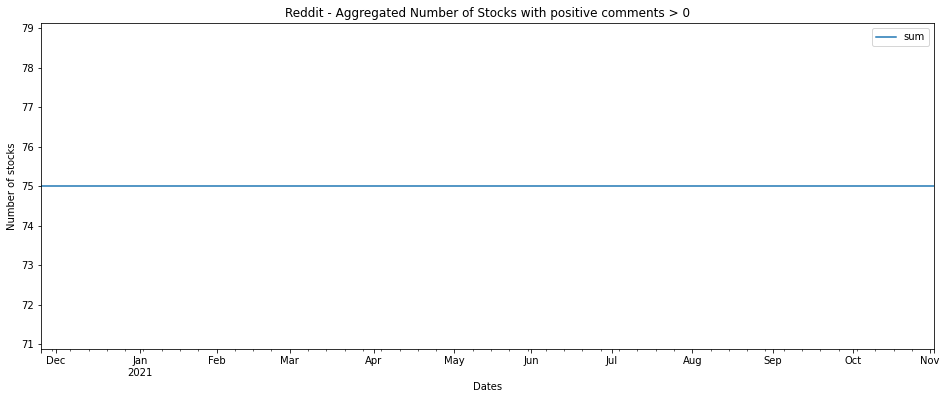

In [18]:
POS_exp_2_counts = BLOOMBERG.copy()
POS_exp_2_counts[POS_exp_2_counts>0]=1
POS_exp_2_counts['sum'] = POS_exp_2_counts.sum(axis=1)
exponential_sum = POS_exp_2_counts[['sum']]

fig, ax = plt.subplots(figsize=(16,6))
exponential_sum.plot(ax=ax)
#plt.axhline(y=0.5, color='black', linestyle='--')
plt.ylabel('Number of stocks');
ax.set_title('Reddit - Aggregated Number of Stocks with positive comments > 0');

### Reddit

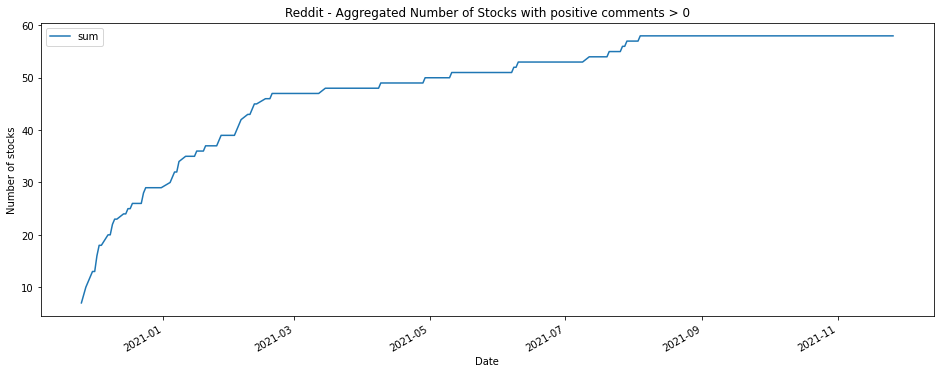

In [19]:
POS_exp_2_counts = REDDIT.copy()
POS_exp_2_counts[POS_exp_2_counts>0]=1
POS_exp_2_counts['sum'] = POS_exp_2_counts.sum(axis=1)
exponential_sum = POS_exp_2_counts[['sum']]

fig, ax = plt.subplots(figsize=(16,6))
exponential_sum.plot(ax=ax)
plt.ylabel('Number of stocks');
ax.set_title('Reddit - Aggregated Number of Stocks with positive comments > 0');

### Twitter

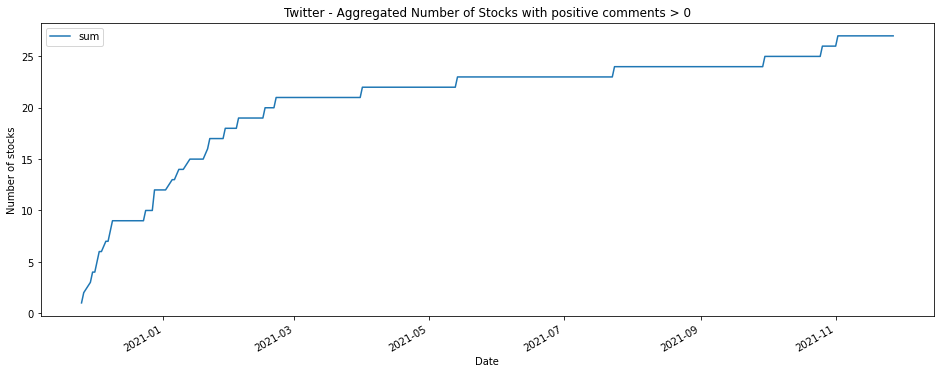

In [20]:
POS_exp_2_counts = TWITTER.copy()
POS_exp_2_counts[POS_exp_2_counts>0]=1
POS_exp_2_counts['sum'] = POS_exp_2_counts.sum(axis=1)
exponential_sum = POS_exp_2_counts[['sum']]

fig, ax = plt.subplots(figsize=(16,6))
exponential_sum.plot(ax=ax)
#plt.axhline(y=0.5, color='black', linestyle='--')
plt.ylabel('Number of stocks');
ax.set_title('Twitter - Aggregated Number of Stocks with positive comments > 0');

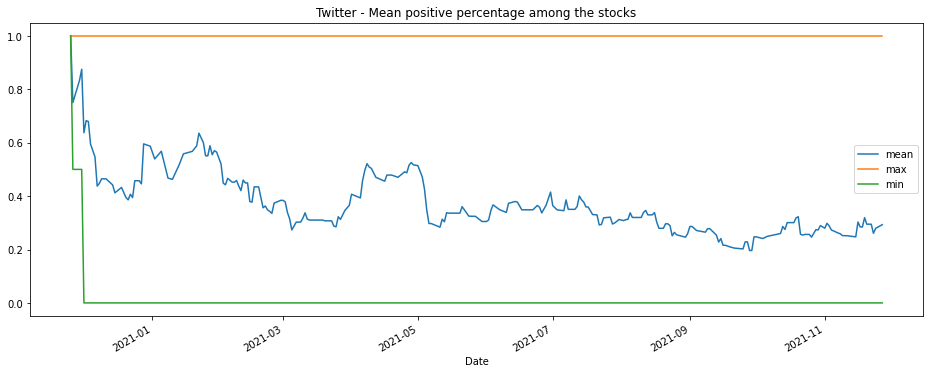

In [21]:
fig, ax = plt.subplots(figsize=(16,6))

TWITTER_mean = TWITTER.copy()
TWITTER_mean['mean'] = TWITTER_mean.mean(axis=1,skipna=True)
TWITTER_mean['min'] = TWITTER.min(axis=1,skipna=True)
TWITTER_mean['max'] = TWITTER.max(axis=1,skipna=True)



TWITTER_mean[['mean','max','min']].plot(ax=ax)
ax.set_title('Twitter - Mean positive percentage among the stocks');

Lets check so that all stocks does not have the same value:

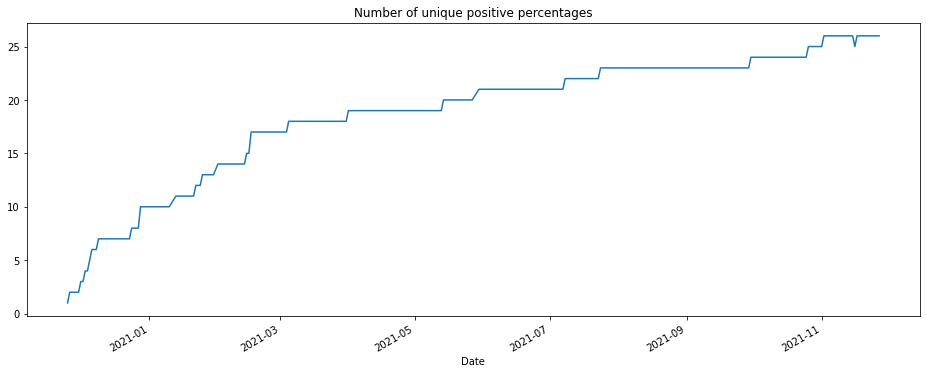

In [22]:
fig, ax = plt.subplots(figsize=(16,6))
TWITTER_unique = TWITTER.copy()
daily_uniques = []

for i in TWITTER_unique.index:
    d_uniques = len(TWITTER_unique.loc[i].dropna().unique())
    daily_uniques.append(d_uniques)
    
TWITTER_unique['Daily Uniques'] =  daily_uniques 
TWITTER_unique['Daily Uniques'].plot(ax=ax)
ax.set_title('Number of unique positive percentages');

# ZSCORE TRANSFORMATION

$z_{i}=  \frac{x_{i}- \bar{x}}{ \sigma} $

$\mu_{z} = 0$

$ \sigma_{z} = 1 $

$ \sum \limits _{i=1} ^{N} \frac{x_{i}- \bar{x}}{ \sigma} = 0 $

Proof:

$ \frac{1}{ \sigma} \sum \limits _{i=1} ^{N} x_{i}- \bar{x} $


$ \frac{1}{ \sigma} (\sum \limits _{i=1} ^{N} x_{i}- \sum \limits _{i=1} ^{N}\bar{x}) $

$ \frac{1}{ \sigma} (\sum \limits _{i=1} ^{N} x_{i}- N\bar{x}) $

$ \bar{x} =  \frac{\sum \limits _{i=1} ^{N}x_{i}}{N} $

$ \frac{1}{ \sigma} (\sum \limits _{i=1} ^{N} x_{i}-\sum \limits _{i=1} ^{N} x_{i} ) = 0$

In the previous section we took the positive comments for the day and divided that by the total comments for that day to generate a percentage positive of comments for the each stock on each day. 

Next we want to know how todays positive percentage relates to a window back in time for each stock. Are people out there saying more positive things about Apple today than usually?

Z-score transformation is a method to transform elements in a set relative to the sets mean and scaled by its standard deviation. 

The z-score transformation will transform todays positive percentage of the stock into a metric representing the distance from the the arithmetic mean of the historical window of percentage difference and then scaling that by the standard distance (standard deviation) of the positve percentage.  

In [23]:
#historic
def zscore_columns(data_df,look_back_window = 30,skipna=True):
    df = data_df.copy()
    for i in df.columns:
        df[i] = (df[i]-df[i].rolling(look_back_window).mean(skipna=skipna))/df[i].rolling(look_back_window).std(skipna=skipna)
                
    df = df[look_back_window:]
                
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
        
    return df



# ZSCORE Columns (Historical)

So first we do the zscore transformations on a rolling 20-day window, here on the bloomberg data

In [24]:
look_back_window = 20

In [25]:
BLOOMBERG_zscore_col = zscore_columns(BLOOMBERG,look_back_window = look_back_window,skipna=True)

Lets look at we had before the zscore transformation

In [26]:
BLOOMBERG.tail()

AAPL       ACN      ADBE       ADI       ADP      ADSK  \
Dates                                                                    
2021-10-27  0.012092  0.075824  0.054903  0.119239  0.101210  0.036557   
2021-10-28  0.013277  0.060198  0.041384  0.076867  0.127574  0.063755   
2021-10-29  0.018684  0.043277  0.053262  0.085872  0.175660  0.073970   
2021-11-01  0.018987  0.035332  0.054318  0.071282  0.163611  0.057692   
2021-11-02  0.016125  0.028491  0.065202  0.058503  0.142993  0.059252   

                AKAM      AMAT       AMD      ANET  ...       TER      TRMB  \
Dates                                               ...                       
2021-10-27  0.071689  0.077160  0.142753  0.126096  ...  0.265408  0.060664   
2021-10-28  0.026429  0.079605  0.141702  0.118575  ...  0.218661  0.050055   
2021-10-29  0.020438  0.085417  0.132334  0.077603  ...  0.351962  0.084737   
2021-11-01  0.016543  0.088718  0.131326  0.078841  ...  0.334318  0.079562   
2021-11-02  0.032027  0.127517  0.122200  0.216974  ...  0.312458  0.058226   

                 TXN       TYL         V      VRSN       WDC        WU  \
Dates                                                                    
2021-10-27  0.145452  0.139558  0.152942  0.168296  0.050482  0.019871   
2021-10-28  0.152211  0.147921  0.111630  0.182327  0.072090  0.026669   
2021-10-29  0.157953  0.250720  0.098966  0.096048  0.116401  0.029360   
2021-11-01  0.157174  0.275461  0.098735  0.092985  0.115269  0.022231   
2021-11-02  0.168048  0.216145  0.099600  0.088740  0.087942  0.014377   

                XLNX      ZBRA  
Dates                           
2021-10-27  0.136952  0.109022  
2021-10-28  0.192512  0.080287  
2021-10-29  0.223392  0.151984  
2021-11-01  0.221552  0.118429  
2021-11-02  0.193424  0.211368  

[5 rows x 75 columns]

And let look at how the zscore transformed values look like:

In [27]:
BLOOMBERG_zscore_col.tail()

AAPL       ACN      ADBE       ADI       ADP      ADSK  \
Dates                                                                    
2021-10-27  2.645671 -0.296304 -1.972614 -0.225310  1.916949 -0.734330   
2021-10-28  2.515290 -0.797331 -2.139751 -1.032579  2.341706 -0.038764   
2021-10-29  3.147295 -1.383669 -1.460085 -0.823933  2.855472  0.179056   
2021-11-01  2.489278 -1.636018 -1.272904 -1.044272  2.143778 -0.306738   
2021-11-02  1.568313 -1.918799 -0.804143 -1.272553  1.475940 -0.297676   

                AKAM      AMAT       AMD      ANET  ...       TER      TRMB  \
Dates                                               ...                       
2021-10-27 -0.729977 -1.165754  3.367560  0.666758  ...  1.214690  0.012690   
2021-10-28 -2.075024 -1.094100  2.514266  0.614377  ...  0.655014 -0.238007   
2021-10-29 -2.061911 -0.854591  1.640286 -0.294393  ...  1.871510  0.525519   
2021-11-01 -1.939765 -0.635380  1.400902 -0.149129  ...  1.555540  0.355578   
2021-11-02 -1.277702  1.534340  0.773966  2.955488  ...  1.255814 -0.200894   

                 TXN       TYL         V      VRSN       WDC        WU  \
Dates                                                                    
2021-10-27  0.515022  3.051623  3.496858  1.020876 -1.194967  0.597290   
2021-10-28  0.613193  2.516728  1.341201  1.090368 -0.019113  1.674374   
2021-10-29  0.712696  3.139372  0.680633 -0.019087  2.126094  1.941372   
2021-11-01  0.732592  2.629629  0.597987 -0.103210  1.787341  0.998324   
2021-11-02  1.130102  1.647419  0.587784 -0.212025  0.431900 -0.006535   

                XLNX      ZBRA  
Dates                           
2021-10-27  1.011130  0.856223  
2021-10-28  2.593637  0.294121  
2021-10-29  2.757542  1.682926  
2021-11-01  2.236368  0.879653  
2021-11-02  1.404074  2.315090  

[5 rows x 75 columns]

So now we have transformed the values to a positional value of the 20-day rolling mean of the stock. 

Lets plot the zscore transformed bloomberg values:

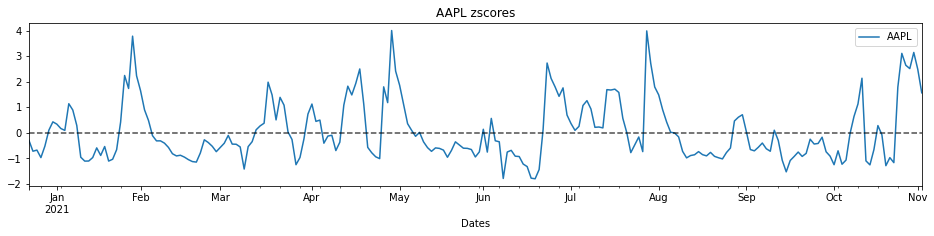

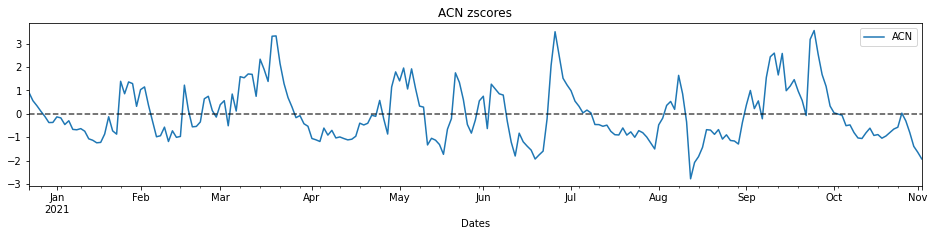

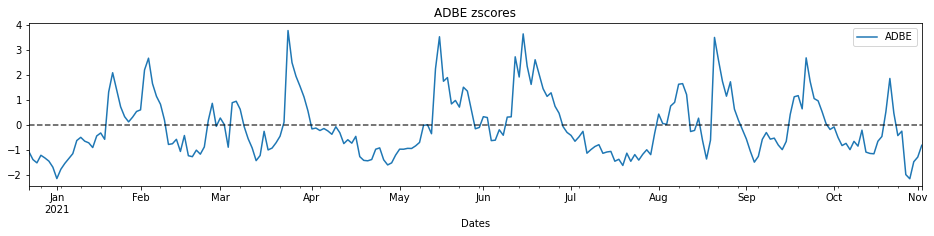

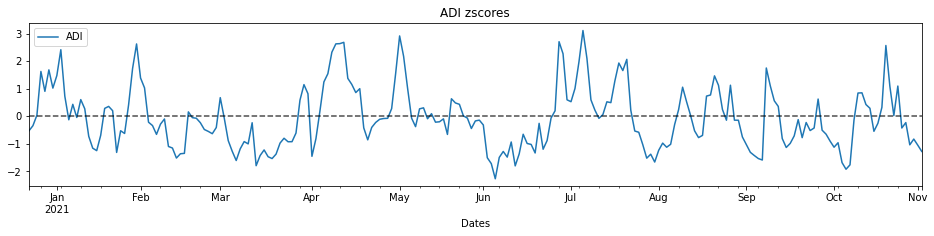

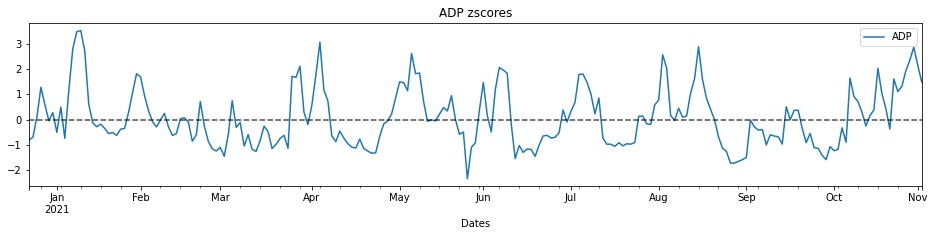

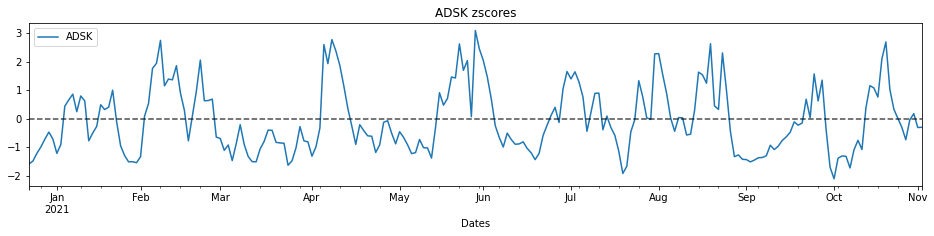

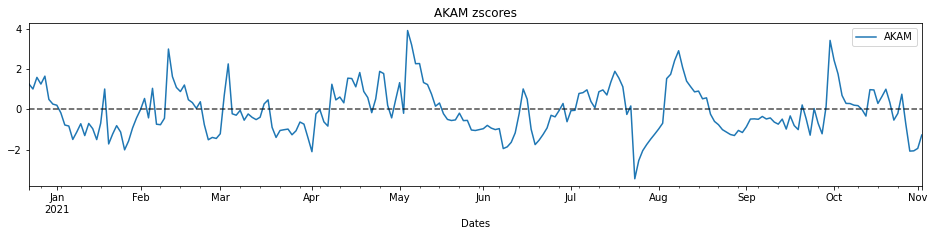

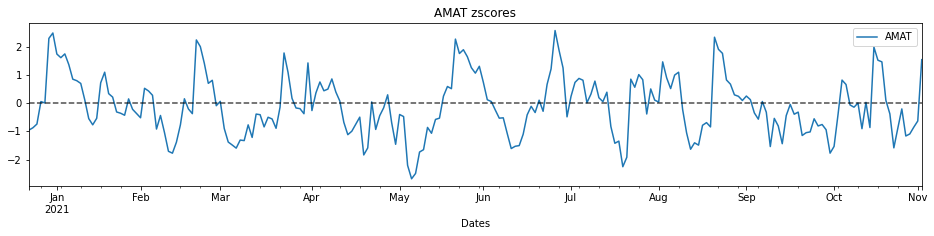

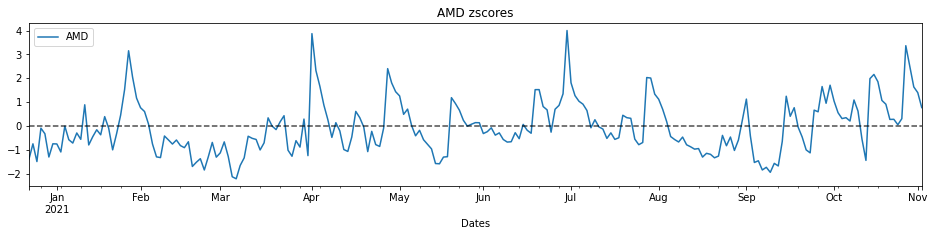

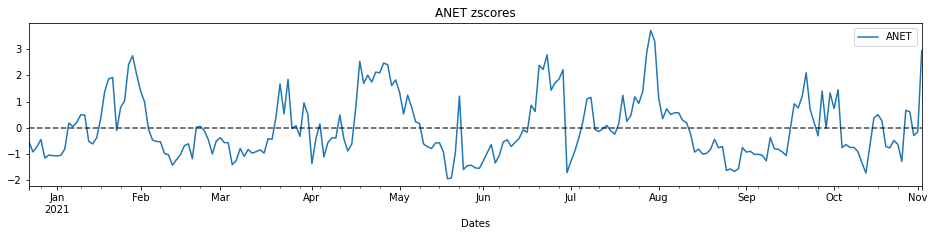

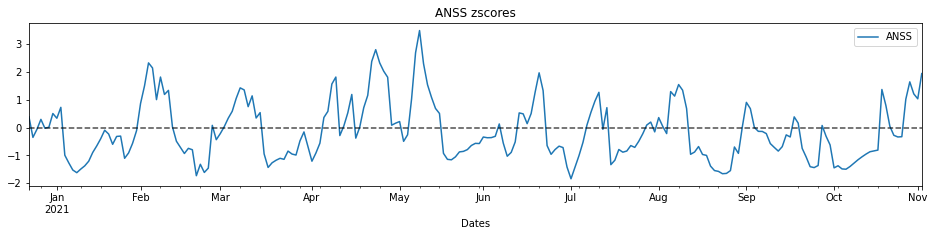

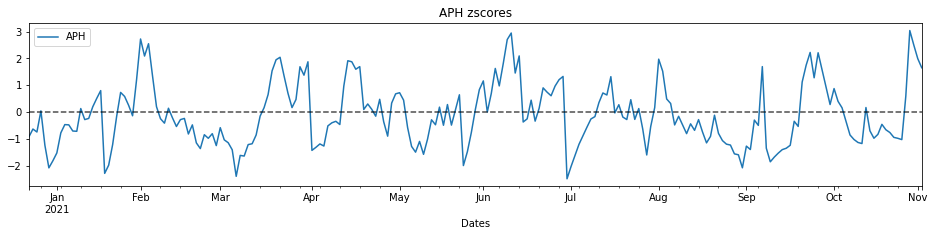

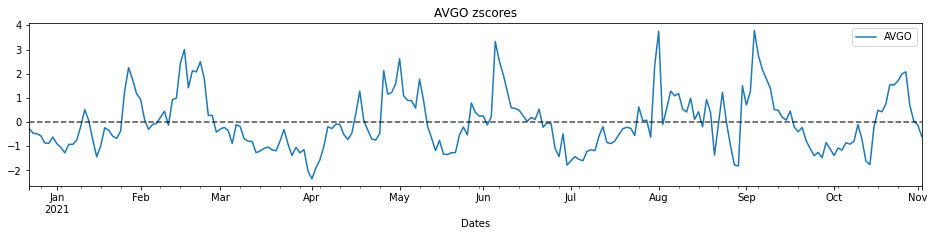

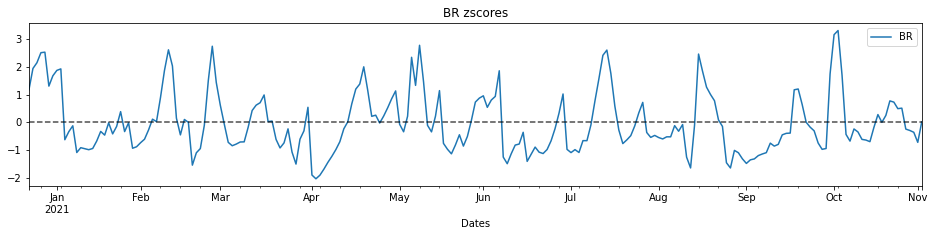

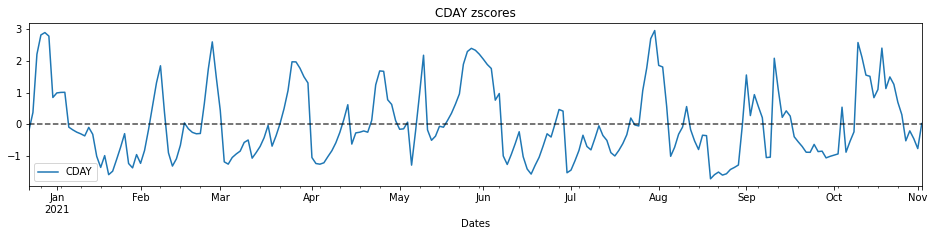

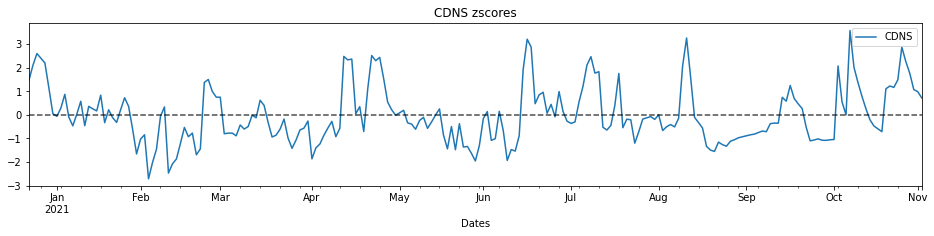

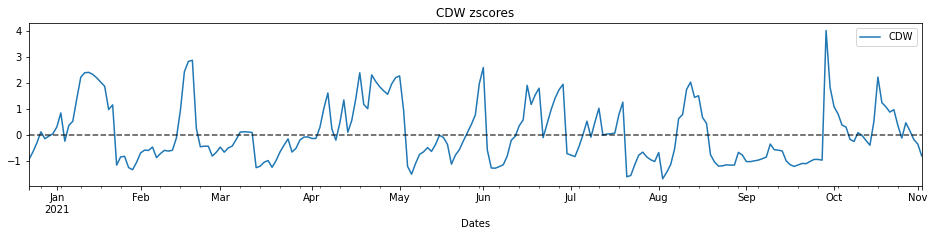

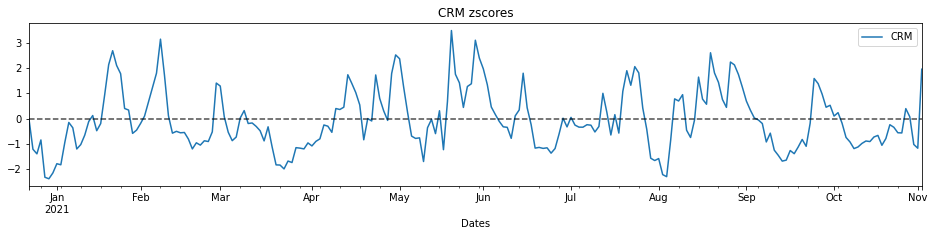

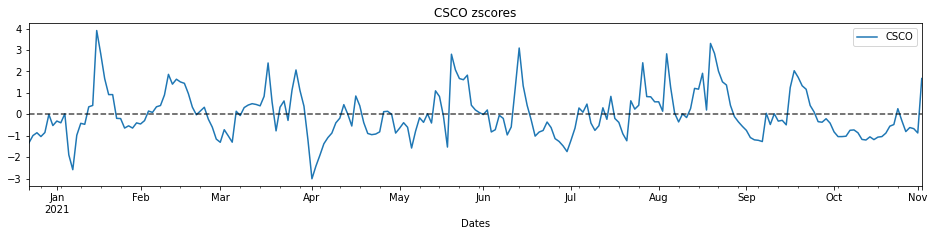

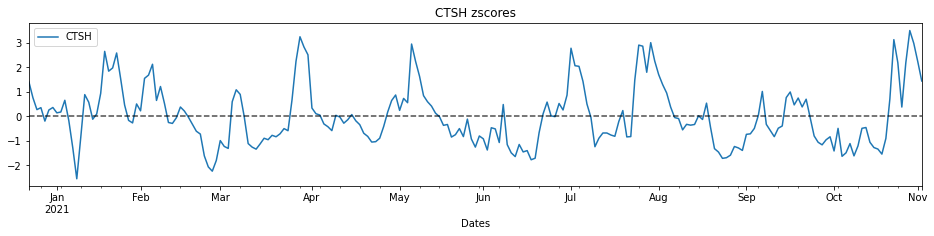

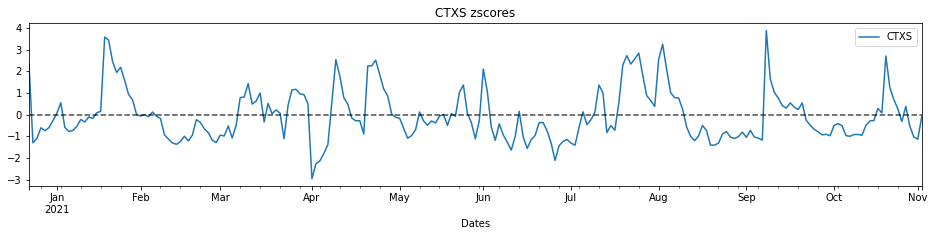

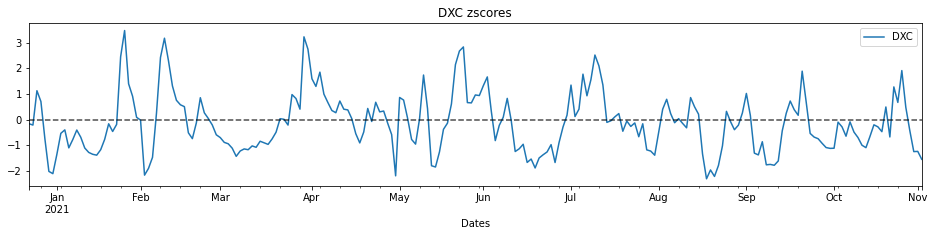

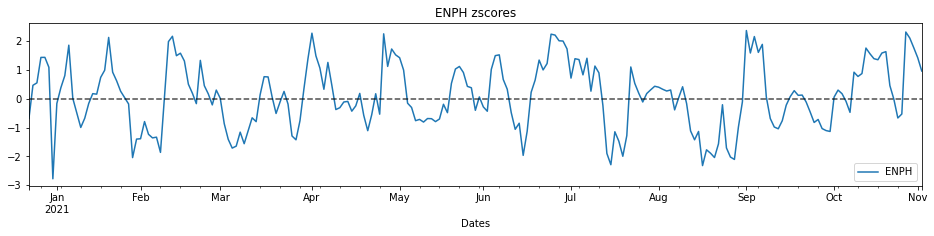

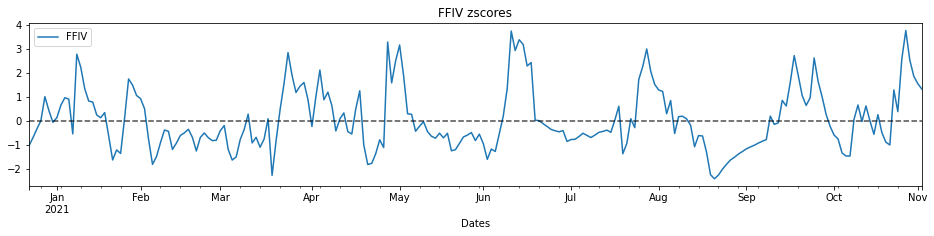

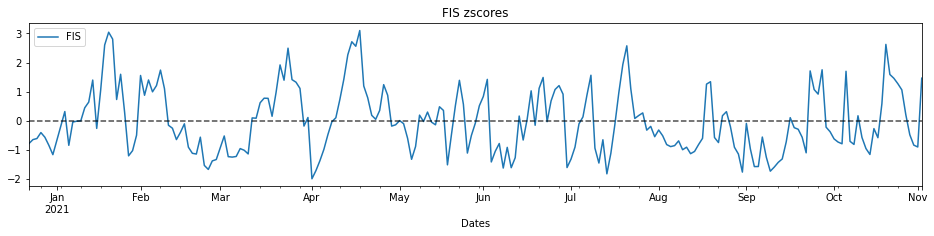

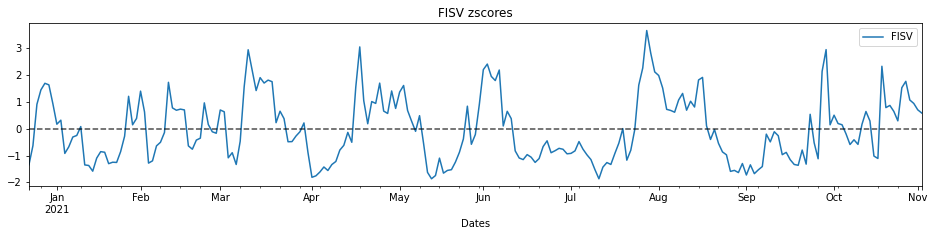

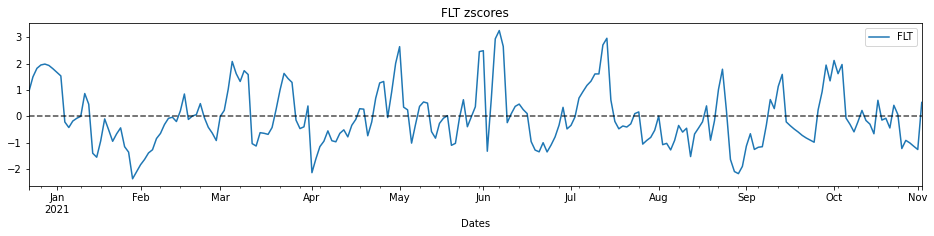

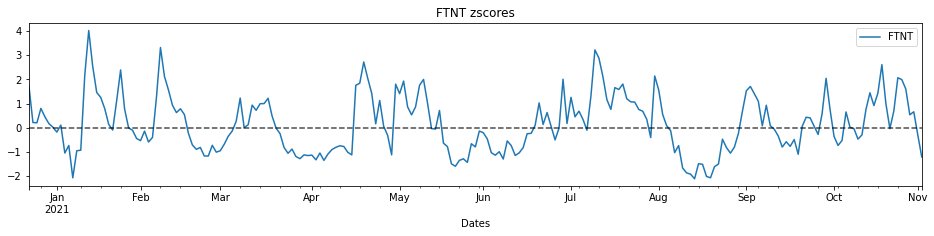

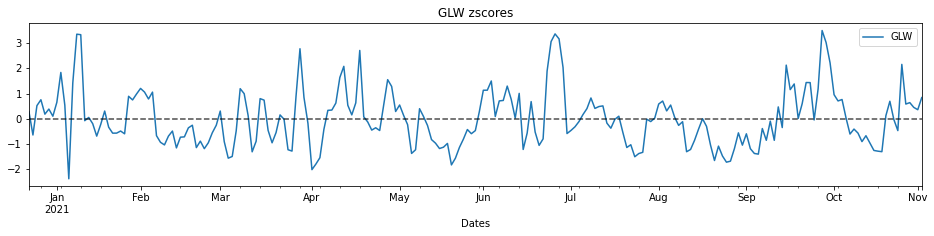

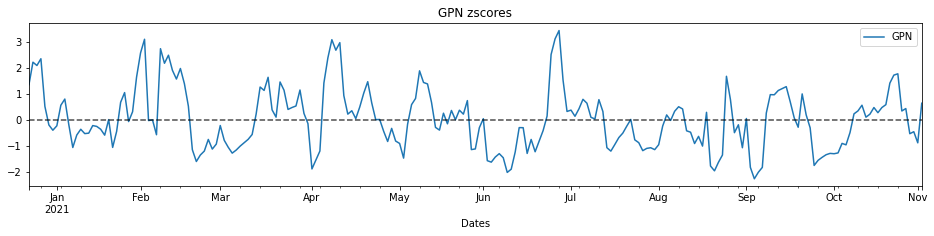

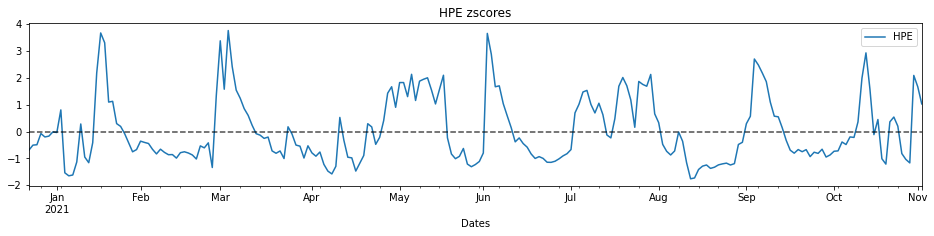

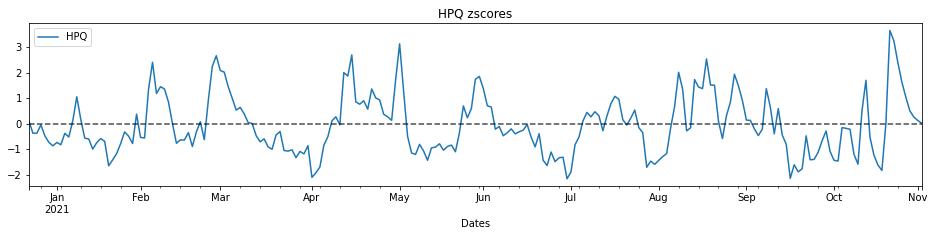

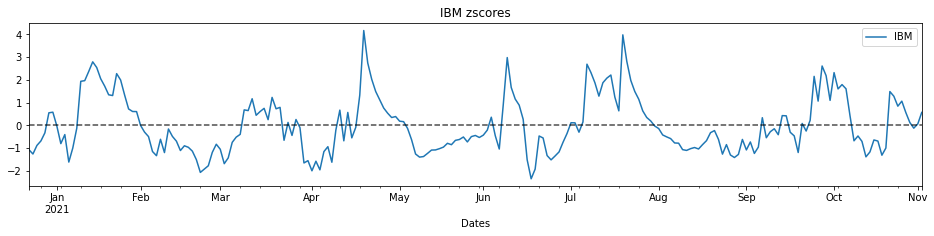

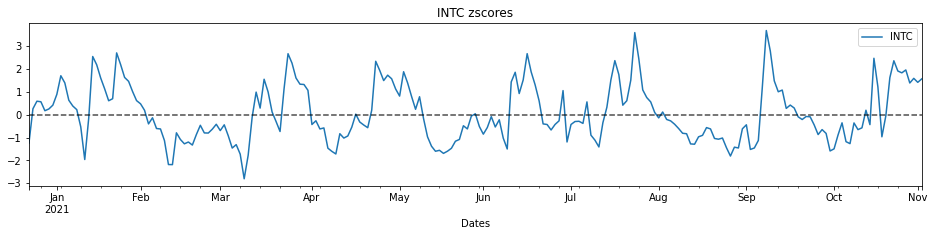

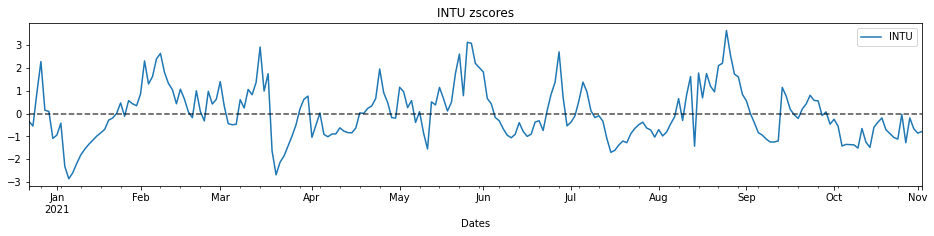

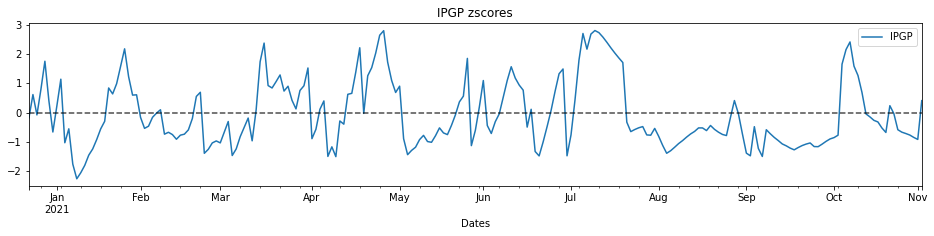

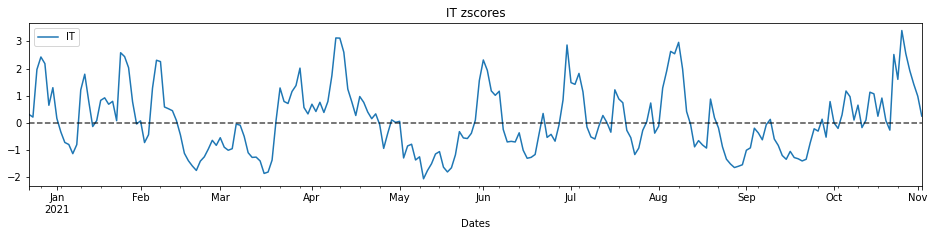

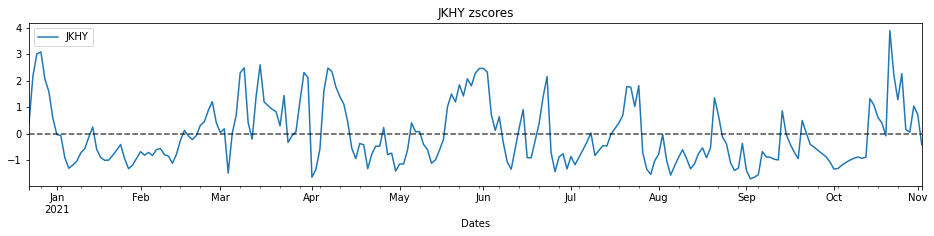

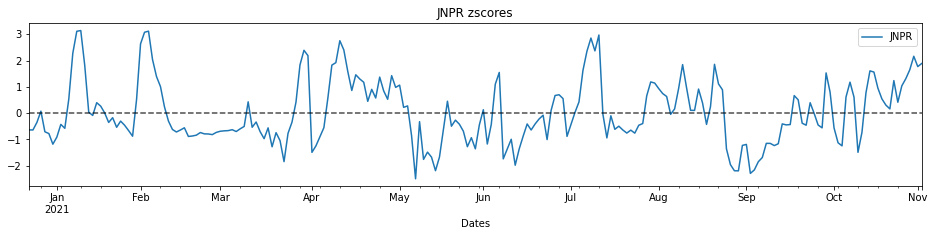

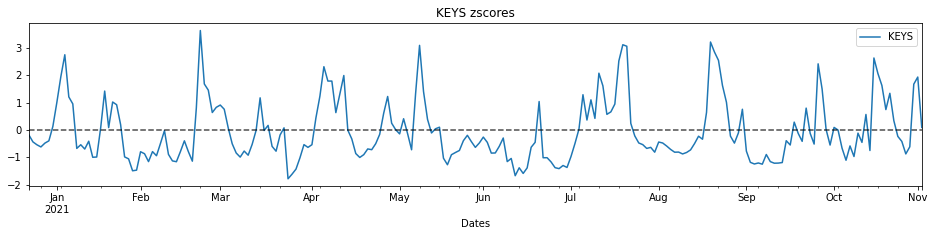

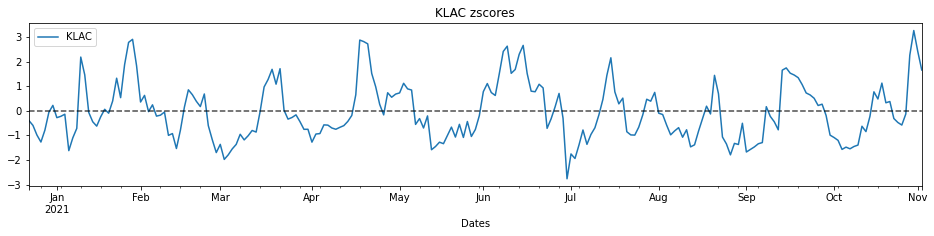

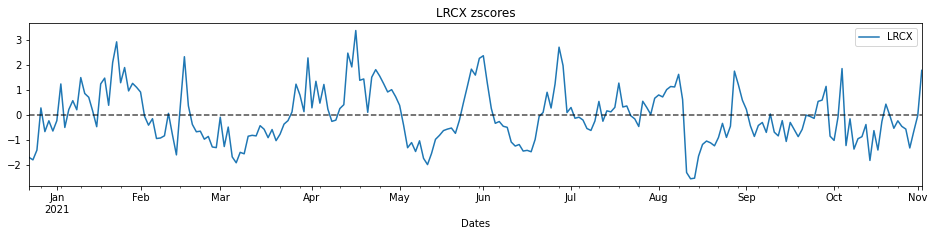

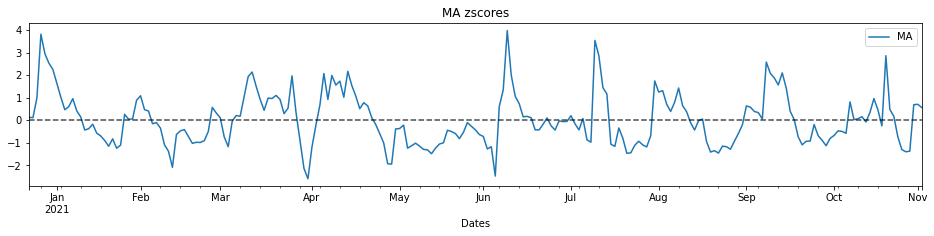

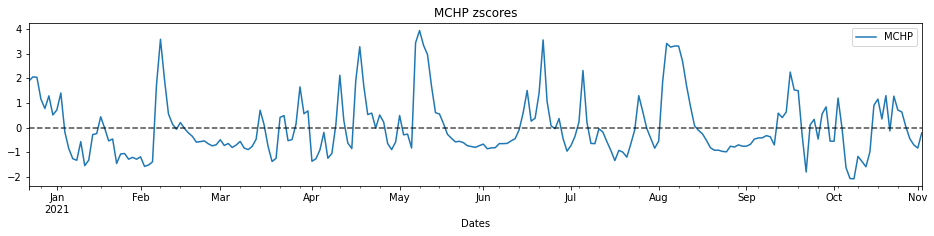

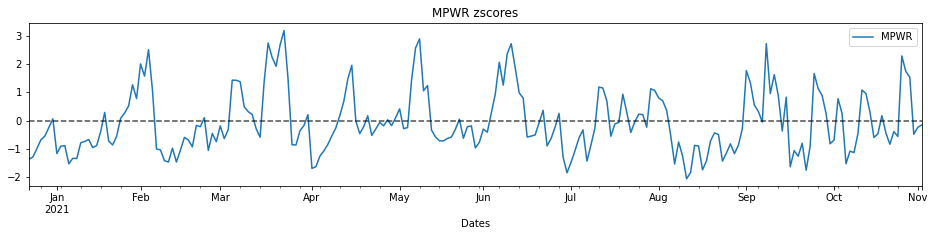

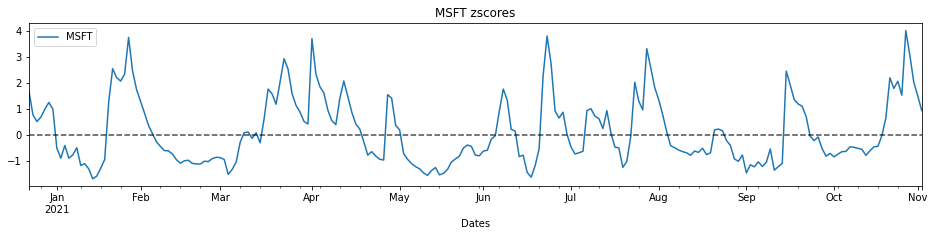

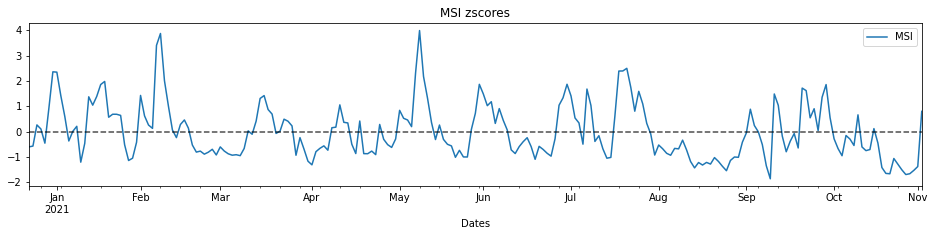

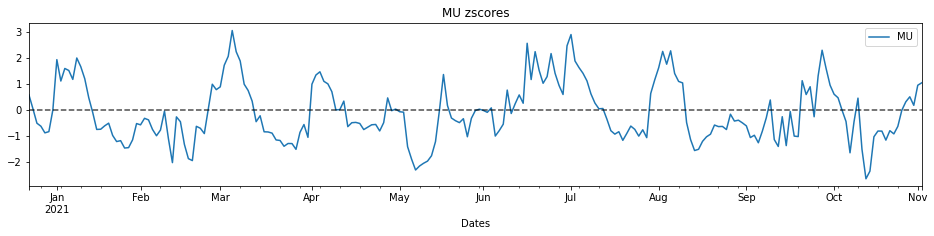

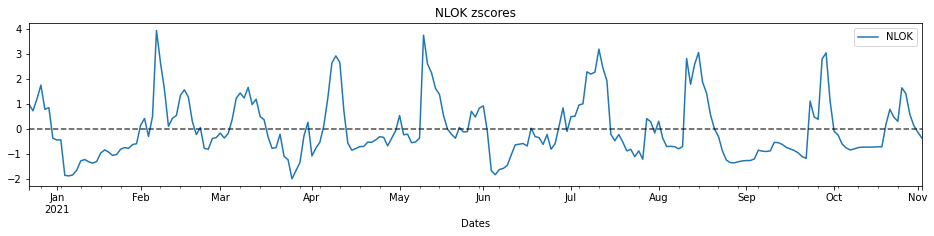

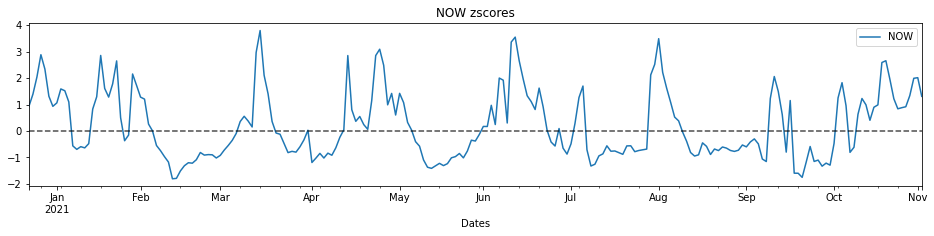

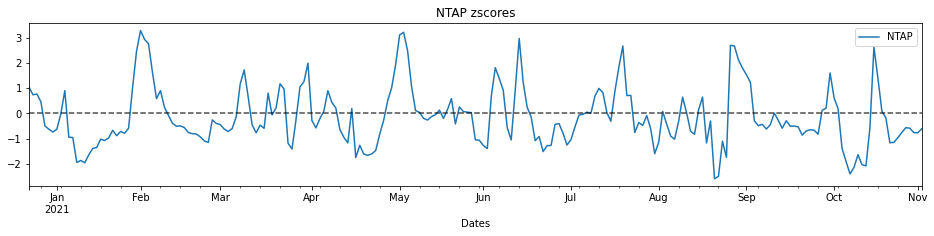

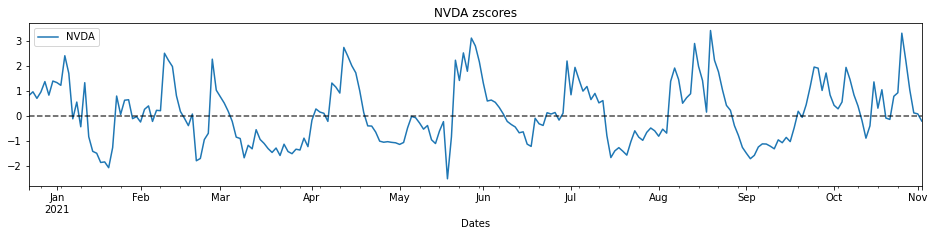

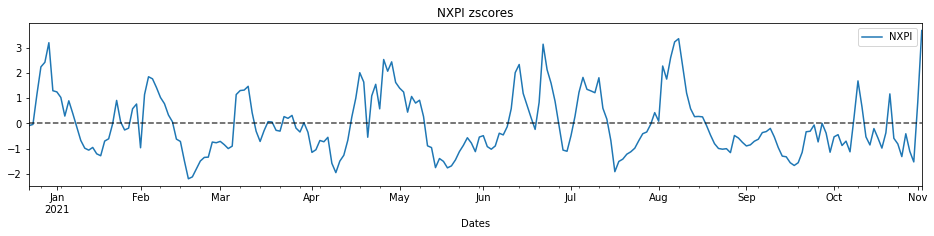

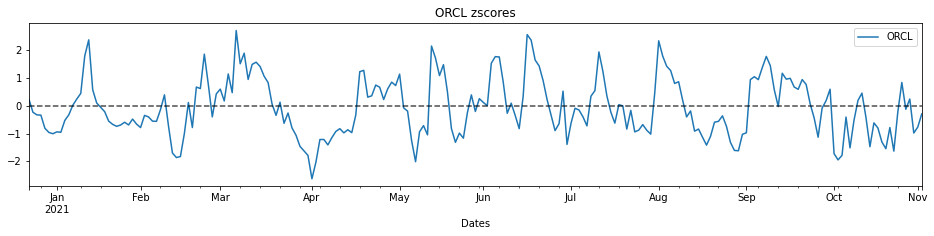

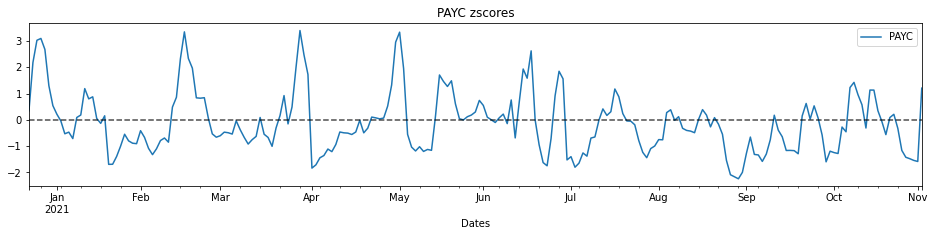

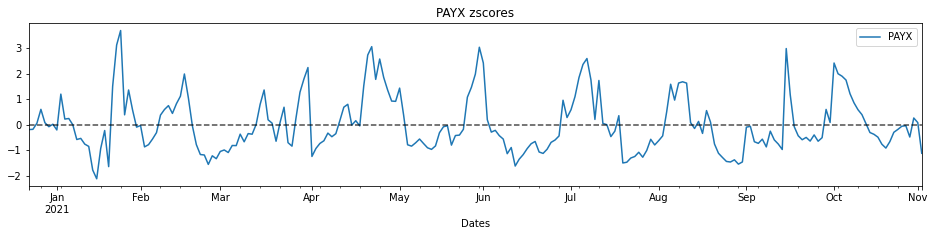

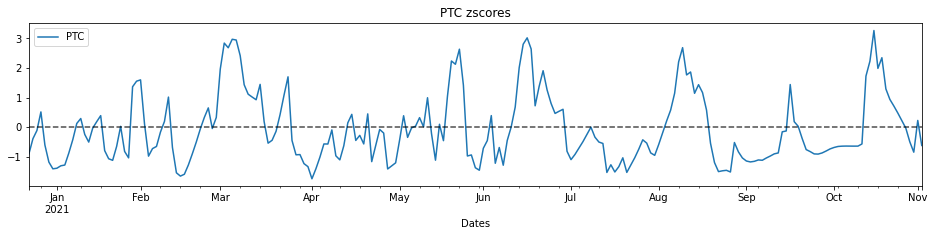

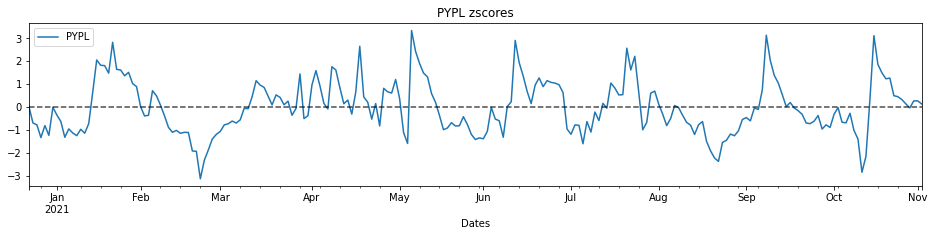

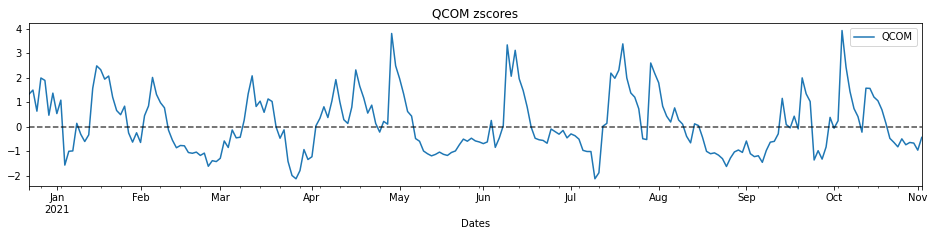

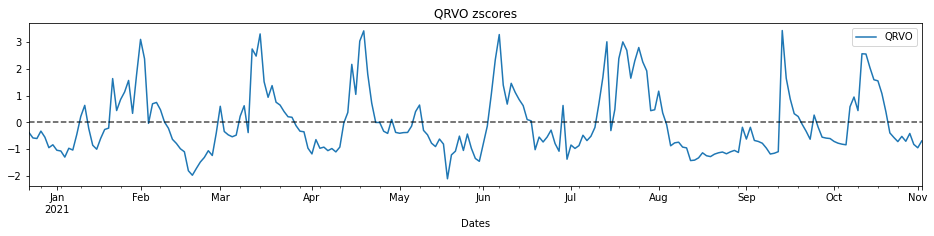

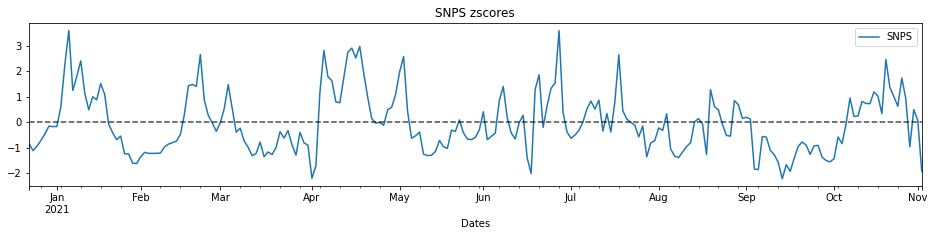

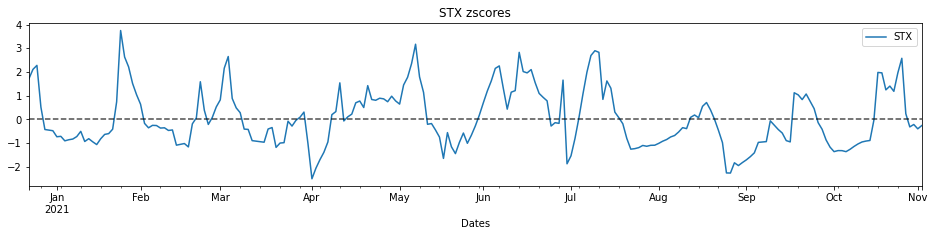

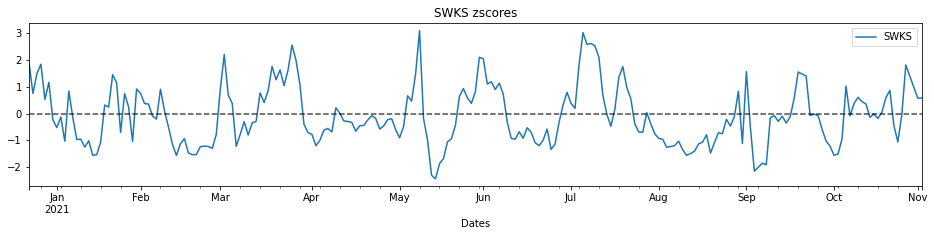

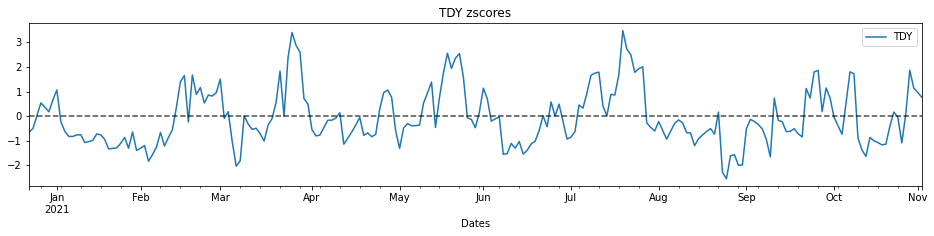

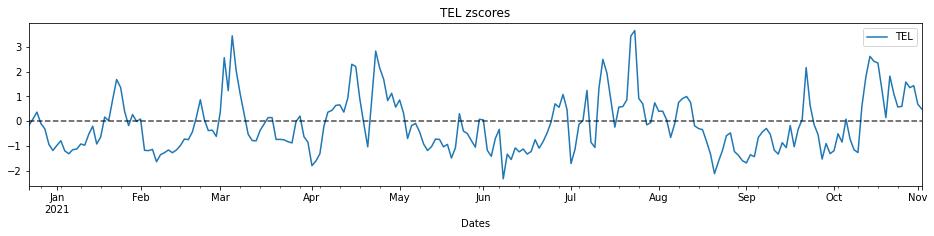

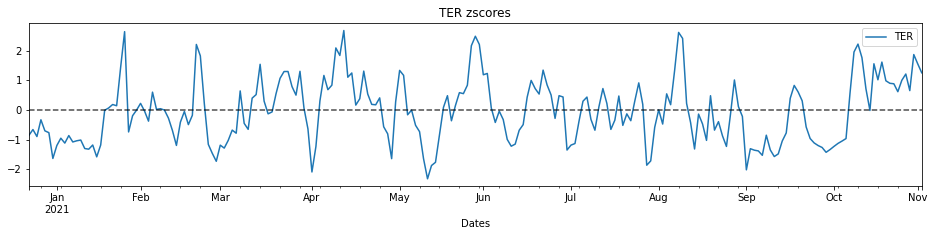

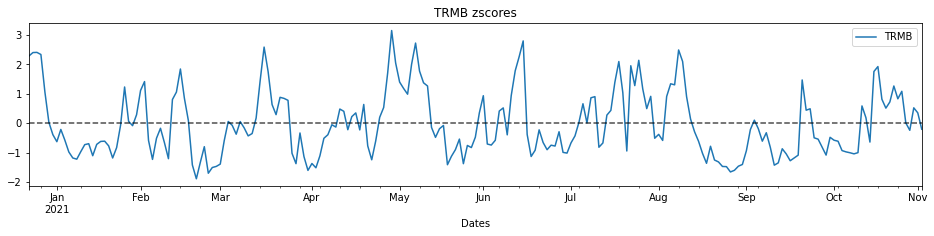

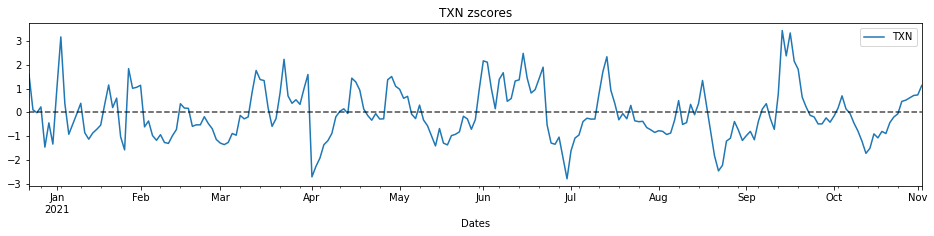

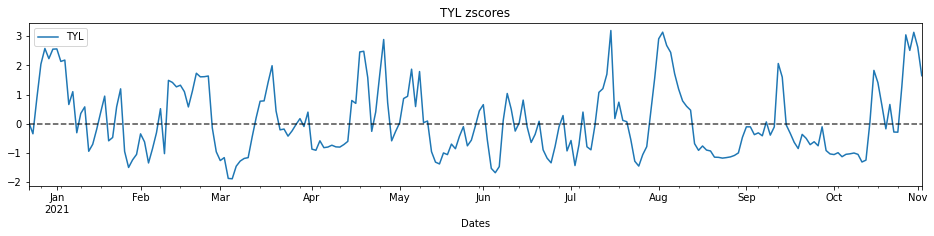

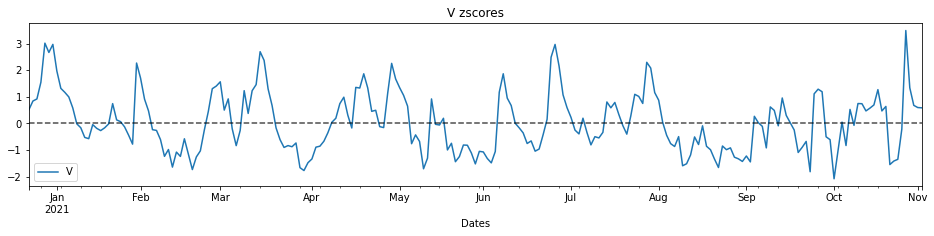

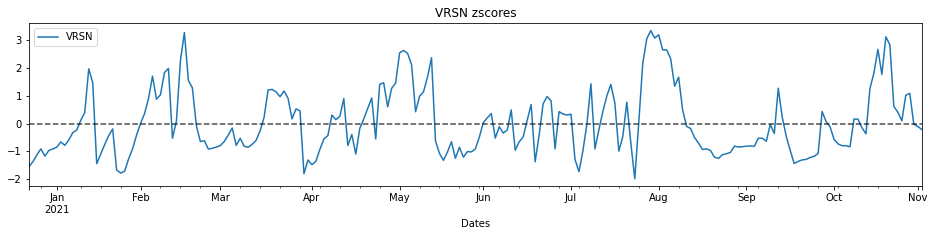

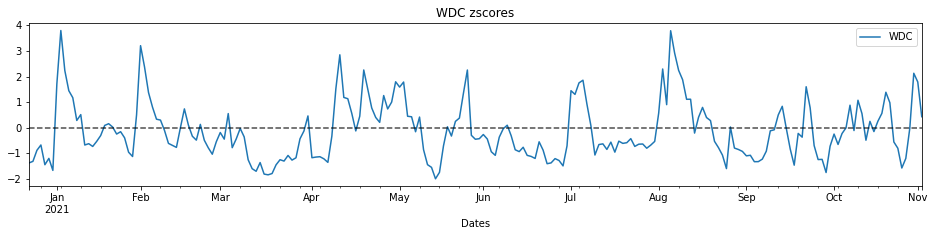

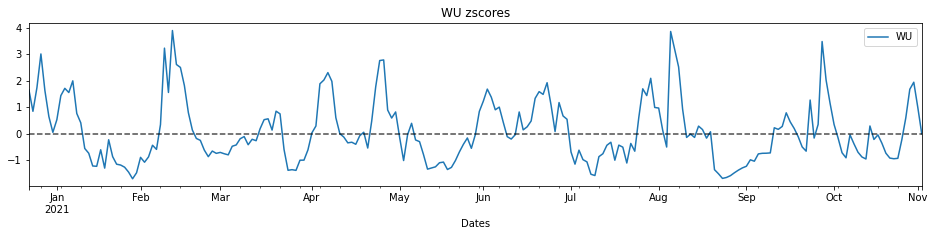

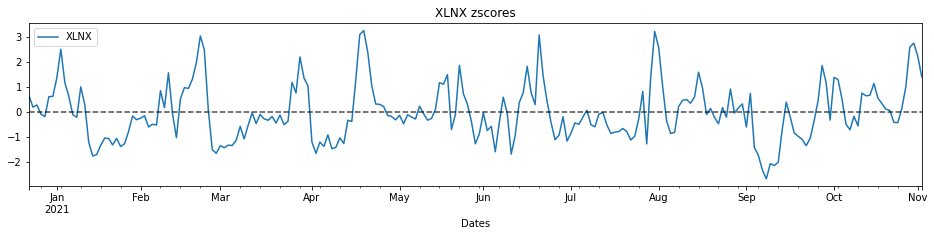

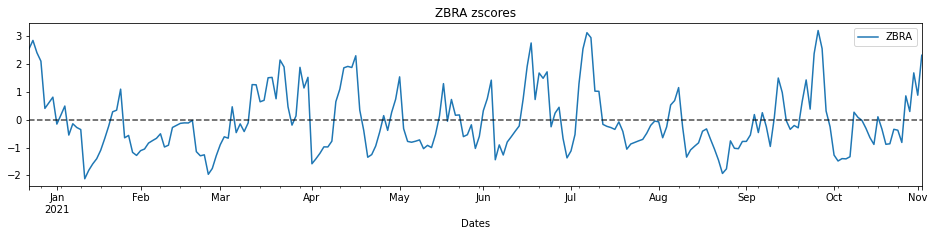

In [28]:
sig = BLOOMBERG_zscore_col.copy()
for i in sig.columns:
    column_sig = sig[[i]].replace(np.nan,0)
    fig, ax = plt.subplots(figsize=(16,3))
    column_sig.plot(ax=ax,)
    plt.axhline(y = 0, color = 'black', linestyle = '--',alpha=0.7)
    ax.set_title(i+' zscores')
    plt.show()

Check the last day:

In [29]:
BLOOMBERG_zscore_col.loc[['2021-11-02']]

AAPL       ACN      ADBE       ADI      ADP      ADSK  \
Dates                                                                   
2021-11-02  1.568313 -1.918799 -0.804143 -1.272553  1.47594 -0.297676   

                AKAM     AMAT       AMD      ANET  ...       TER      TRMB  \
Dates                                              ...                       
2021-11-02 -1.277702  1.53434  0.773966  2.955488  ...  1.255814 -0.200894   

                 TXN       TYL         V      VRSN     WDC        WU  \
Dates                                                                  
2021-11-02  1.130102  1.647419  0.587784 -0.212025  0.4319 -0.006535   

                XLNX     ZBRA  
Dates                          
2021-11-02  1.404074  2.31509  

[1 rows x 75 columns]

In [30]:
BLOOMBERG_zscore_col.loc[['2021-11-02']].dropna(axis=1).T

Dates  2021-11-02
AAPL     1.568313
ACN     -1.918799
ADBE    -0.804143
ADI     -1.272553
ADP      1.475940
...           ...
VRSN    -0.212025
WDC      0.431900
WU      -0.006535
XLNX     1.404074
ZBRA     2.315090

[75 rows x 1 columns]

Lets look at the sparse twitter data:

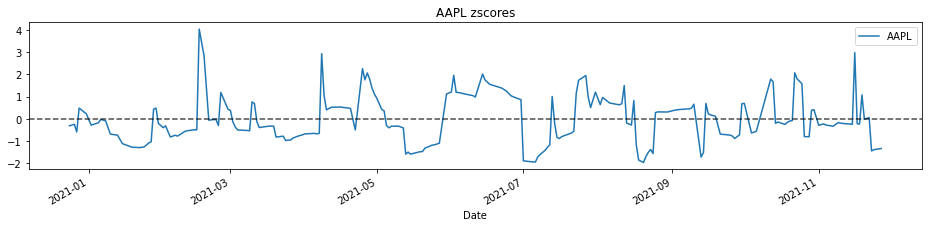

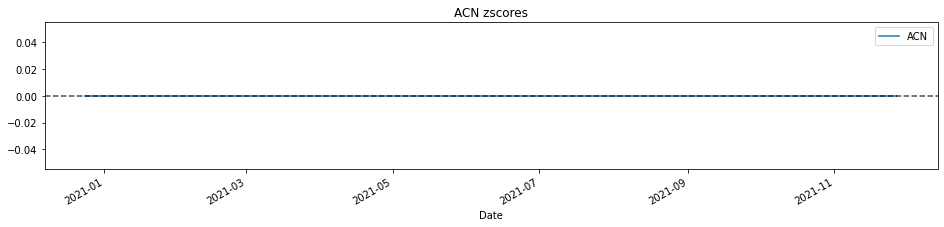

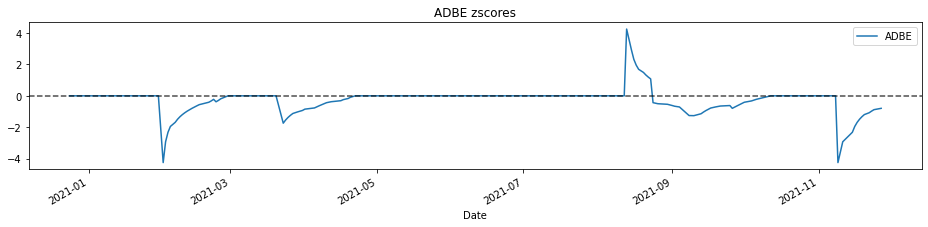

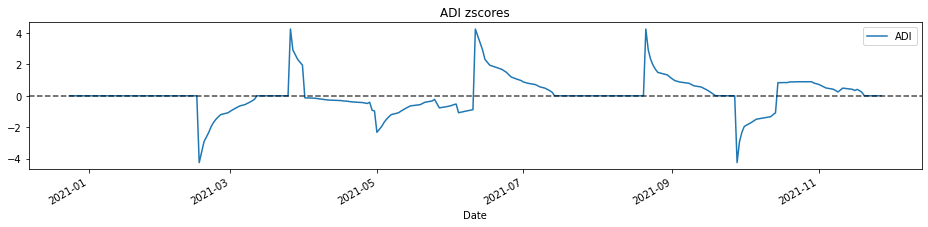

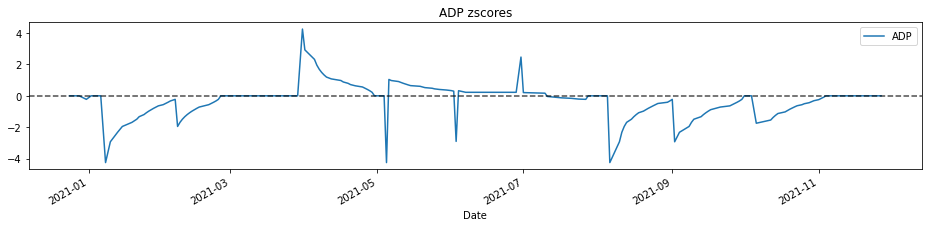

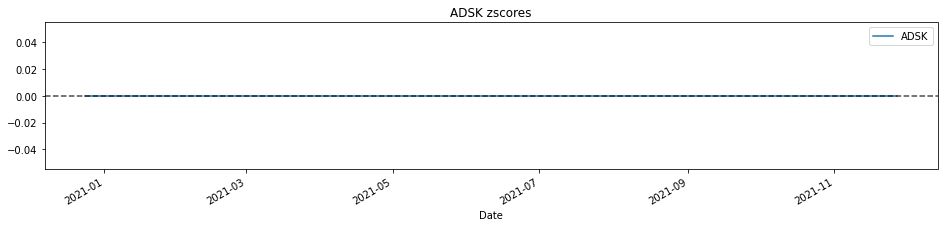

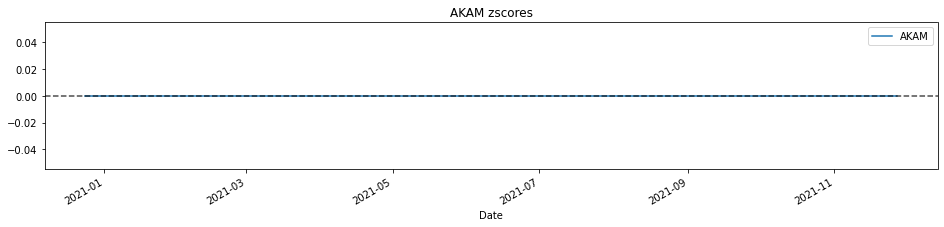

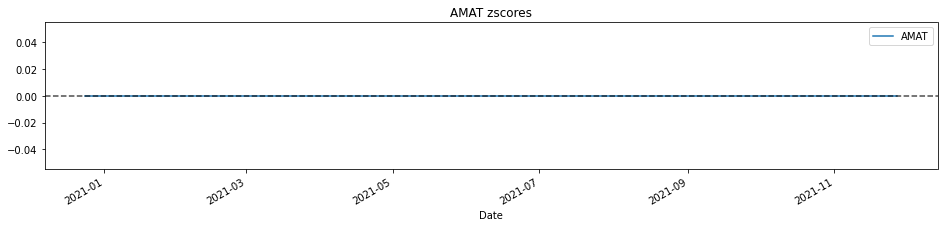

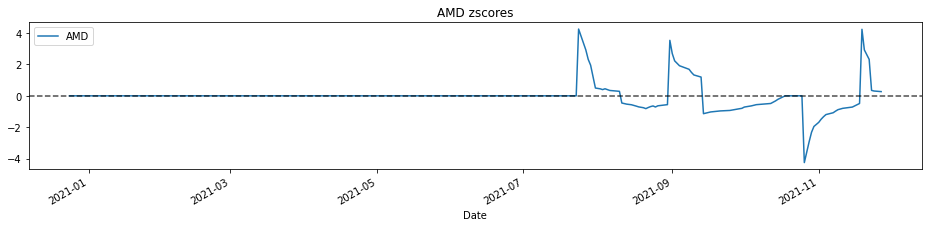

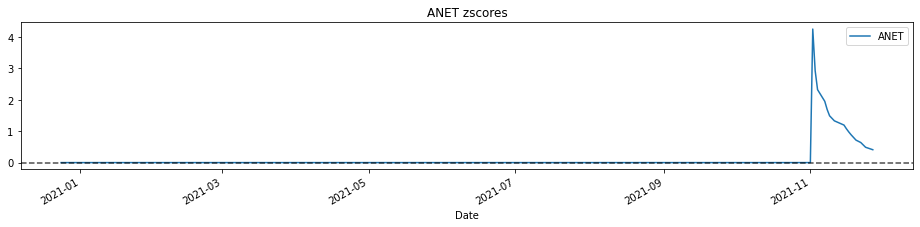

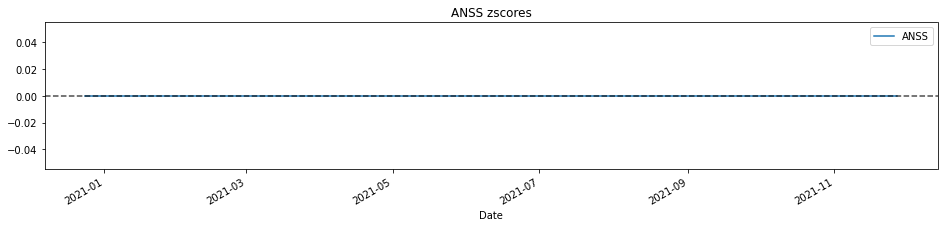

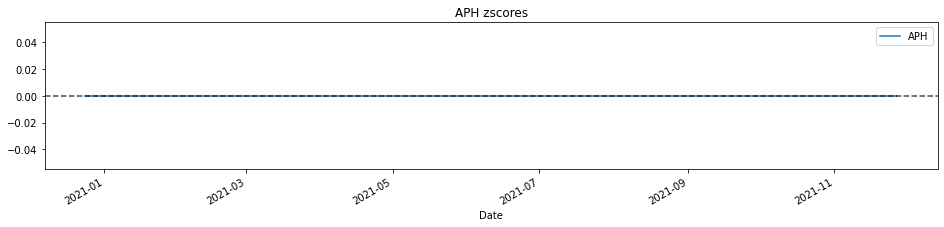

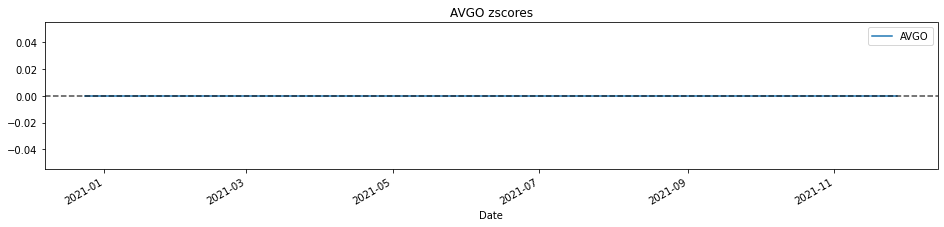

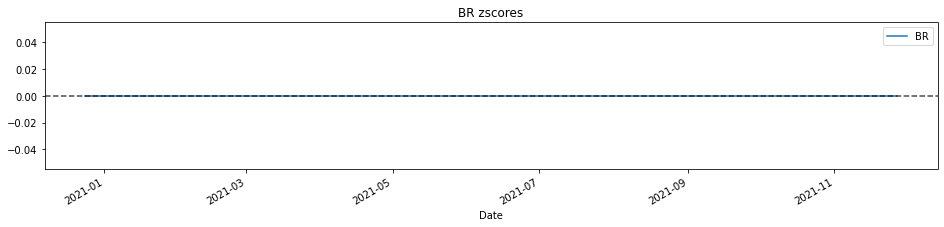

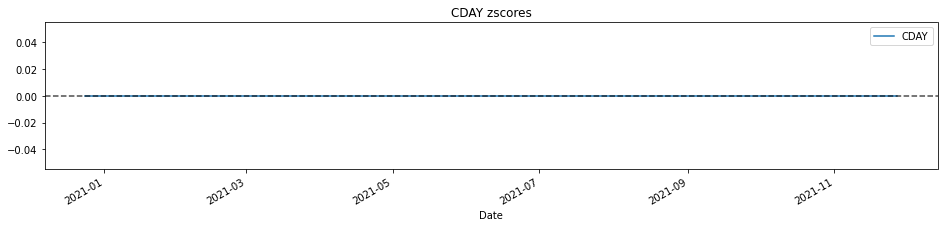

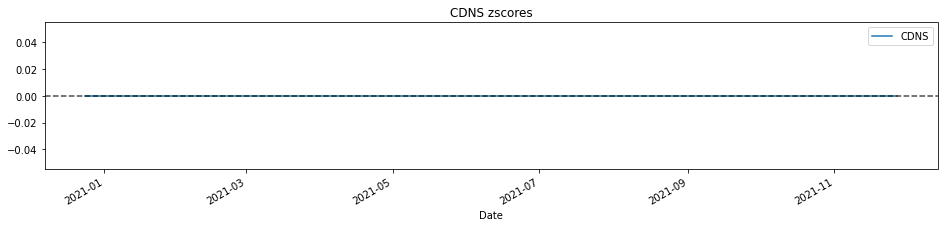

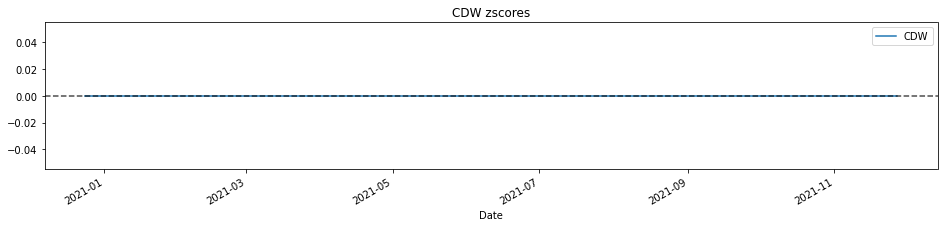

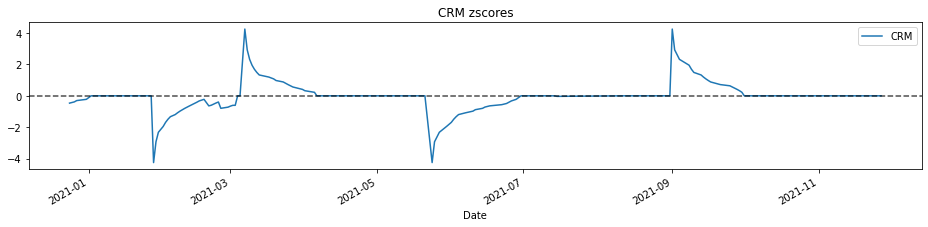

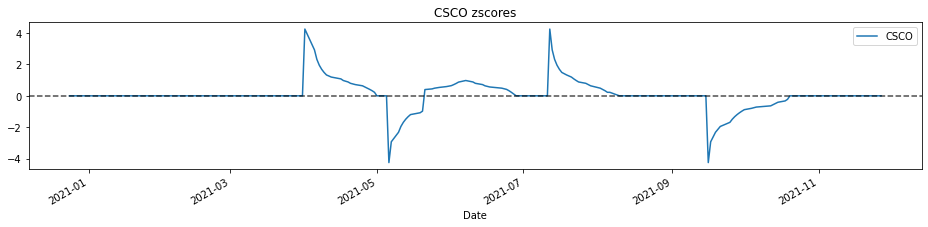

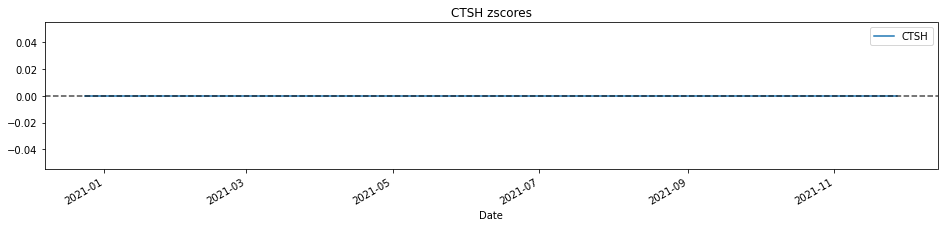

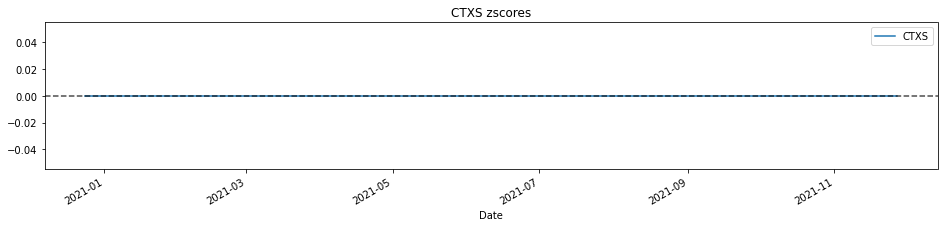

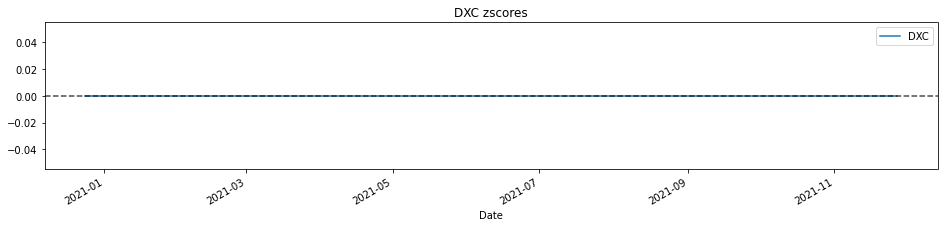

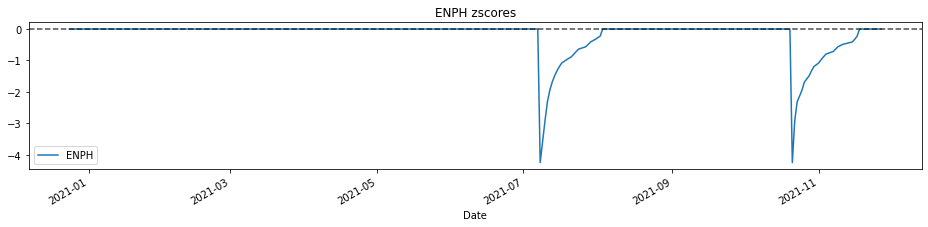

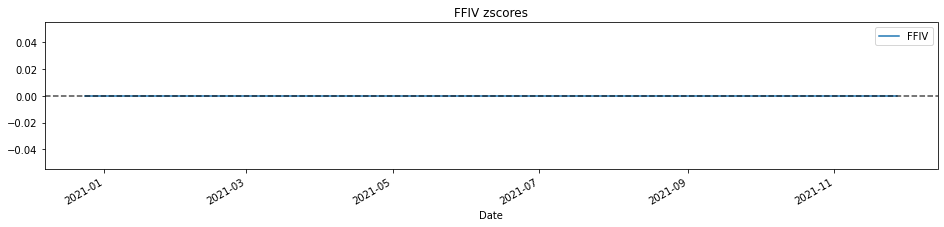

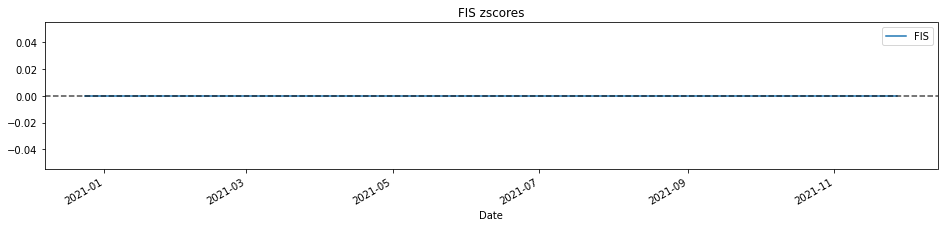

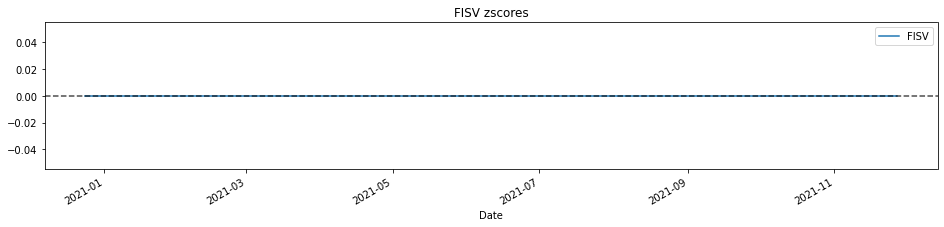

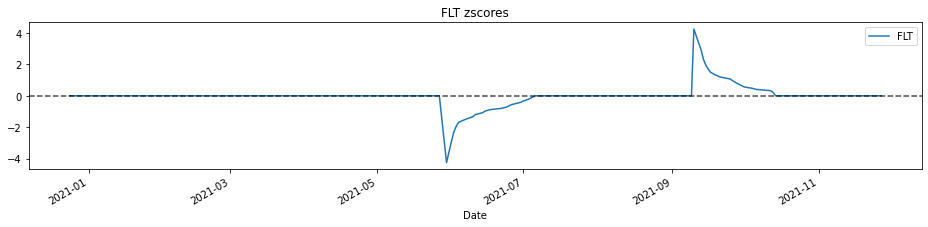

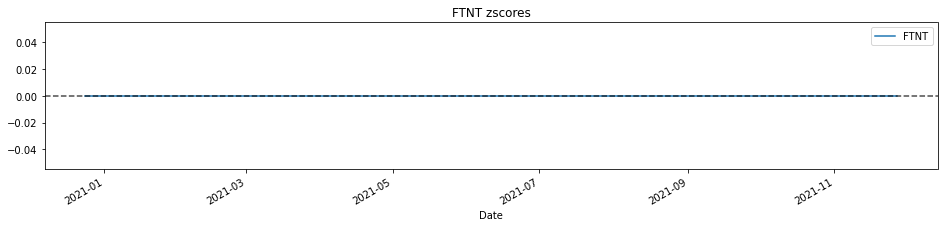

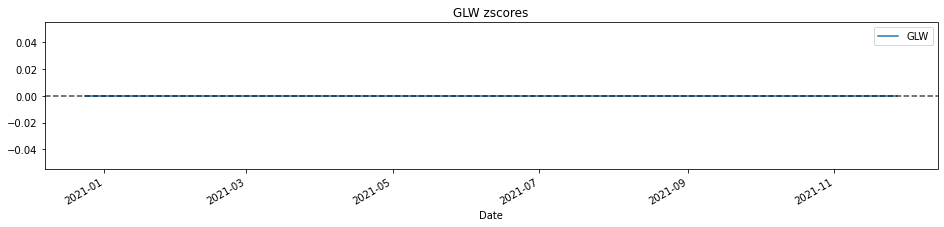

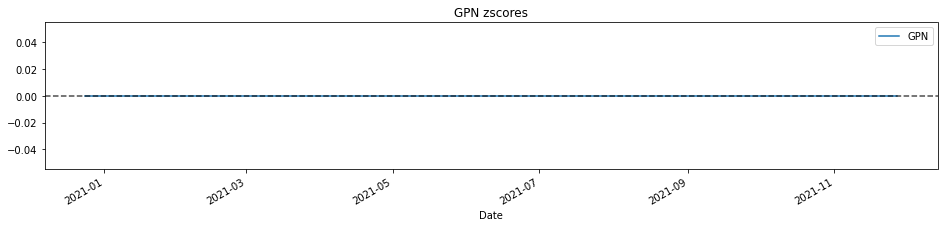

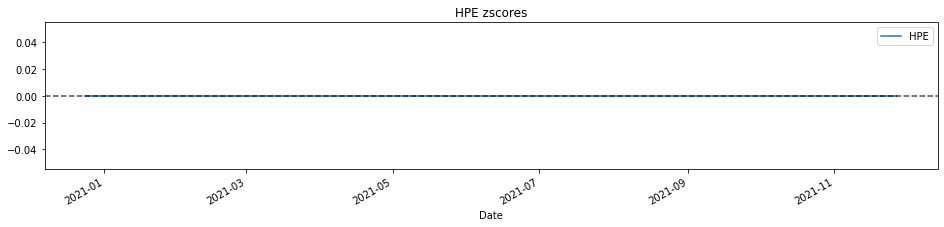

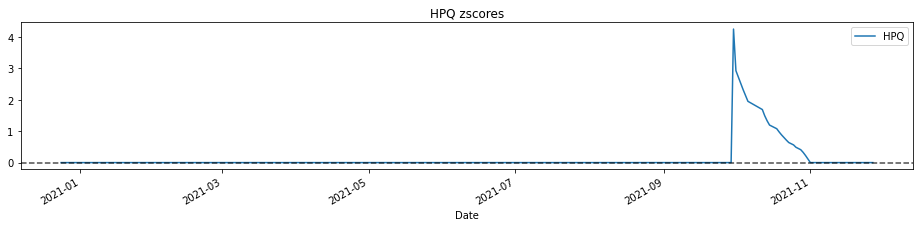

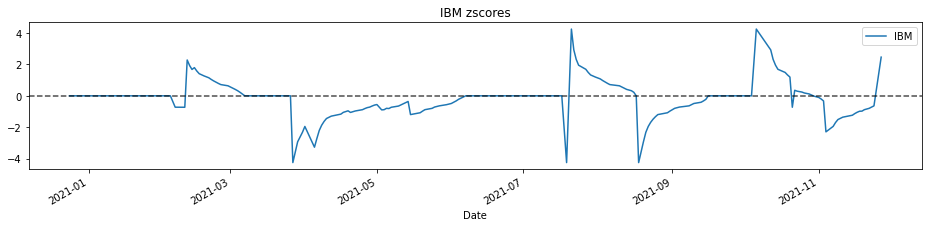

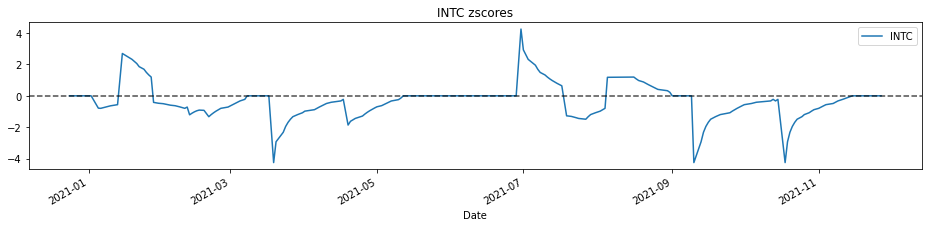

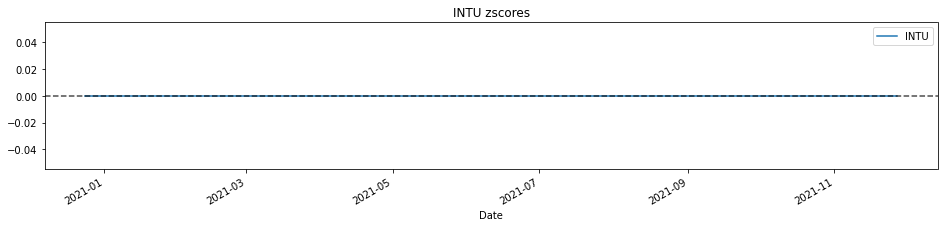

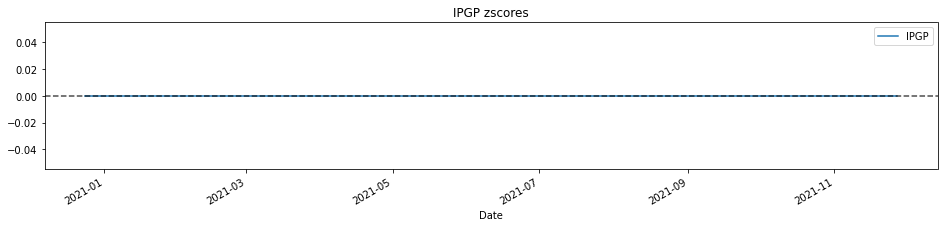

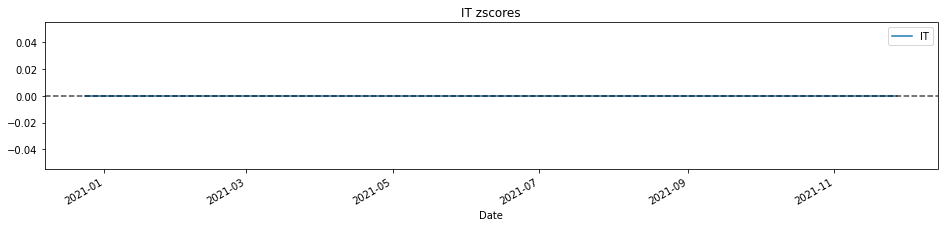

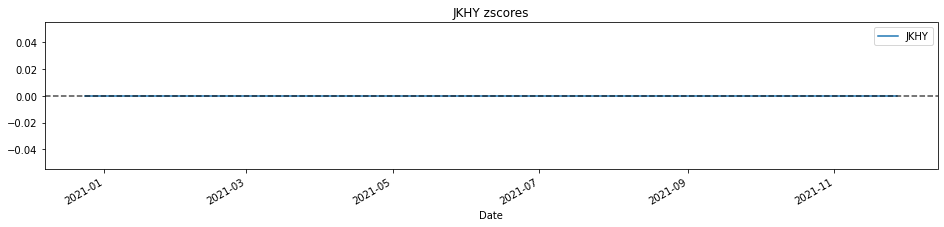

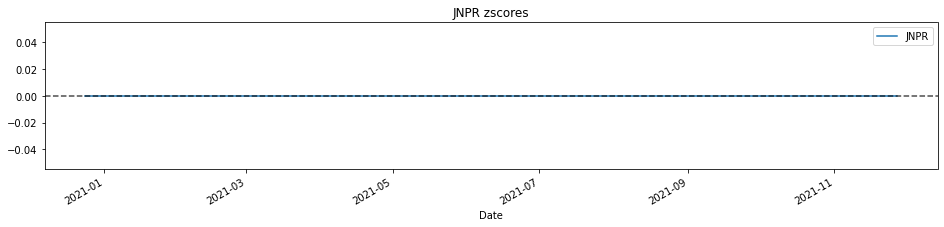

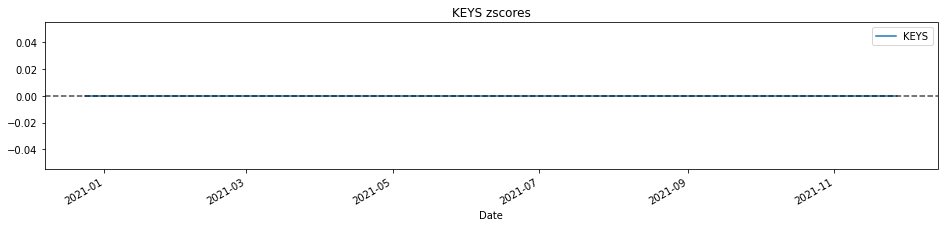

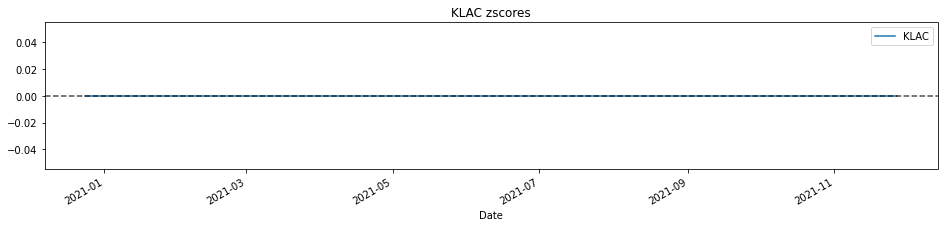

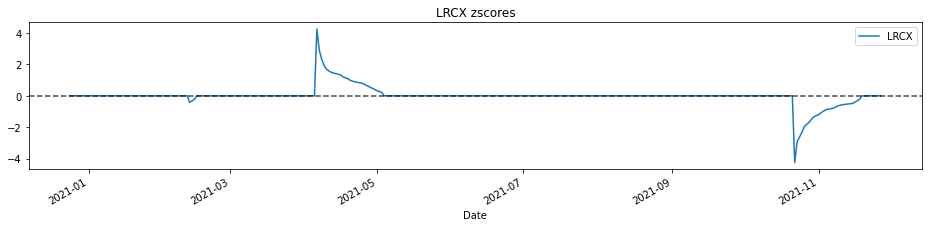

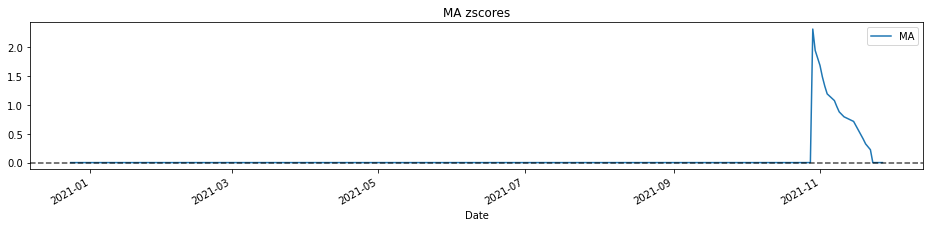

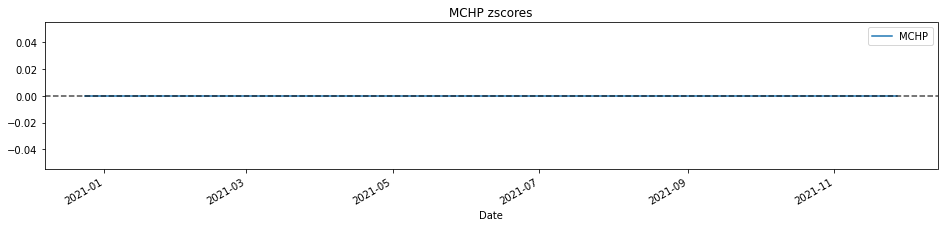

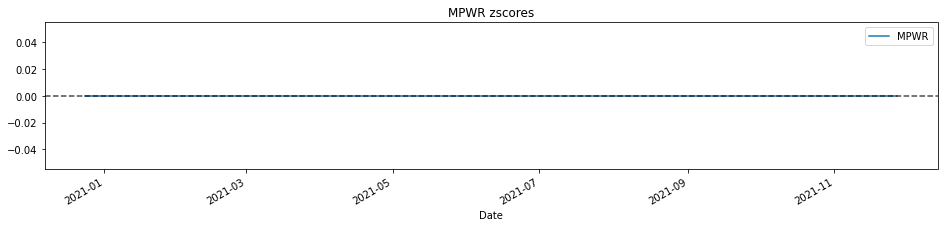

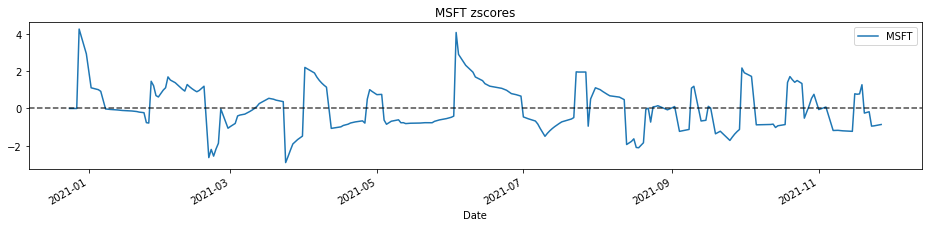

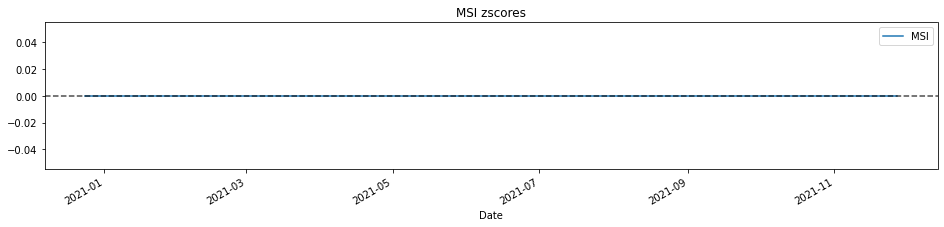

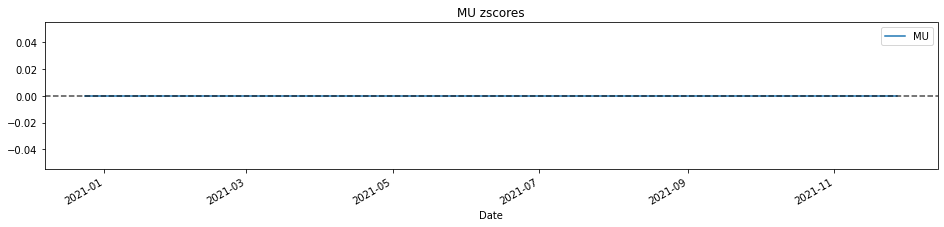

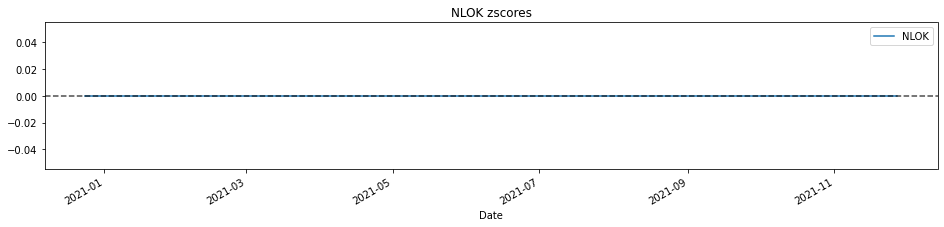

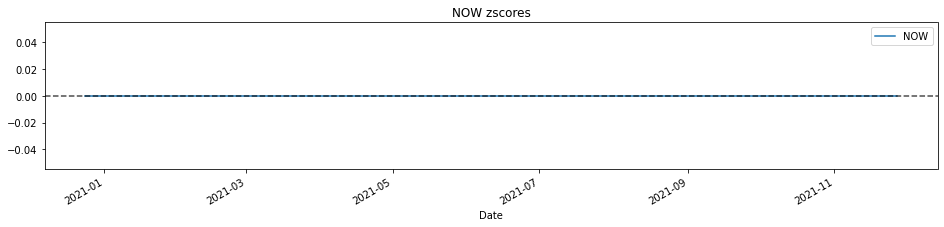

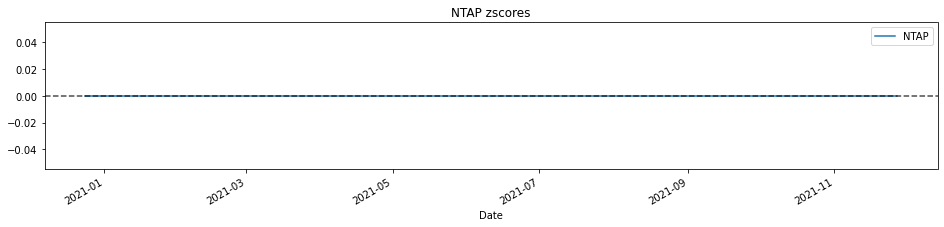

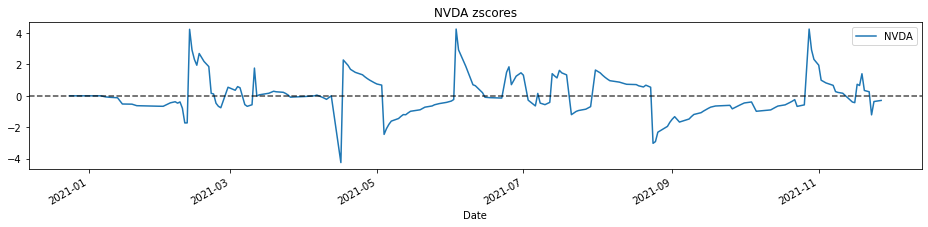

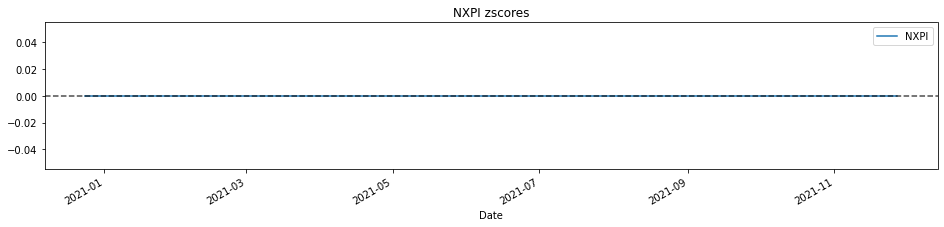

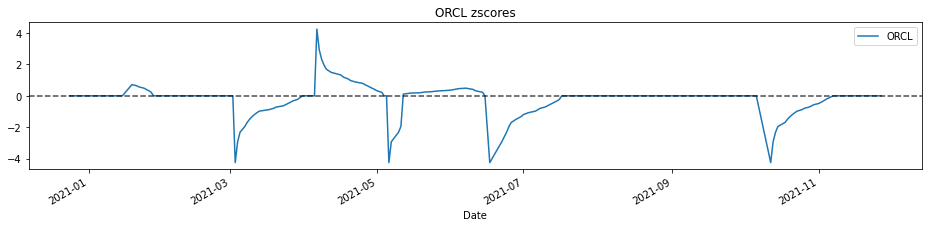

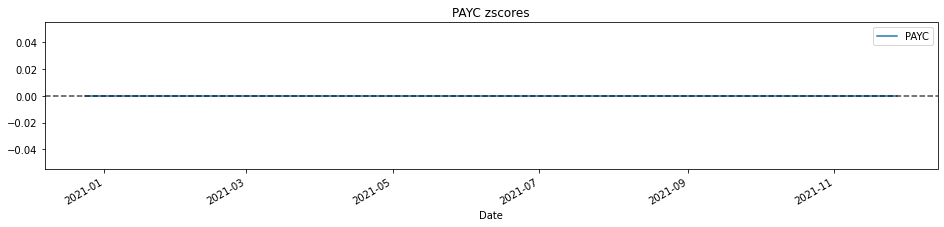

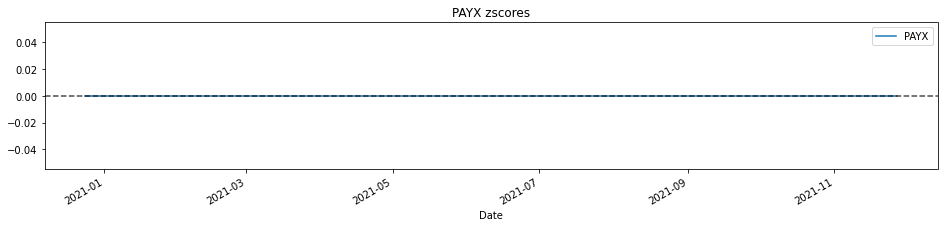

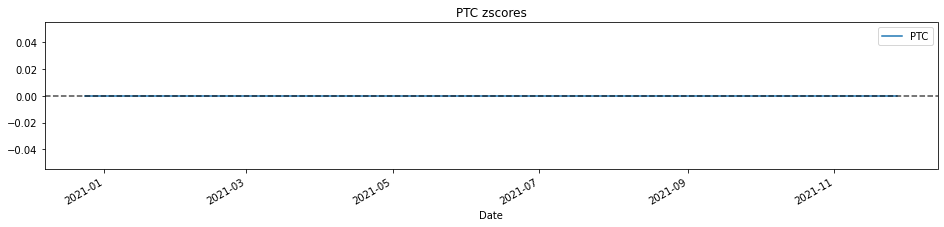

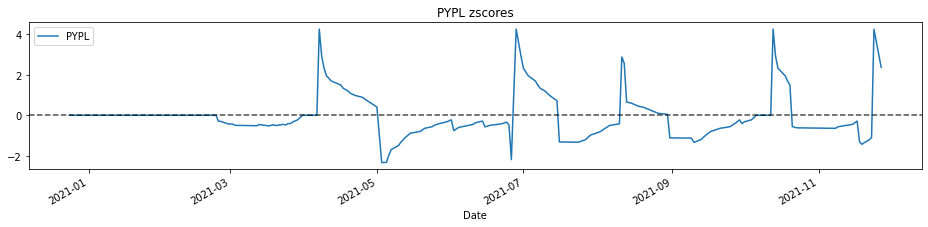

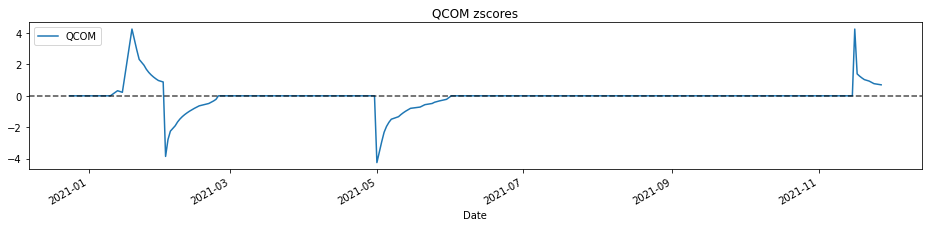

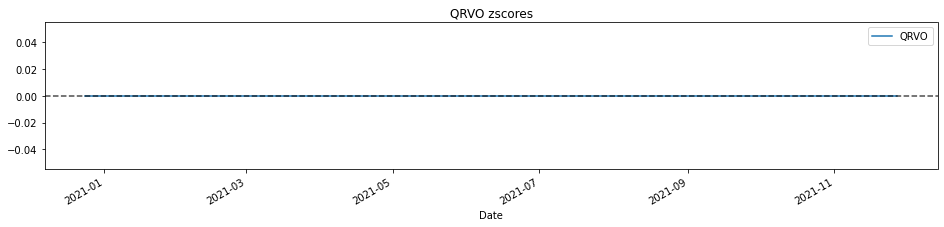

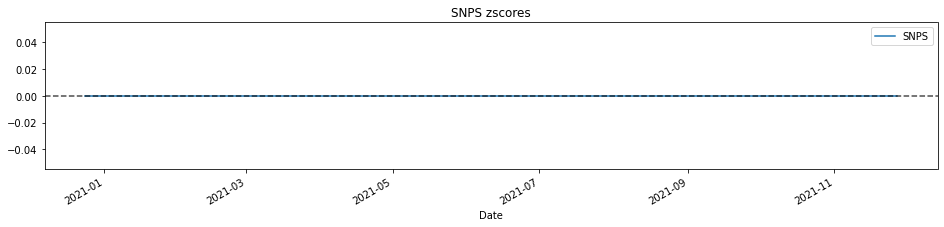

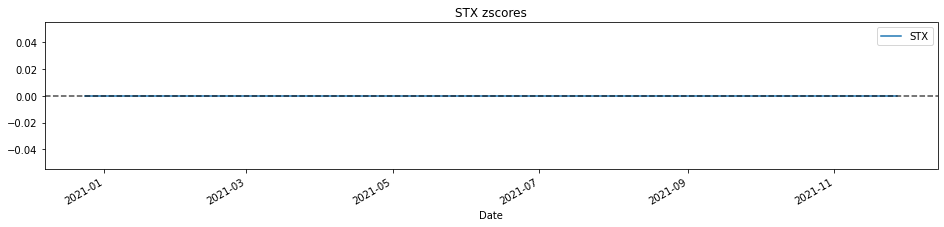

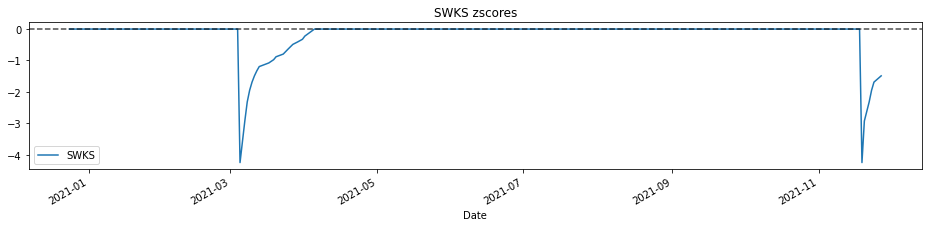

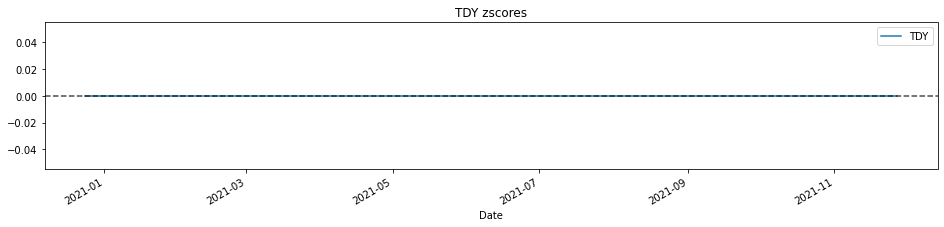

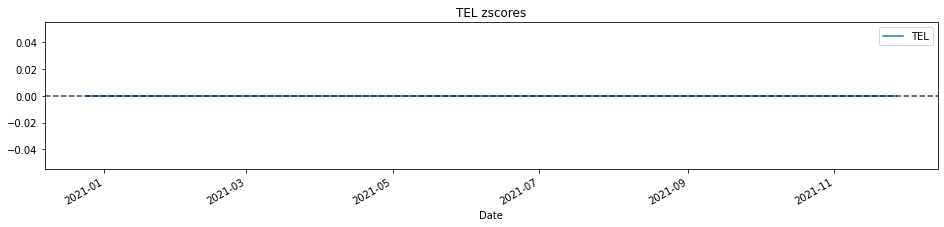

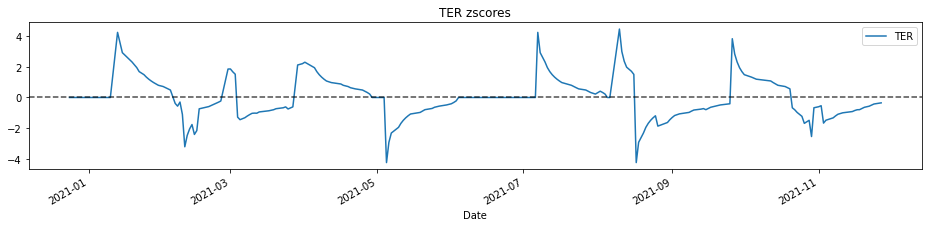

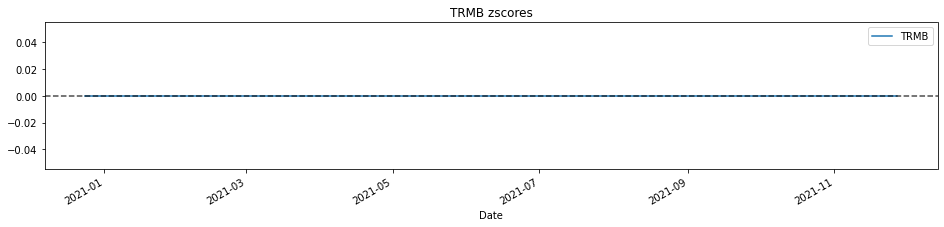

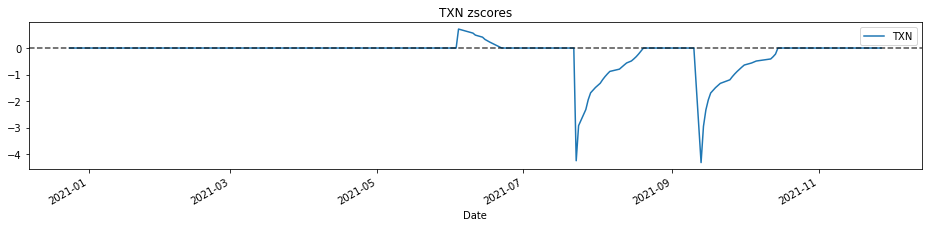

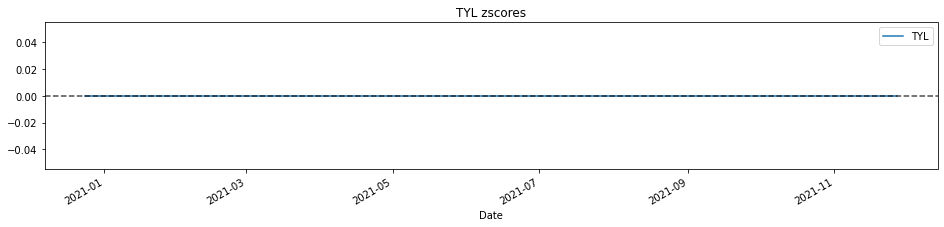

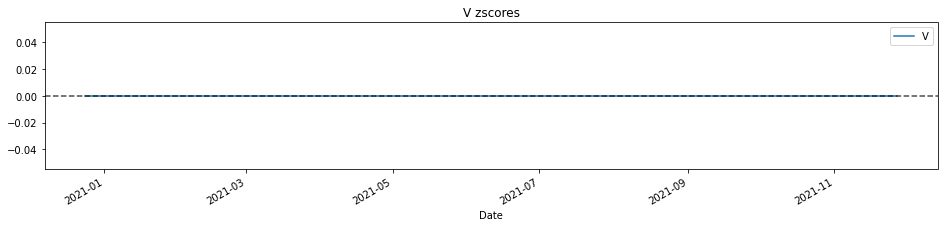

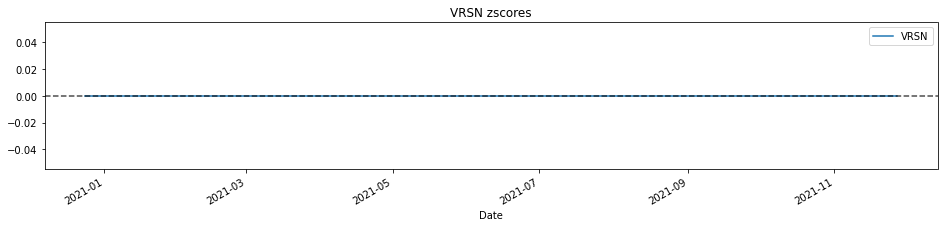

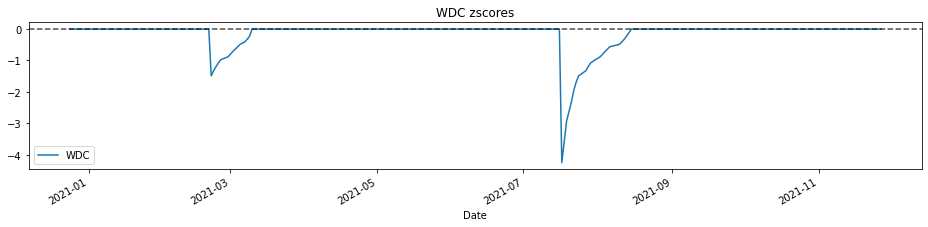

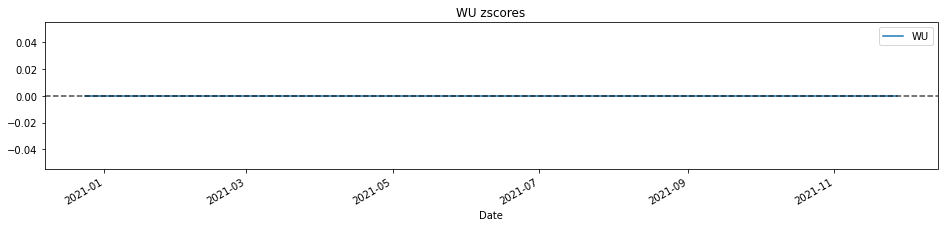

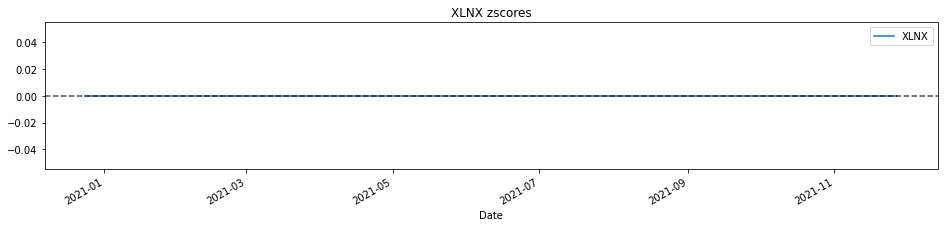

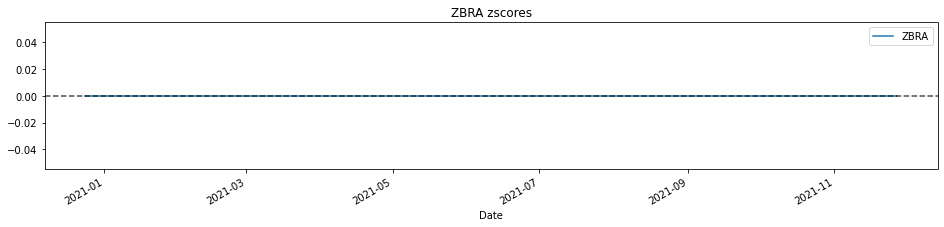

In [31]:
TWITTER_zscore_col = zscore_columns(TWITTER,look_back_window = look_back_window,skipna=True)
sig = TWITTER_zscore_col.copy()
for i in sig.columns:
    column_sig = sig[[i]].replace(np.nan,0)
    fig, ax = plt.subplots(figsize=(16,3))
    column_sig.plot(ax=ax,)
    plt.axhline(y = 0, color = 'black', linestyle = '--',alpha=0.7)
    
   # plt.axhline(y = .5)
    ax.set_title(i+' zscores')
    plt.show()

Check the last day:

In [32]:
TWITTER_zscore_col.loc[['2021-11-02']]

AAPL  ACN          ADBE       ADI      ADP  ADSK  AKAM  AMAT  \
Date                                                                          
2021-11-02 -0.26536  NaN -1.849070e-10  0.650839 -0.17111   NaN   NaN   NaN   

                 AMD      ANET  ...       TER  TRMB  TXN  TYL   V  VRSN  WDC  \
Date                            ...                                            
2021-11-02 -1.488847  4.248529  ... -0.537211   NaN  NaN  NaN NaN   NaN  NaN   

            WU  XLNX  ZBRA  
Date                        
2021-11-02 NaN   NaN   NaN  

[1 rows x 75 columns]

In [33]:
TWITTER_zscore_col.loc[['2021-11-02']].dropna(axis=1).T

Date    2021-11-02
AAPL -2.653601e-01
ADBE -1.849070e-10
ADI   6.508390e-01
ADP  -1.711099e-01
AMD  -1.488847e+00
ANET  4.248529e+00
CSCO  5.173483e-16
ENPH -9.746794e-01
IBM  -2.011126e-01
INTC -7.152199e-01
LRCX -1.077549e+00
MA    1.488847e+00
MSFT -1.401362e-02
NVDA  9.954677e-01
ORCL -4.094473e-01
PYPL -6.346195e-01
QCOM -8.800870e-22
SWKS  0.000000e+00
TER  -5.372113e-01

Reddit:

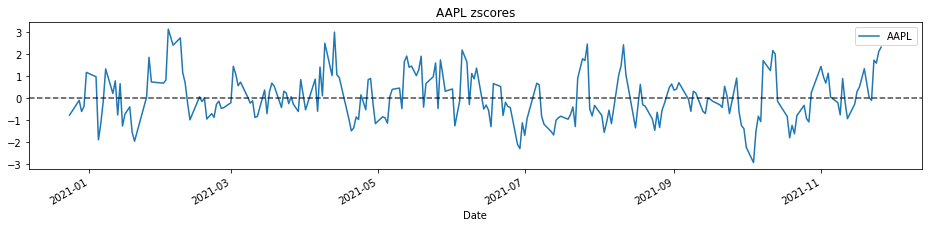

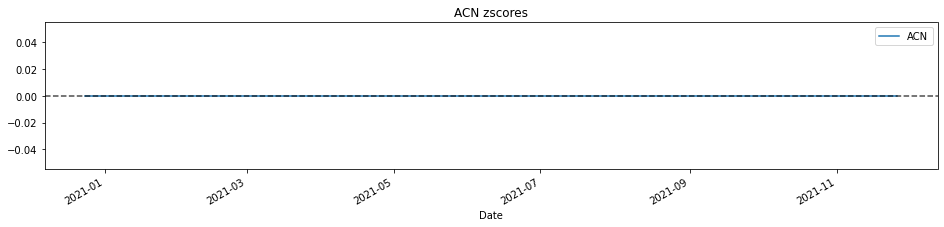

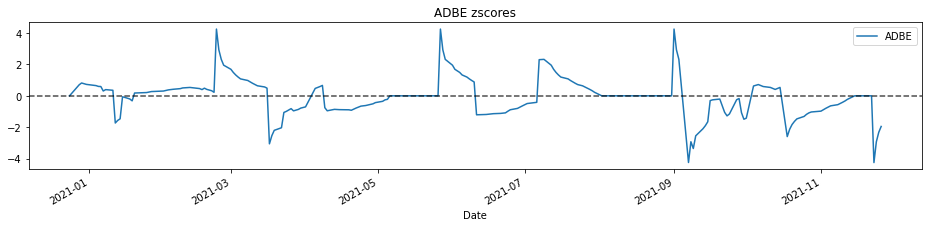

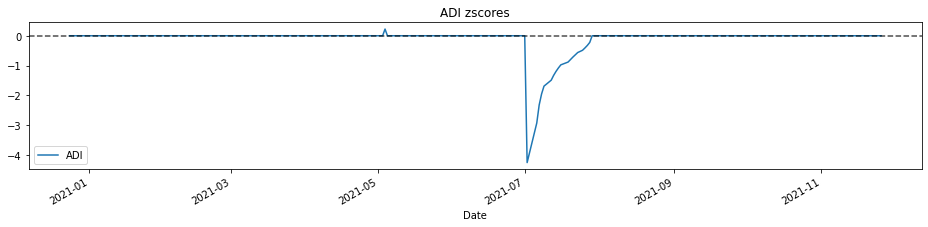

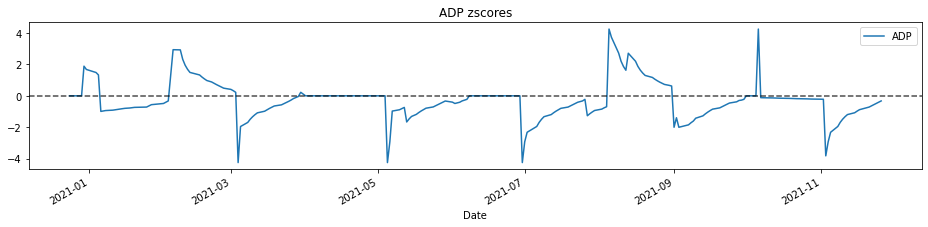

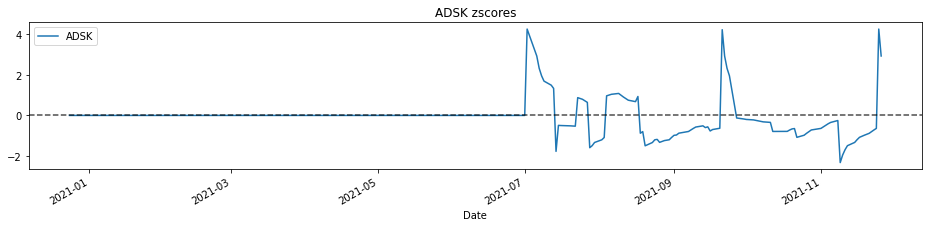

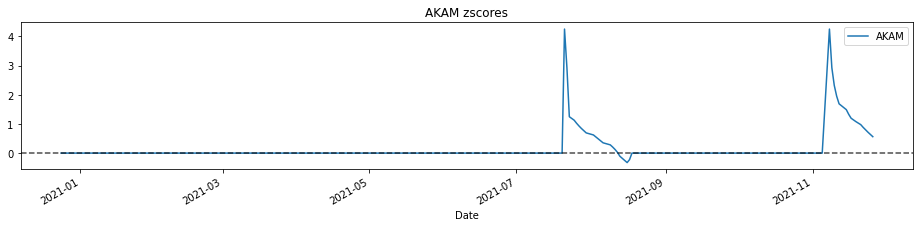

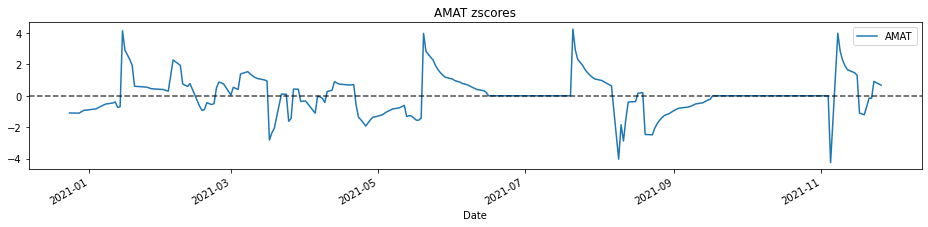

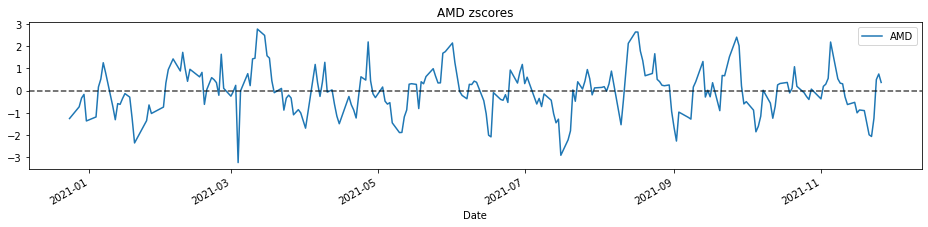

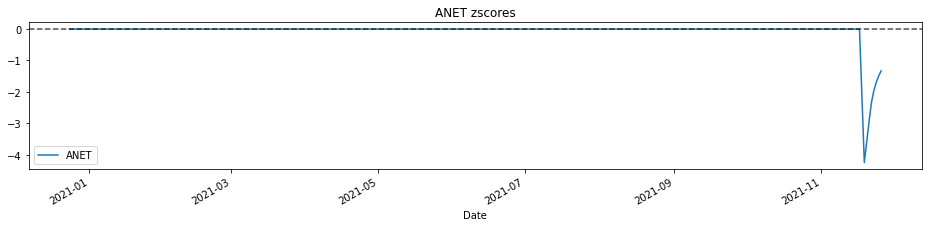

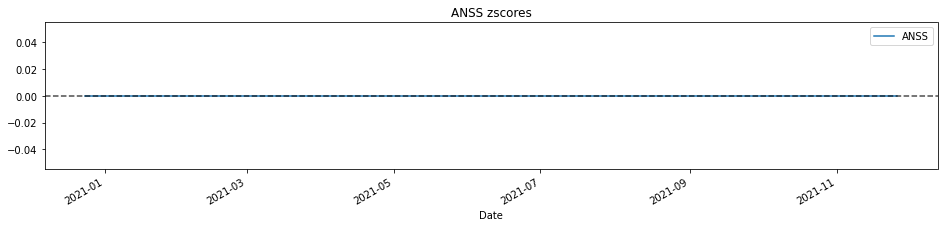

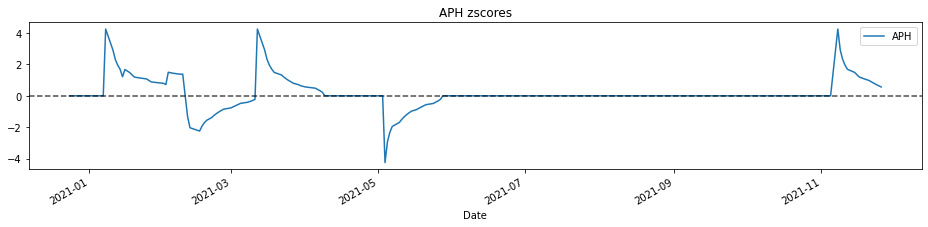

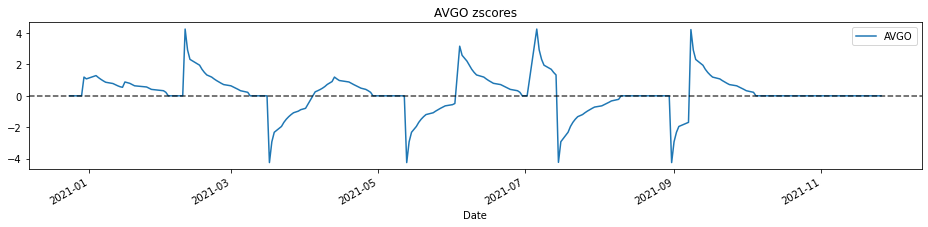

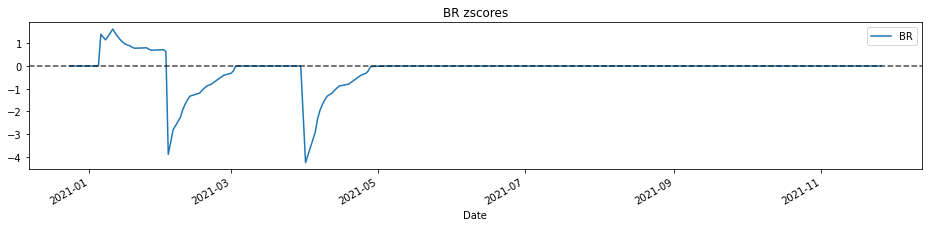

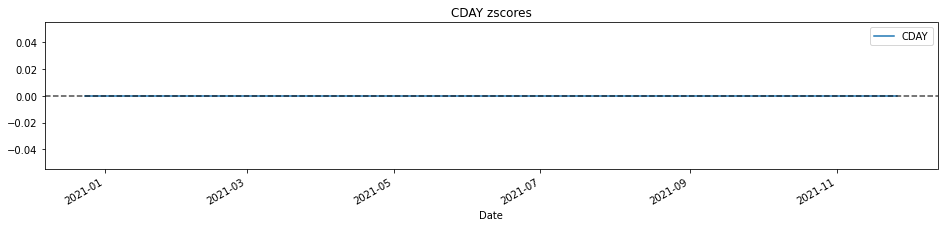

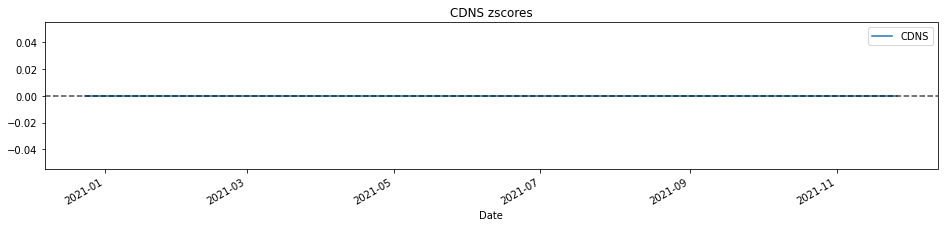

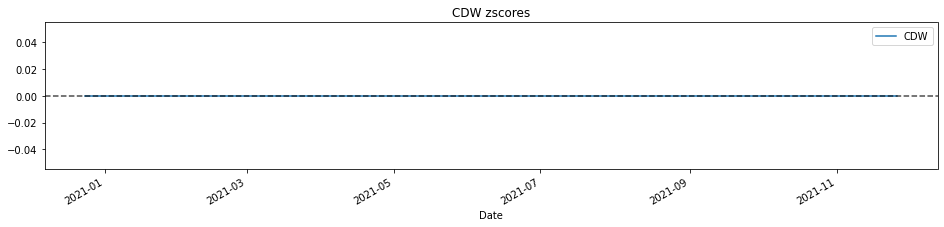

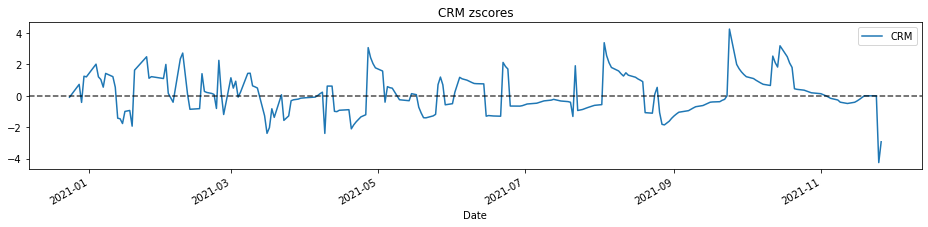

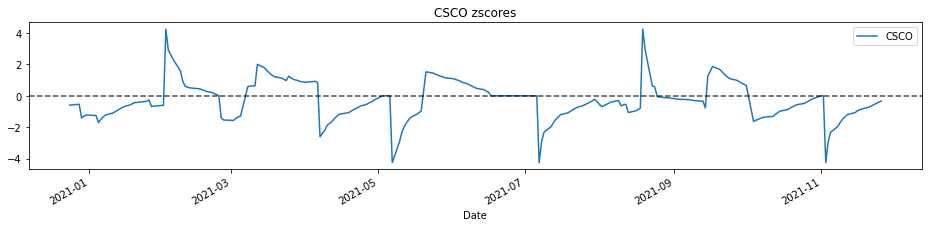

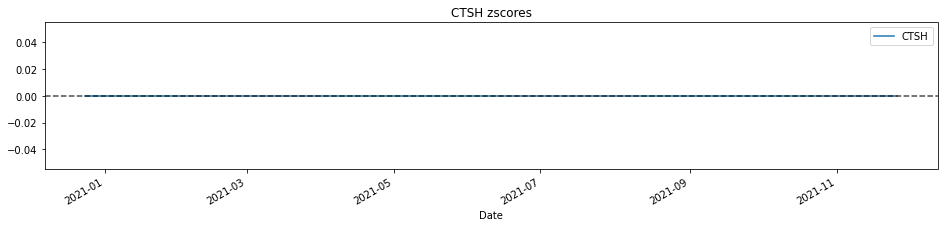

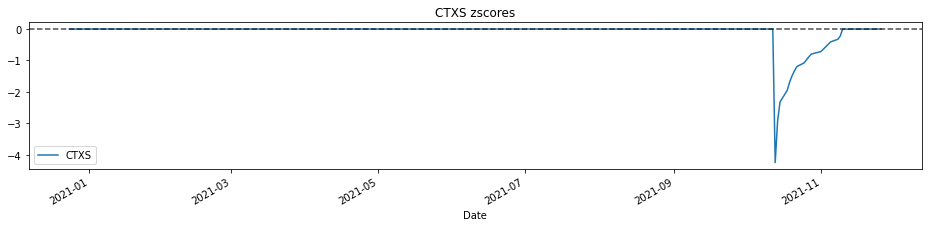

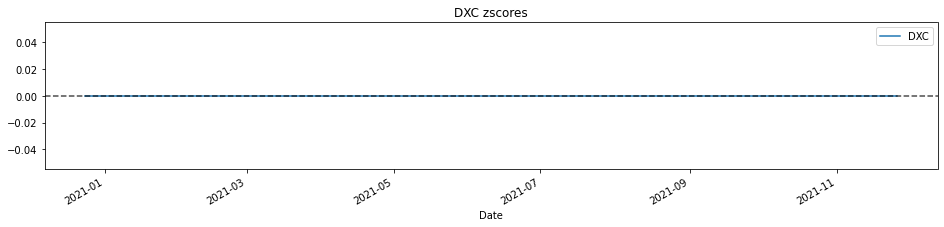

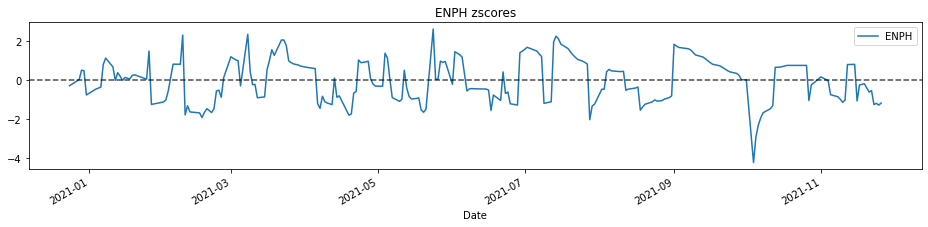

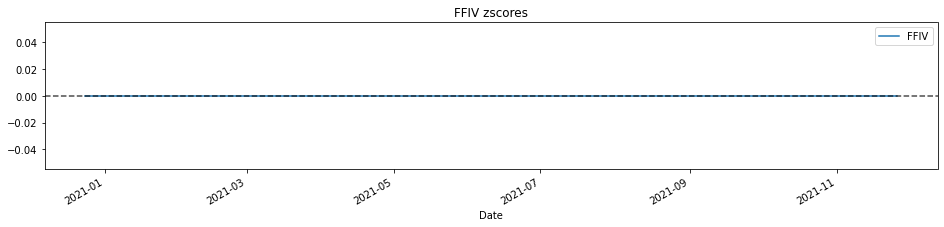

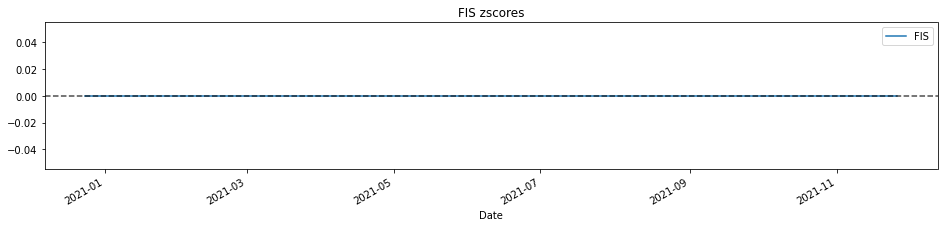

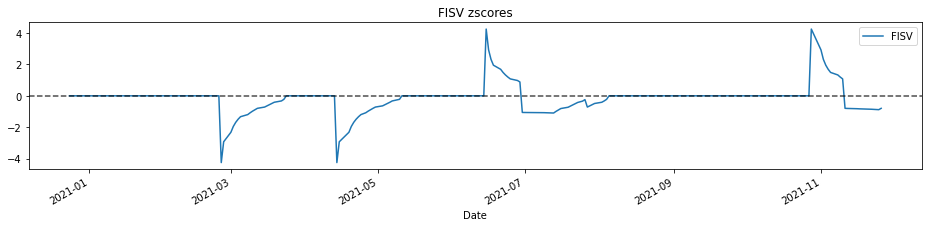

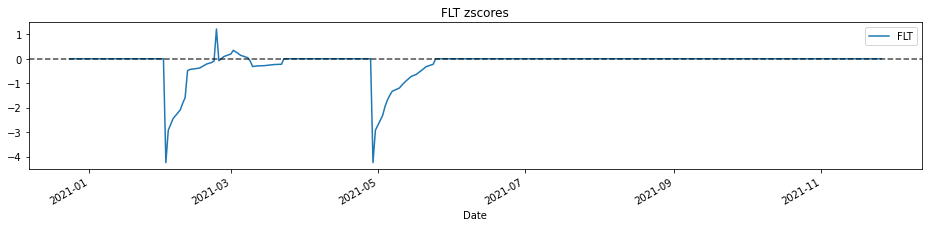

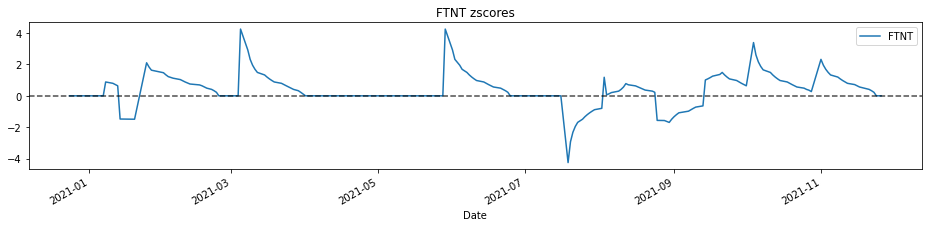

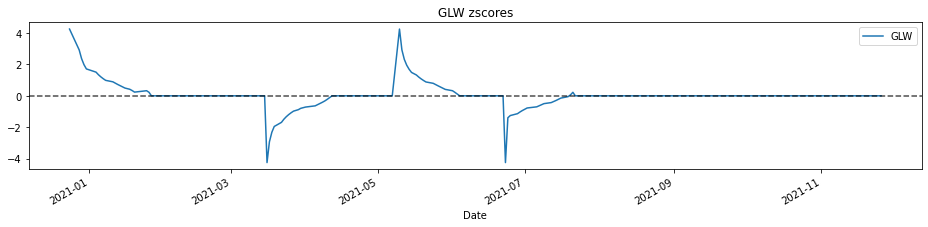

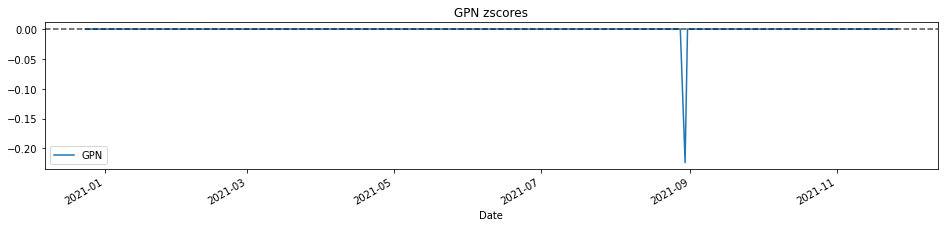

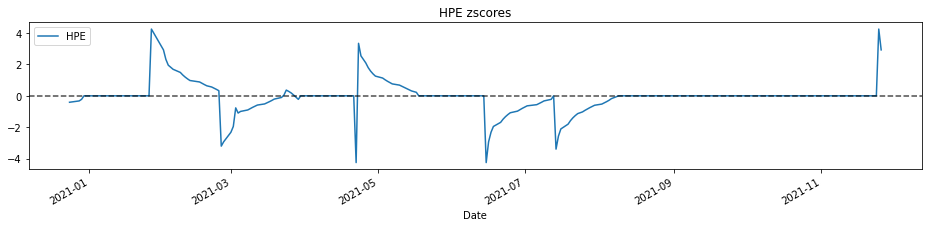

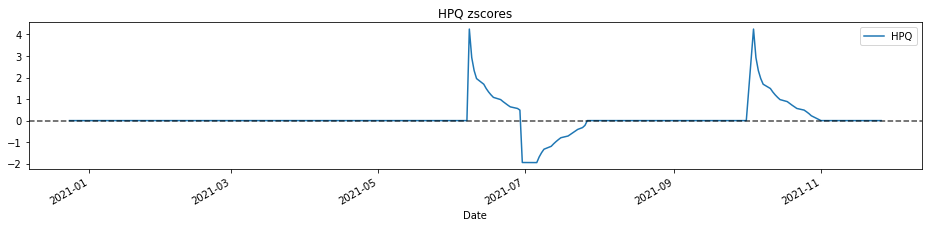

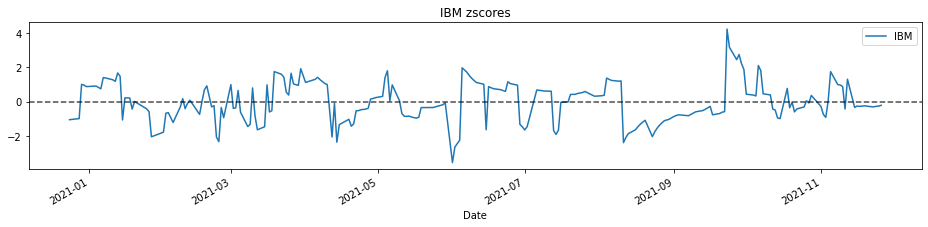

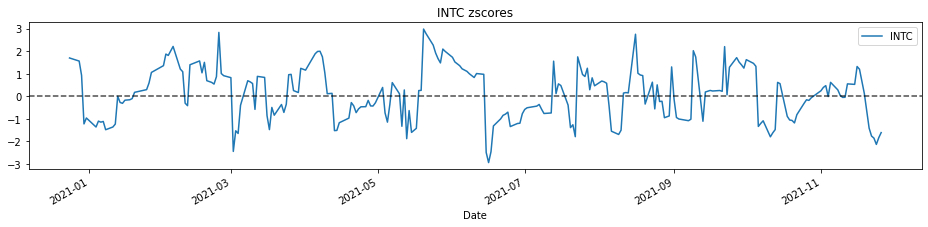

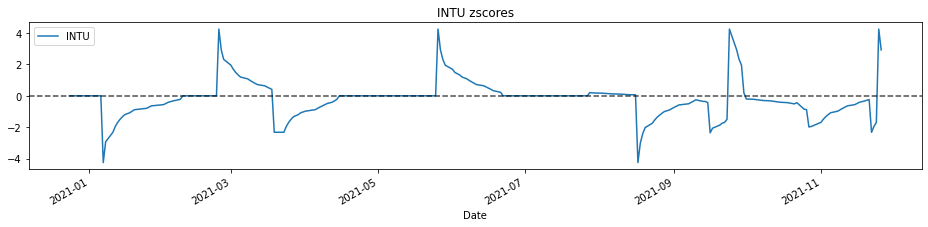

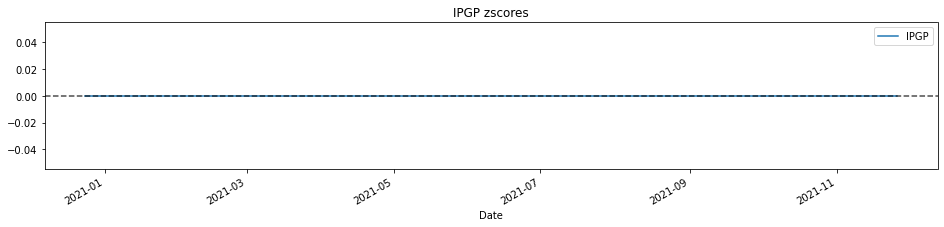

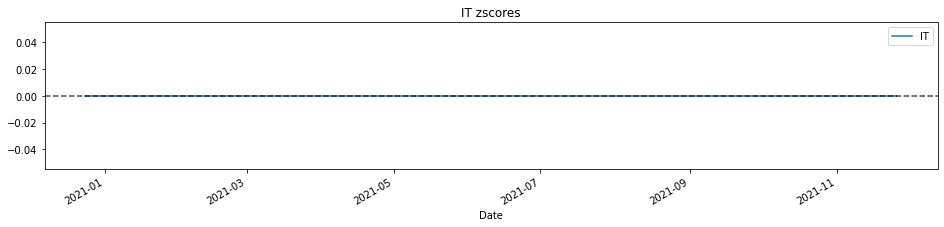

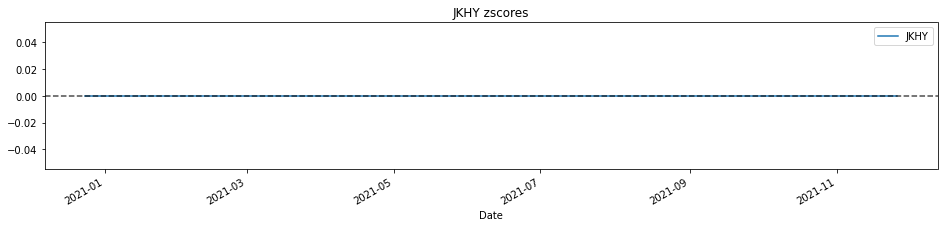

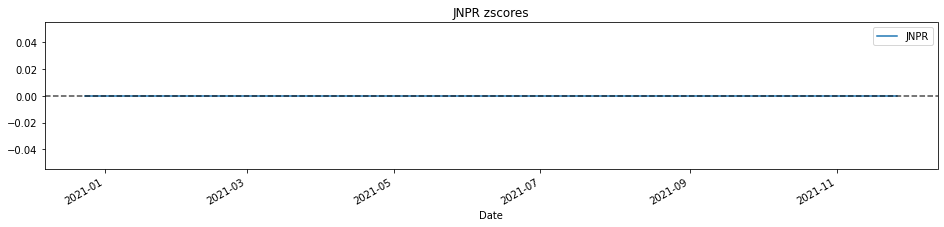

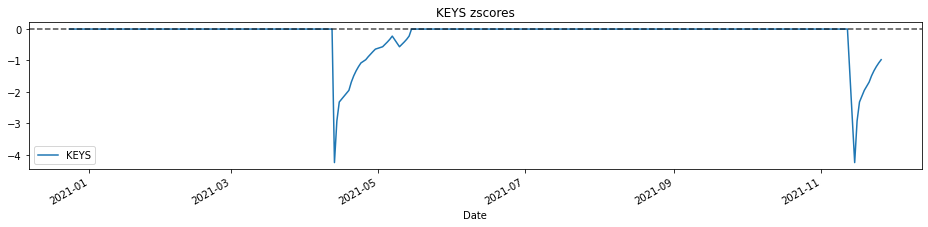

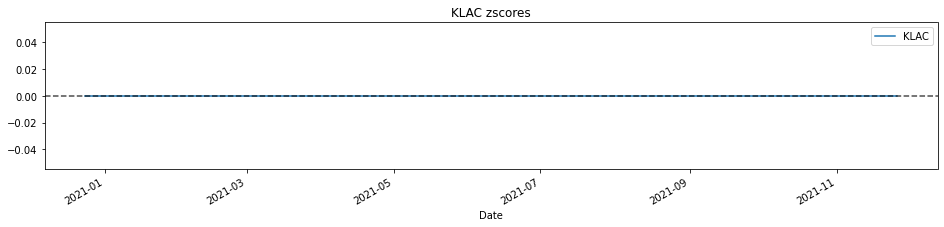

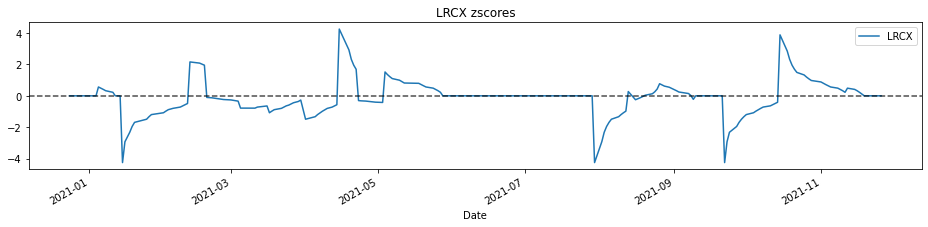

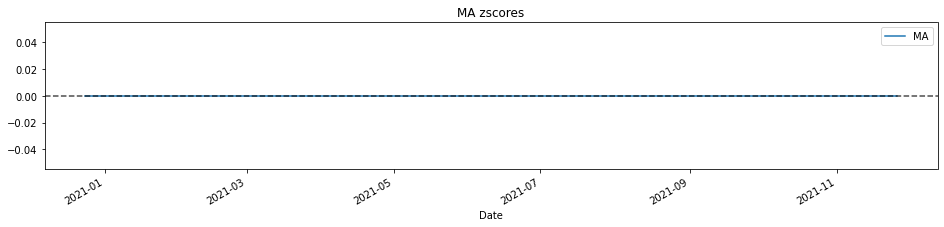

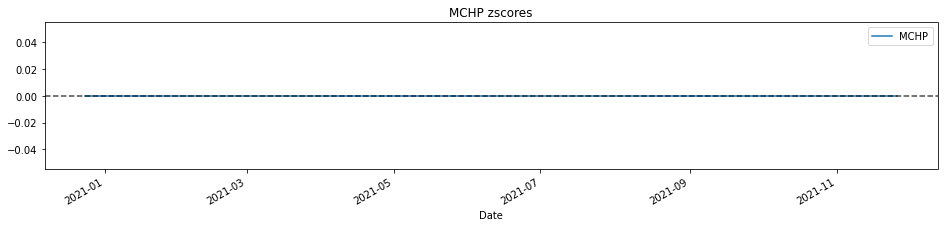

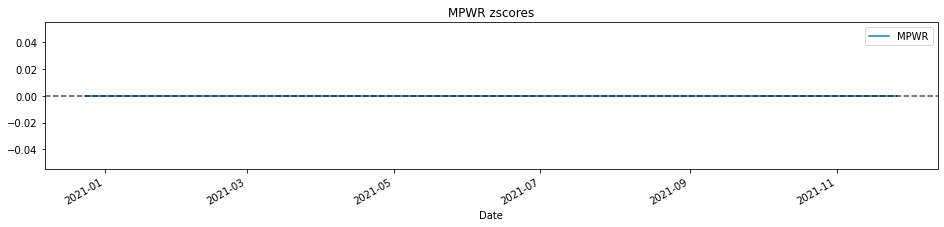

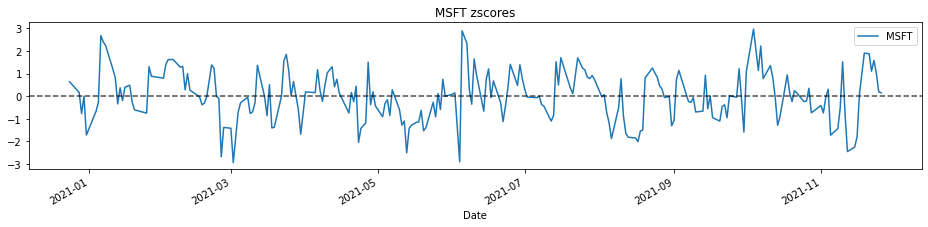

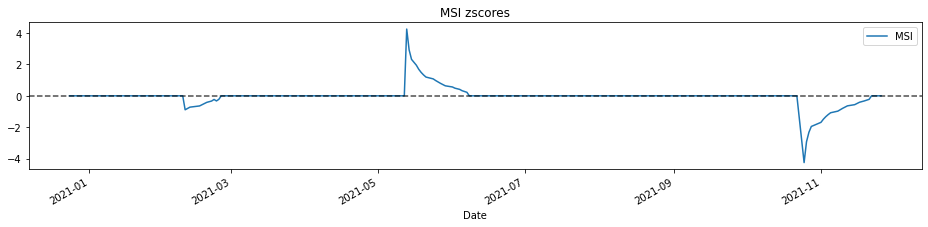

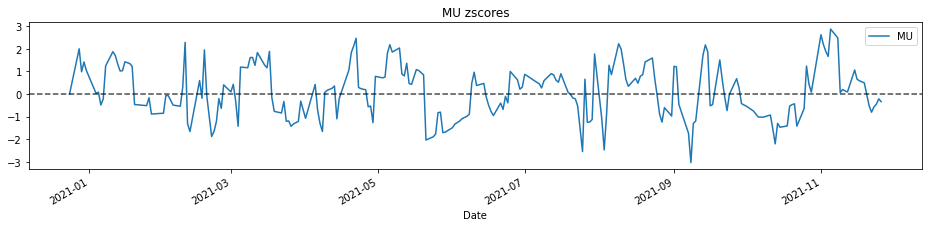

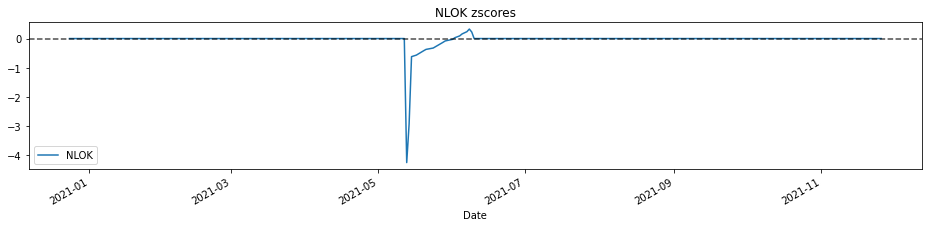

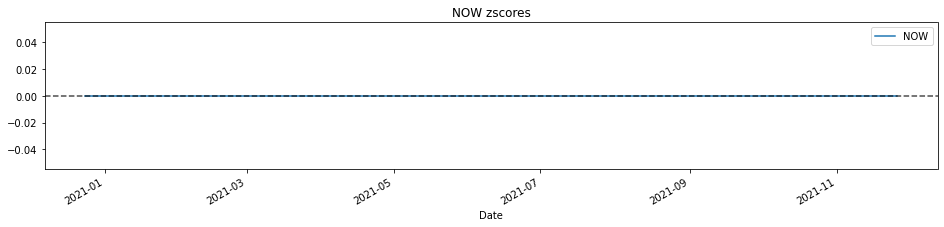

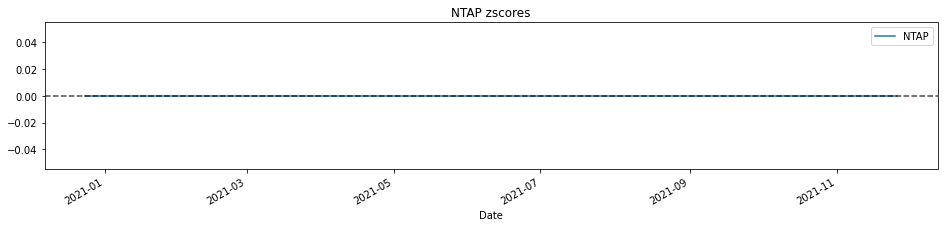

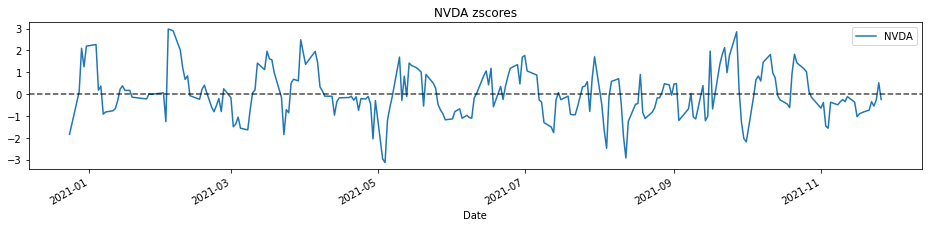

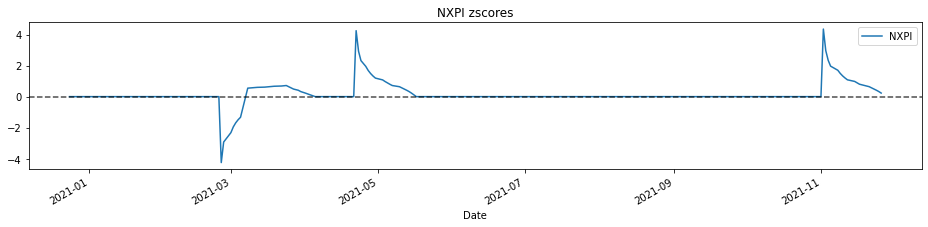

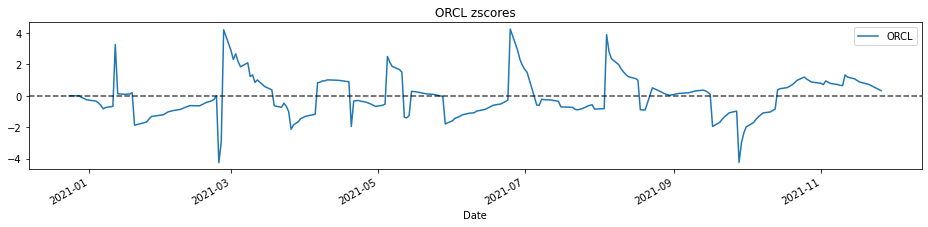

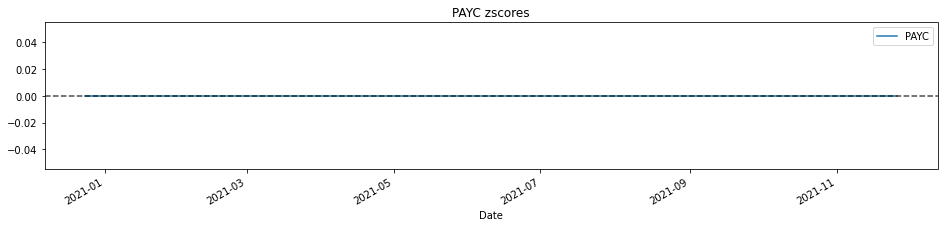

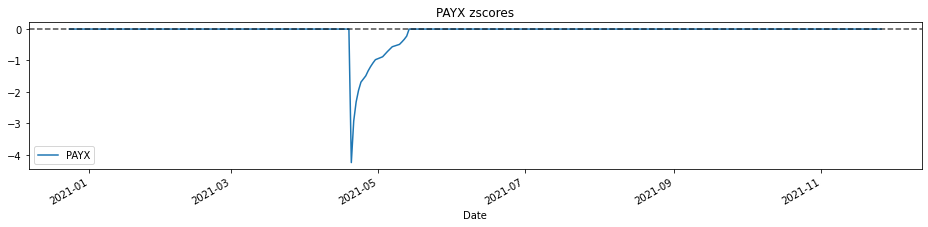

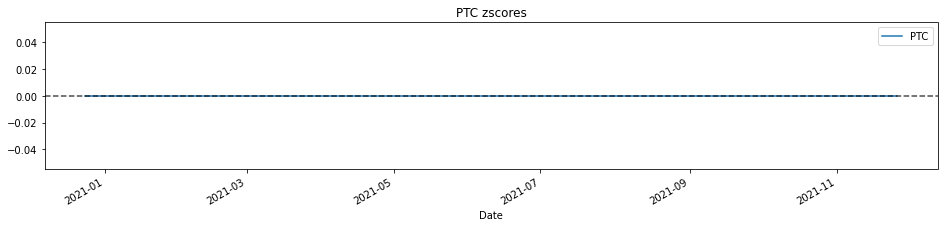

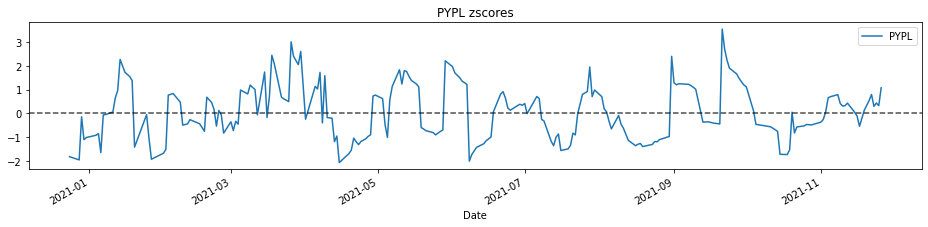

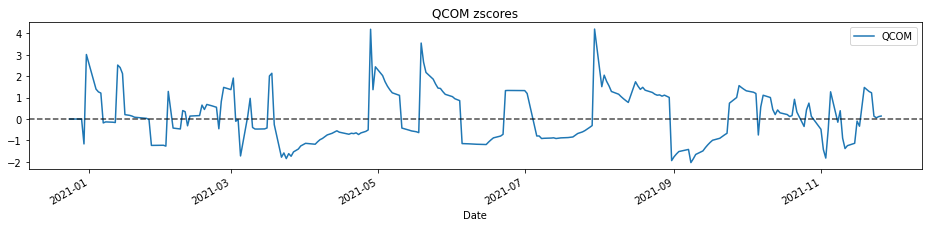

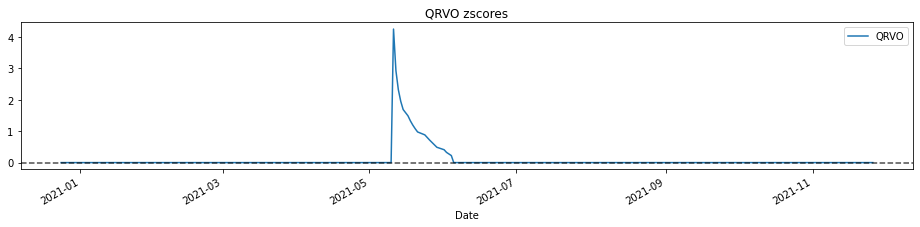

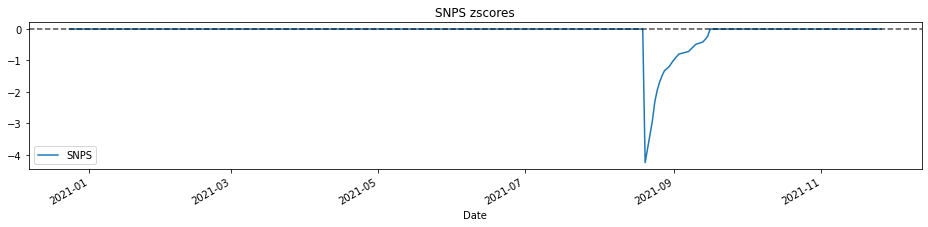

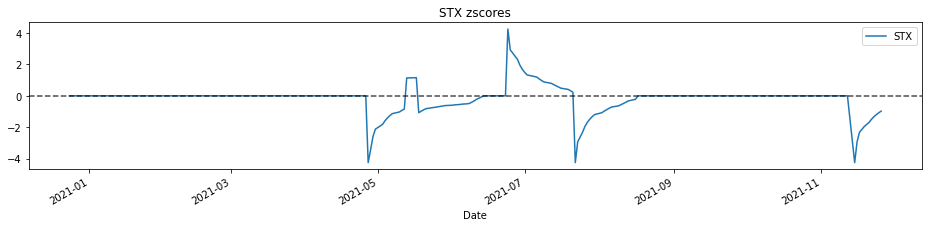

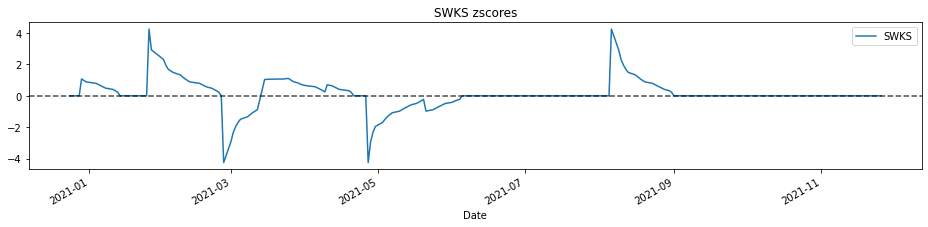

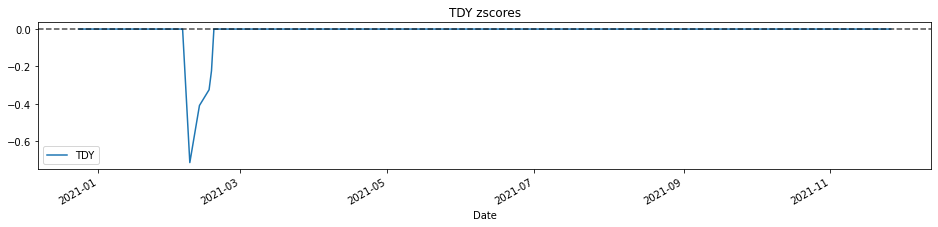

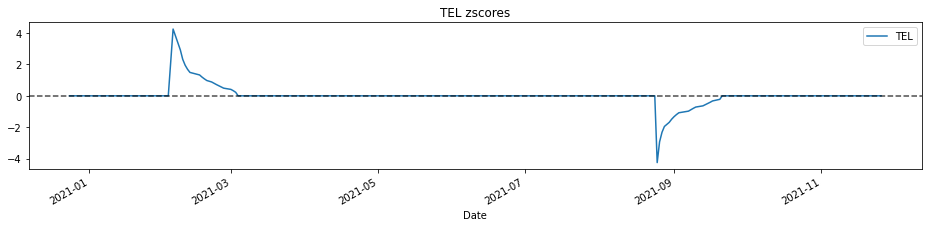

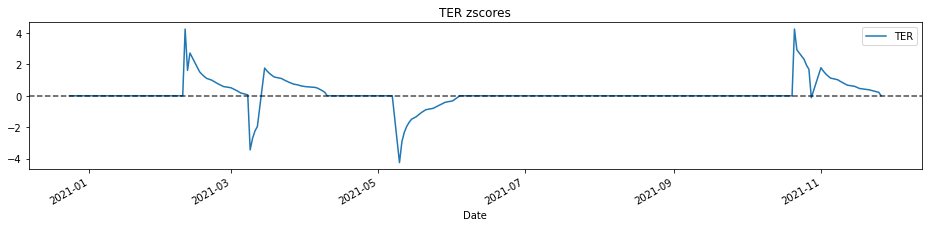

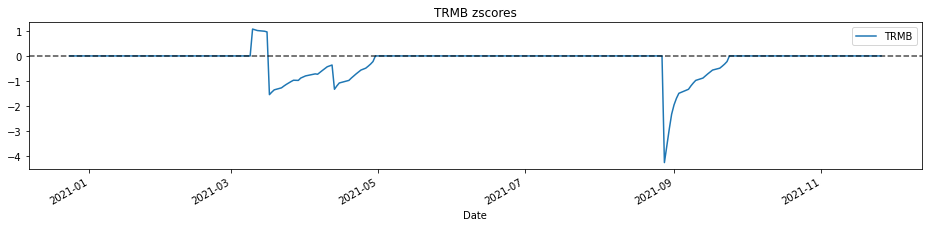

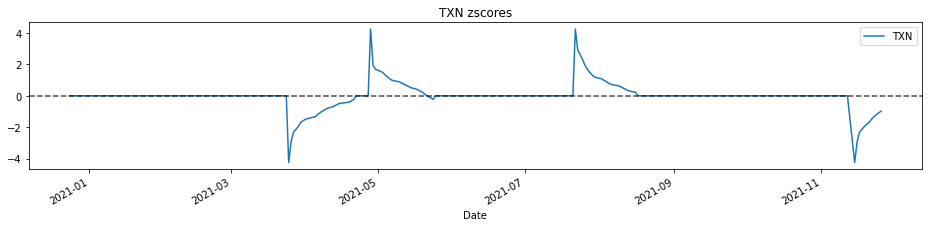

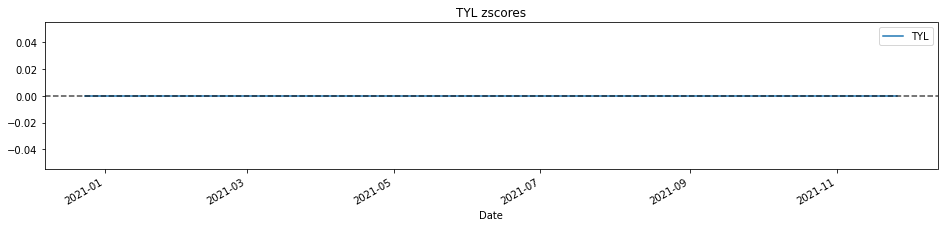

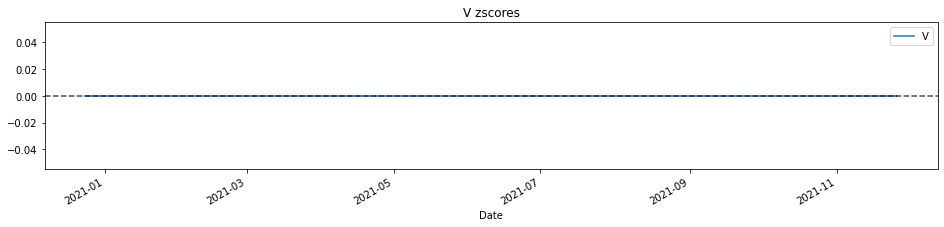

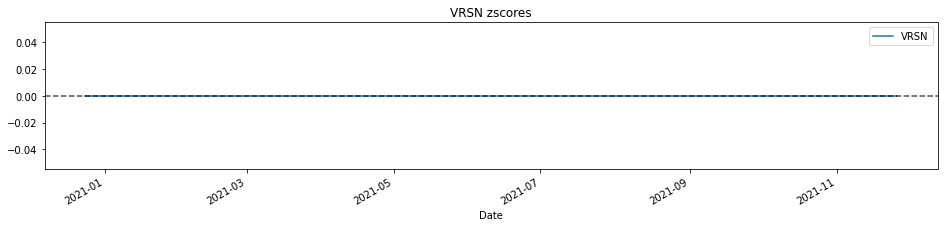

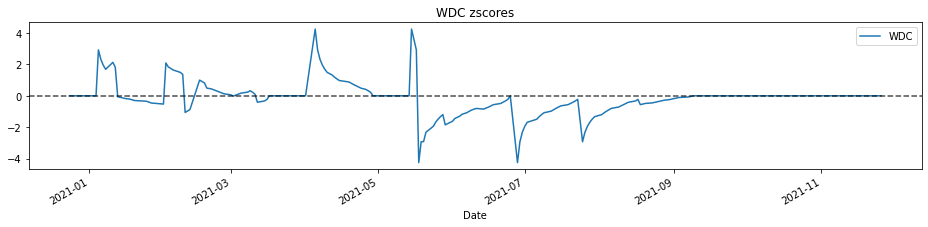

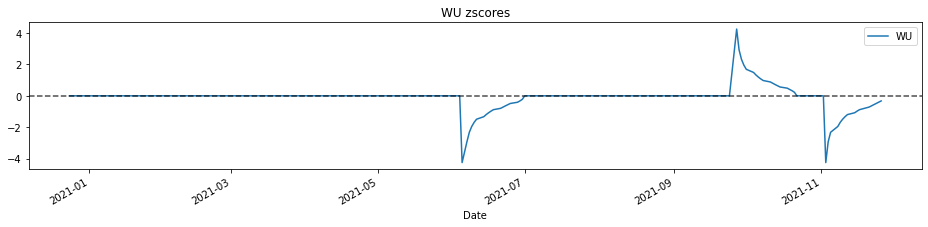

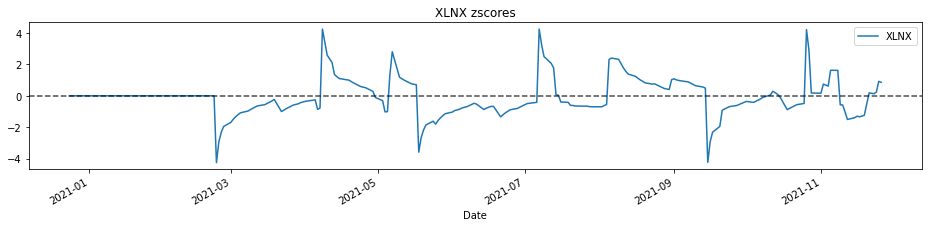

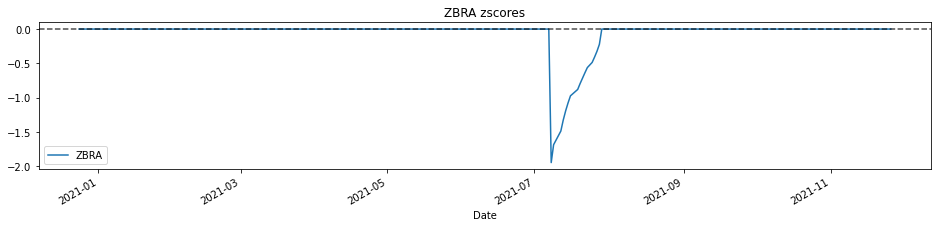

In [34]:
REDDIT_zscore_col = zscore_columns(REDDIT,look_back_window = look_back_window,skipna=True)
sig = REDDIT_zscore_col.copy()
for i in sig.columns:
    column_sig = sig[[i]].replace(np.nan,0)
    fig, ax = plt.subplots(figsize=(16,3))
    column_sig.plot(ax=ax,)
    plt.axhline(y = 0, color = 'black', linestyle = '--',alpha=0.7)
    ax.set_title(i+' zscores')
    plt.show()

In [35]:
REDDIT_zscore_col.loc[['2021-11-02']]

AAPL  ACN      ADBE           ADI       ADP      ADSK  AKAM  \
Date                                                                         
2021-11-02  0.98289  NaN -0.881631  1.298312e-19 -0.217457 -0.562731   NaN   

                    AMAT       AMD  ANET  ...       TER  TRMB  TXN  TYL   V  \
Date                                      ...                                 
2021-11-02  1.581860e-09  0.186844   NaN  ...  1.569365   NaN  0.0  NaN NaN   

            VRSN       WDC            WU      XLNX          ZBRA  
Date                                                              
2021-11-02   NaN -0.000014 -1.369322e-08  0.744907  1.268607e-10  

[1 rows x 75 columns]

In [36]:
REDDIT_zscore_col.loc[['2021-11-02']].dropna(axis=1).T

Date    2021-11-02
AAPL  9.828897e-01
ADBE -8.816307e-01
ADI   1.298312e-19
ADP  -2.174570e-01
ADSK -5.627314e-01
AMAT  1.581860e-09
AMD   1.868440e-01
BR   -4.620089e-21
CRM   7.177826e-02
CTXS -6.380775e-01
ENPH  8.363574e-02
FISV  2.320201e+00
FTNT  1.949359e+00
GPN   2.296423e-08
HPE   4.210858e-27
HPQ   0.000000e+00
IBM  -7.469363e-01
INTC  3.923992e-01
INTU -1.488847e+00
LRCX  7.963840e-01
MSFT -7.393107e-01
MSI  -1.488847e+00
MU    2.199190e+00
NVDA -3.872927e-01
NXPI  4.352052e+00
ORCL  7.149437e-01
PYPL -2.471485e-01
QCOM -1.426446e+00
SNPS -1.929352e-19
TDY  -5.741058e-10
TEL  -2.183752e-25
TER   1.569365e+00
TXN   0.000000e+00
WDC  -1.433030e-05
WU   -1.369322e-08
XLNX  7.449067e-01
ZBRA  1.268607e-10

### Market neutral

$ R_{p} = \sum \limits _{i=1} ^{N} w_{i}r_{i} $

Portfolio return, $R_{p}$, is the sum of the stock-specific return, $r_{i}$, multiplied by the stocks portfolio weight, $w_{i}$. 

Ultimately we want a metric which is reflecting "which stock has best/worst positive sentiment?"

It is on this metric we base the allocation, which stock are to be longed/shorted but also to determine how much of each stock should we long/short, that is the weights. 


So far, we have only incorporate todays positive percentage of comments in relation to the 20-day window of the stock in isolation. "Is the percentage of positve comments for apple larger then what the positve percentage use to be for apple?".  

Example: On the day of 2020-01-01 if AAPL has 1.2345, NVDA has 1.01, AMD has -1.4 and ZBRA has 2.4. What this means is that 

* AAPL has a positive percentage 1.2345 standard deviations above its 20-day positive percentage mean. 

* AMD has a positive percentage 1.4 standard deviations below its 20-day positive percentage mean.

Now to determine what stock should be allocated to the long and short baskets the are at least 2-ways:

* 1. Long positive values, short negative values. 
* 2. Use quantile-binning, that is, using quantile tresholds so that the stocks with a score above that threshold is longed, and use the same or another threshold to determine what stocks to short so that stocks with scores below that threshold is allocated to the short basket. 

In the first case, long positive zscores and short negative zscores, we would in this example only short AMD and go long the other three stocks. We are thus long 75% of the stocks and short 25% of the stocks. In this case our hedge is based on the AMD stock only, the short basket is heavily exposed to company-specific variation. This is a problem since we would to the largest extent possible only be exposed to variation that is due to sentiment. But here, the return of our strategy, and hence the profit and loss of our strategy is heavily influenced by the price fluctuations of a single stock, AMD. 

Since we have only constructed our scores based on the stocks in isolation, this behavior is likely to be pretty common. For the bloomberg data, where we have comments on each stock for each day, there is on average 58% of the stocks with negative zscore each day and 42% of the stocks with positive zscores. 

With a max of 75% (on that day, out of the 75 stocks in our universe, we long 75% of them and short 25% of them) and a min of 15% (on that day, out of the 75 stocks in our universe, we long 15% of them and short 85% of them).


This was on the bloomberg data when we have comments for each day on each stock and this problem is likely to be even more severe in the sparse twitter- and reddit data. 


In [37]:
counts = BLOOMBERG_zscore_col.copy()
counts[counts>0]=1
counts[counts<0]=0
counts['positives'] = counts.sum(axis=1)/75
print('Nr of stocks with positive zscores mean: '+str(counts['positives'].mean()))
print('Nr of stocks with positive zscores max: '+str(counts['positives'].max()))
print('Nr of stocks with positive zscores max: '+str(counts['positives'].min()))

Nr of stocks with positive zscores mean: 0.42062222222222195
Nr of stocks with positive zscores max: 0.7466666666666667
Nr of stocks with positive zscores max: 0.14666666666666667


Lets look at the second case where we use quantile-binning. Here, we will always have an equal amount of stocks in each basket. Lets check it out by partion all stocks with a zscore above the median to the long basket and partion all stock below the median to the short basket:

In [38]:
quantile_alloc              = BLOOMBERG_zscore_col.copy()
quantile_alloc_longs        = BLOOMBERG_zscore_col.copy()
quantile_alloc['Median']    = quantile_alloc.quantile(q=0.5,axis=1)
for i in quantile_alloc_longs.columns:
    quantile_alloc_longs[i] = np.where(quantile_alloc_longs[i]>quantile_alloc['Median'],1,0)

quantile_alloc_longs['positives'] = quantile_alloc_longs.sum(axis=1)/75
print('Nr of stocks with positive zscores mean: '+str(quantile_alloc_longs['positives'].mean()))
print('Nr of stocks with positive zscores max: '+str(quantile_alloc_longs['positives'].max()))
print('Nr of stocks with positive zscores max: '+str(quantile_alloc_longs['positives'].min()))

Nr of stocks with positive zscores mean: 0.49333333333333546
Nr of stocks with positive zscores max: 0.49333333333333335
Nr of stocks with positive zscores max: 0.49333333333333335


If we would use a 20/80 quantile-binning:

In [39]:
quantile_alloc              = BLOOMBERG_zscore_col.copy()
quantile_alloc_longs        = BLOOMBERG_zscore_col.copy()
quantile_alloc['Median']    = quantile_alloc.quantile(q=0.8,axis=1)
for i in quantile_alloc_longs.columns:
    quantile_alloc_longs[i] = np.where(quantile_alloc_longs[i]>quantile_alloc['Median'],1,0)

quantile_alloc_longs['positives'] = quantile_alloc_longs.sum(axis=1)/75
print('Nr of stocks in the upper quantile, mean: '+str(quantile_alloc_longs['positives'].mean()))
print('Nr of stocks in the upper quantile, min: '+str(quantile_alloc_longs['positives'].max()))
print('Nr of stocks in the upper quantile, max: '+str(quantile_alloc_longs['positives'].min()))

Nr of stocks in the upper quantile, mean: 0.20000000000000046
Nr of stocks in the upper quantile, min: 0.2
Nr of stocks in the upper quantile, max: 0.2


In [40]:
quantile_alloc              = BLOOMBERG_zscore_col.copy()
quantile_alloc_longs        = BLOOMBERG_zscore_col.copy()
quantile_alloc['Median']    = quantile_alloc.quantile(q=0.2,axis=1)
for i in quantile_alloc_longs.columns:
    quantile_alloc_longs[i] = np.where(quantile_alloc_longs[i]<quantile_alloc['Median'],1,0)

quantile_alloc_longs['positives'] = quantile_alloc_longs.sum(axis=1)/75
print('Nr of stocks in the lower quantile, mean: '+str(quantile_alloc_longs['positives'].mean()))
print('Nr of stocks in the lower quantile, max: '+str(quantile_alloc_longs['positives'].max()))
print('Nr of stocks in the lower quantile, max: '+str(quantile_alloc_longs['positives'].min()))

Nr of stocks in the lower quantile, mean: 0.20000000000000046
Nr of stocks in the lower quantile, max: 0.2
Nr of stocks in the lower quantile, max: 0.2


As demonstrated, using quantile-binning we minimize the company-specific risk in each basket by having an equal amount of stocks in each basket. Now this is ofcours up to the data aswell. If there is only 10 stocks with sentiment values we are only going long 5 stock and short 5 stocks, but this is in my opinion a better alternative compared to 8 stocks long and 2 stocks short. 

### weights

Now, moving on we need to decide the weights within each basket - what is the percentage amount of our capital that we should invest in each stock? We have an "Equal weighted" version and an "zscore weighted" version. 

To have a 0 net cash exposure to the market, a market neutral strategy, we first start of with a 50/50 allocation between the long and short basket. Within each basket the weights sum to 1.

The equal weighted allocation is just 0.5*(1/N) = stock weight, where N = number of stocks in the basket. The 0.5 comes from the fact that we first split our capital 50/50 to the long and short basket. 

As for the zscore-weighted intuitively it makes sense to have abs(zscore_stock_1)/abs(sum_of_zscore_in_basket) as a weight for stock_1. But, there are some problem with that one so lets look at some data. We look at the last row of the bloomberg data (Recall these are zscore on the stocks historical positive percentages in isolation). So on the day of 2021-11-02 we have the following zscore for our stocks and need to decide how much of our capital should be allocated to each stock

In [41]:
col_last_row_df = BLOOMBERG_zscore_col.loc[[BLOOMBERG_zscore_col.index[-1]]]
col_last_row_df

AAPL       ACN      ADBE       ADI      ADP      ADSK  \
Dates                                                                   
2021-11-02  1.568313 -1.918799 -0.804143 -1.272553  1.47594 -0.297676   

                AKAM     AMAT       AMD      ANET  ...       TER      TRMB  \
Dates                                              ...                       
2021-11-02 -1.277702  1.53434  0.773966  2.955488  ...  1.255814 -0.200894   

                 TXN       TYL         V      VRSN     WDC        WU  \
Dates                                                                  
2021-11-02  1.130102  1.647419  0.587784 -0.212025  0.4319 -0.006535   

                XLNX     ZBRA  
Dates                          
2021-11-02  1.404074  2.31509  

[1 rows x 75 columns]

Let check som stats:

In [42]:
col_last_row_sum = col_last_row_df.sum(axis=1)
print('sum: '+str(col_last_row_sum[0]))
col_last_row_mean = col_last_row_df.mean(axis=1)
print('mean: '+str(col_last_row_mean[0]))
col_last_row_std = col_last_row_df.std(axis=1)
print('std: '+str(col_last_row_std[0]))
col_median  = col_last_row_df.quantile(0.5,axis=1)[0]
print('median: '+str(col_median))

sum: 35.33398647307535
mean: 0.47111981964100447
std: 1.103469645841456
median: 0.5685736944930685


The median zscore on the day of 2021-11-02 is 0.57, so all stocks with a zscore above that threshold goes in to the long basket and all stocks with a zscore below 0.57 goes in to the short basket.

In [43]:
long_basket = col_last_row_df.T[col_last_row_df.T['2021-11-02']>col_median].T
short_basket = col_last_row_df.T[col_last_row_df.T['2021-11-02']<col_median].T

Lets check some stats for the long basket:

In [44]:
print('sum: '+str(long_basket.sum(axis=1)[0]))
print('mean: '+str(long_basket.mean(axis=1)[0]))
print('std: '+str(long_basket.std(axis=1)[0]))

sum: 50.69302294446908
mean: 1.3700817012018667
std: 0.6614625912608612


and the short basket:

In [45]:
print('sum: '+str(short_basket.sum(axis=1)[0]))
print('mean: '+str(short_basket.mean(axis=1)[0]))
print('std: '+str(short_basket.std(axis=1)[0]))

sum: -15.927610165886804
mean: -0.4304759504293731
std: 0.6317479914675171


Now, one important thing to take notice of here is that we are partitioning everything in the short basket below the median,0.57(as discussed earlier we choose the median to have a symmetry in each basket and hence to minimize company-specific risk). Short all stocks with a zscore below 0.57 means that we are shorting 0.56, 0.4, 0.3 and so on-positve values. There is a mix of positive and negative zscores in the basket. Another case that will happen is that all zscores are negative or all zscores are positive. 

So, a abs(stock_zscore)/sum(zscore_basket) will be a bad choice, lets check the short basket:  

In [46]:
short_basket_sorted = short_basket.T.sort_values('2021-11-02',ascending = False)
short_basket_sorted.index.name = ''

In [47]:
short_basket_sorted.columns = ['zscore']

In [48]:
short_basket_sorted

zscore
              
FLT   0.527181
TEL   0.497186
WDC   0.431900
IPGP  0.407974
IT    0.254427
PYPL  0.145283
KEYS  0.095529
CDAY  0.026680
HPQ   0.025262
BR    0.016888
WU   -0.006535
CTXS -0.096876
MPWR -0.150533
NVDA -0.196747
TRMB -0.200894
MCHP -0.209692
VRSN -0.212025
STX  -0.256589
ORCL -0.295441
ADSK -0.297676
NLOK -0.365295
JKHY -0.427326
QCOM -0.440355
AVGO -0.593538
NTAP -0.602852
PTC  -0.618017
QRVO -0.693142
INTU -0.785522
ADBE -0.804143
CDW  -0.822231
PAYX -1.119965
FTNT -1.212228
ADI  -1.272553
AKAM -1.277702
DXC  -1.552774
ACN  -1.918799
SNPS -1.926472

In [49]:
sum_short_basket = abs(short_basket.sum(axis=1)[0])

In [50]:
sum_short_basket

15.927610165886804

In the short basket we would want have most weight on the lowest zscore, and the smallest weight on the highest zscore

In [51]:
short_basket_sorted['zscore rank weights'] = short_basket_sorted['zscore'].rank(ascending=False)

In [52]:
short_basket_sorted

zscore  zscore rank weights
                                   
FLT   0.527181                  1.0
TEL   0.497186                  2.0
WDC   0.431900                  3.0
IPGP  0.407974                  4.0
IT    0.254427                  5.0
PYPL  0.145283                  6.0
KEYS  0.095529                  7.0
CDAY  0.026680                  8.0
HPQ   0.025262                  9.0
BR    0.016888                 10.0
WU   -0.006535                 11.0
CTXS -0.096876                 12.0
MPWR -0.150533                 13.0
NVDA -0.196747                 14.0
TRMB -0.200894                 15.0
MCHP -0.209692                 16.0
VRSN -0.212025                 17.0
STX  -0.256589                 18.0
ORCL -0.295441                 19.0
ADSK -0.297676                 20.0
NLOK -0.365295                 21.0
JKHY -0.427326                 22.0
QCOM -0.440355                 23.0
AVGO -0.593538                 24.0
NTAP -0.602852                 25.0
PTC  -0.618017                 26.0
QRVO -0.693142                 27.0
INTU -0.785522                 28.0
ADBE -0.804143                 29.0
CDW  -0.822231                 30.0
PAYX -1.119965                 31.0
FTNT -1.212228                 32.0
ADI  -1.272553                 33.0
AKAM -1.277702                 34.0
DXC  -1.552774                 35.0
ACN  -1.918799                 36.0
SNPS -1.926472                 37.0

So here the column 'zscore rank weights' is how the degree of weights should be based on the zscores. SNPS, ranked 37, highes rank should have the highest weight and hence shorted the most and FLP ranked 1, should have the lowest weight

Lets plot the zscores:

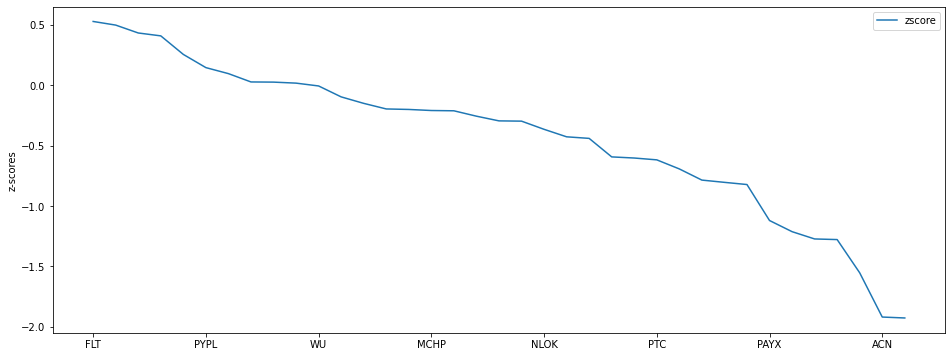

In [53]:
fig, ax = plt.subplots(figsize=(16,6))
short_basket_sorted[['zscore']].plot(ax=ax)
plt.ylabel('z-scores');

We want the weights to reflect the zscores, so here FLT is going to have the lowest weight and ACN the highest. These weights must sum to 1. So how do we do that?

If we use abs(stock zscore)/sum of zscore in basket, we would get higher weights on the positive zscores:

In [54]:
short_basket_sorted['weights 1'] = abs(short_basket_sorted['zscore'])/sum_short_basket

In [55]:
short_basket_sorted

zscore  zscore rank weights  weights 1
                                              
FLT   0.527181                  1.0   0.033099
TEL   0.497186                  2.0   0.031215
WDC   0.431900                  3.0   0.027116
IPGP  0.407974                  4.0   0.025614
IT    0.254427                  5.0   0.015974
PYPL  0.145283                  6.0   0.009121
KEYS  0.095529                  7.0   0.005998
CDAY  0.026680                  8.0   0.001675
HPQ   0.025262                  9.0   0.001586
BR    0.016888                 10.0   0.001060
WU   -0.006535                 11.0   0.000410
CTXS -0.096876                 12.0   0.006082
MPWR -0.150533                 13.0   0.009451
NVDA -0.196747                 14.0   0.012353
TRMB -0.200894                 15.0   0.012613
MCHP -0.209692                 16.0   0.013165
VRSN -0.212025                 17.0   0.013312
STX  -0.256589                 18.0   0.016110
ORCL -0.295441                 19.0   0.018549
ADSK -0.297676                 20.0   0.018689
NLOK -0.365295                 21.0   0.022935
JKHY -0.427326                 22.0   0.026829
QCOM -0.440355                 23.0   0.027647
AVGO -0.593538                 24.0   0.037265
NTAP -0.602852                 25.0   0.037849
PTC  -0.618017                 26.0   0.038802
QRVO -0.693142                 27.0   0.043518
INTU -0.785522                 28.0   0.049318
ADBE -0.804143                 29.0   0.050487
CDW  -0.822231                 30.0   0.051623
PAYX -1.119965                 31.0   0.070316
FTNT -1.212228                 32.0   0.076109
ADI  -1.272553                 33.0   0.079896
AKAM -1.277702                 34.0   0.080219
DXC  -1.552774                 35.0   0.097489
ACN  -1.918799                 36.0   0.120470
SNPS -1.926472                 37.0   0.120952

As can be seen, the positive zscore values get rather high short weight, and these should have the smallest. FLT gets a for example a weight higher than 20 of the stocks 

What we could do is a rank weighted allocation using the rank column: zscore rank/ sum of zscore ranks:

In [56]:
short_basket_sorted['weight ranks'] = short_basket_sorted['zscore rank weights']/short_basket_sorted['zscore rank weights'].sum()



In [57]:
short_basket_sorted

zscore  zscore rank weights  weights 1  weight ranks
                                                            
FLT   0.527181                  1.0   0.033099      0.001422
TEL   0.497186                  2.0   0.031215      0.002845
WDC   0.431900                  3.0   0.027116      0.004267
IPGP  0.407974                  4.0   0.025614      0.005690
IT    0.254427                  5.0   0.015974      0.007112
PYPL  0.145283                  6.0   0.009121      0.008535
KEYS  0.095529                  7.0   0.005998      0.009957
CDAY  0.026680                  8.0   0.001675      0.011380
HPQ   0.025262                  9.0   0.001586      0.012802
BR    0.016888                 10.0   0.001060      0.014225
WU   -0.006535                 11.0   0.000410      0.015647
CTXS -0.096876                 12.0   0.006082      0.017070
MPWR -0.150533                 13.0   0.009451      0.018492
NVDA -0.196747                 14.0   0.012353      0.019915
TRMB -0.200894                 15.0   0.012613      0.021337
MCHP -0.209692                 16.0   0.013165      0.022760
VRSN -0.212025                 17.0   0.013312      0.024182
STX  -0.256589                 18.0   0.016110      0.025605
ORCL -0.295441                 19.0   0.018549      0.027027
ADSK -0.297676                 20.0   0.018689      0.028450
NLOK -0.365295                 21.0   0.022935      0.029872
JKHY -0.427326                 22.0   0.026829      0.031294
QCOM -0.440355                 23.0   0.027647      0.032717
AVGO -0.593538                 24.0   0.037265      0.034139
NTAP -0.602852                 25.0   0.037849      0.035562
PTC  -0.618017                 26.0   0.038802      0.036984
QRVO -0.693142                 27.0   0.043518      0.038407
INTU -0.785522                 28.0   0.049318      0.039829
ADBE -0.804143                 29.0   0.050487      0.041252
CDW  -0.822231                 30.0   0.051623      0.042674
PAYX -1.119965                 31.0   0.070316      0.044097
FTNT -1.212228                 32.0   0.076109      0.045519
ADI  -1.272553                 33.0   0.079896      0.046942
AKAM -1.277702                 34.0   0.080219      0.048364
DXC  -1.552774                 35.0   0.097489      0.049787
ACN  -1.918799                 36.0   0.120470      0.051209
SNPS -1.926472                 37.0   0.120952      0.052632

However with this method we loose the magnitudes and we will have a linearly increase in weights which does not reflect the zscores: 

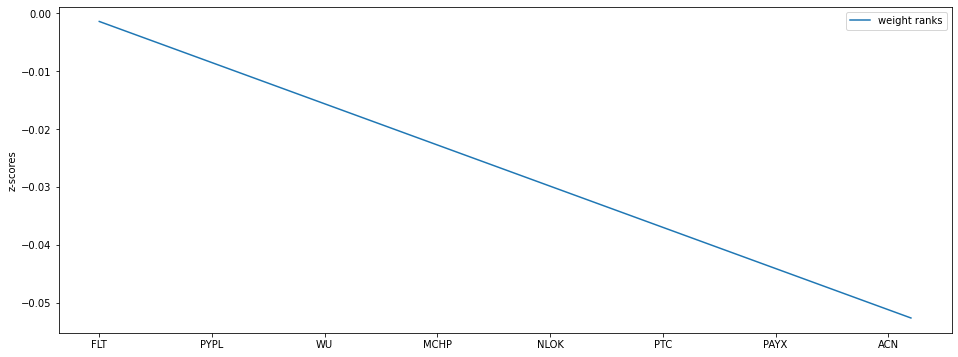

In [58]:
fig, ax = plt.subplots(figsize=(16,6))
short_basket_sorted[['weight ranks']].mul(-1).plot(ax=ax)
plt.ylabel('z-scores');

What about min-max scaling? that should transform the zscores to a number between 0-1 and then calculate the weights on those?:

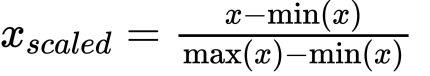

In [59]:
#flip the sign of zscore, so that positive zscores are "worst"
short_basket_sorted['zscore flip'] = short_basket_sorted['zscore']*-1
#min-max transformation
short_basket_sorted['min max'] = (short_basket_sorted['zscore flip'] - short_basket_sorted['zscore flip'].min())/(

short_basket_sorted['zscore flip'].max()-short_basket_sorted['zscore flip'].min()
)

###Caluclate weights
short_basket_sorted['min max weights'] = short_basket_sorted['min max'] / short_basket_sorted['min max'].sum()


In [60]:
#Check that weights =1 
short_basket_sorted['min max weights'].sum()

0.9999999999999999

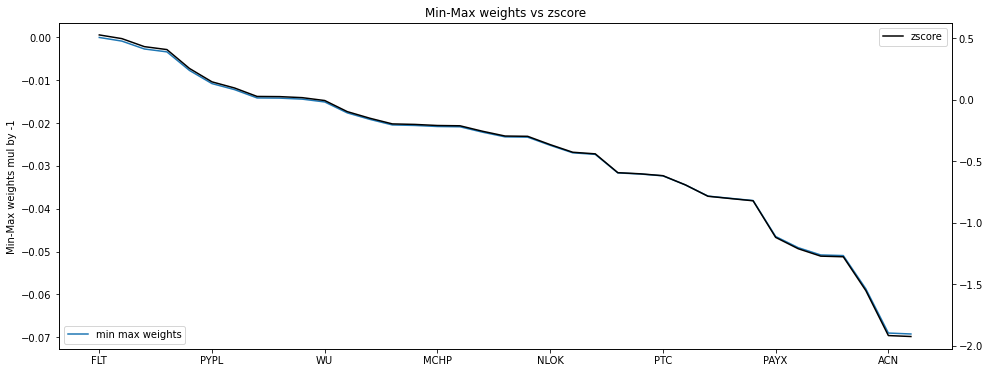

In [61]:
fig, ax = plt.subplots(figsize=(16,6))

short_basket_sorted[['min max weights']].mul(-1).plot(ax=ax)

ax.legend(['min max weights'], loc=3)
plt.ylabel('Min-Max weights mul by -1')
ax.set_title('Min-Max weights vs zscore');

ax2 = ax.twinx()
ax2.set_ylim([short_basket_sorted['zscore'].values.min()-0.10,short_basket_sorted['zscore'].values.max()+0.10])
ax2.legend(['zscore'], loc=2)

short_basket_sorted[['zscore']].plot(ax=ax2,color='black');

Viola! The weight perfectly match the zscores. However:

In [62]:
short_basket_sorted.head()

zscore  zscore rank weights  weights 1  weight ranks  zscore flip  \
                                                                            
FLT   0.527181                  1.0   0.033099      0.001422    -0.527181   
TEL   0.497186                  2.0   0.031215      0.002845    -0.497186   
WDC   0.431900                  3.0   0.027116      0.004267    -0.431900   
IPGP  0.407974                  4.0   0.025614      0.005690    -0.407974   
IT    0.254427                  5.0   0.015974      0.007112    -0.254427   

       min max  min max weights  
                                 
FLT   0.000000         0.000000  
TEL   0.012225         0.000847  
WDC   0.038832         0.002689  
IPGP  0.048584         0.003364  
IT    0.111162         0.007698

FLT has 0 weight and that is because in the formula for min-max scaling we subtract the minimum zscore from each xi. What to do? We could in the case of the bloomberg data just ignore it, however with the sparse twitter and reddit data, that first stock could be a significant portion (say we only have 3 stocks in the basket that would be 30% of the portfolio)

In [63]:
short_basket_sorted.tail()

zscore  zscore rank weights  weights 1  weight ranks  zscore flip  \
                                                                            
ADI  -1.272553                 33.0   0.079896      0.046942     1.272553   
AKAM -1.277702                 34.0   0.080219      0.048364     1.277702   
DXC  -1.552774                 35.0   0.097489      0.049787     1.552774   
ACN  -1.918799                 36.0   0.120470      0.051209     1.918799   
SNPS -1.926472                 37.0   0.120952      0.052632     1.926472   

       min max  min max weights  
                                 
ADI   0.733492         0.050792  
AKAM  0.735590         0.050937  
DXC   0.847697         0.058701  
ACN   0.996873         0.069031  
SNPS  1.000000         0.069247

One idea is that after doing the min-max scaling if we add 0.001 or something to all the min-max-scaled values and then recalculate the weights, the weight on FLT wont be zero

In [64]:
short_basket_sorted['min max'] = short_basket_sorted['min max']+0.001

###Caluclate weights
short_basket_sorted['min max weights'] = short_basket_sorted['min max'] / short_basket_sorted['min max'].sum()

In [65]:
short_basket_sorted['min max weights'].sum()

0.9999999999999999

In [66]:
short_basket_sorted.head()

zscore  zscore rank weights  weights 1  weight ranks  zscore flip  \
                                                                            
FLT   0.527181                  1.0   0.033099      0.001422    -0.527181   
TEL   0.497186                  2.0   0.031215      0.002845    -0.497186   
WDC   0.431900                  3.0   0.027116      0.004267    -0.431900   
IPGP  0.407974                  4.0   0.025614      0.005690    -0.407974   
IT    0.254427                  5.0   0.015974      0.007112    -0.254427   

       min max  min max weights  
                                 
FLT   0.001000         0.000069  
TEL   0.013225         0.000913  
WDC   0.039832         0.002751  
IPGP  0.049584         0.003425  
IT    0.112162         0.007747

In [67]:
short_basket_sorted.tail()

zscore  zscore rank weights  weights 1  weight ranks  zscore flip  \
                                                                            
ADI  -1.272553                 33.0   0.079896      0.046942     1.272553   
AKAM -1.277702                 34.0   0.080219      0.048364     1.277702   
DXC  -1.552774                 35.0   0.097489      0.049787     1.552774   
ACN  -1.918799                 36.0   0.120470      0.051209     1.918799   
SNPS -1.926472                 37.0   0.120952      0.052632     1.926472   

       min max  min max weights  
                                 
ADI   0.734492         0.050731  
AKAM  0.736590         0.050876  
DXC   0.848697         0.058620  
ACN   0.997873         0.068923  
SNPS  1.001000         0.069139

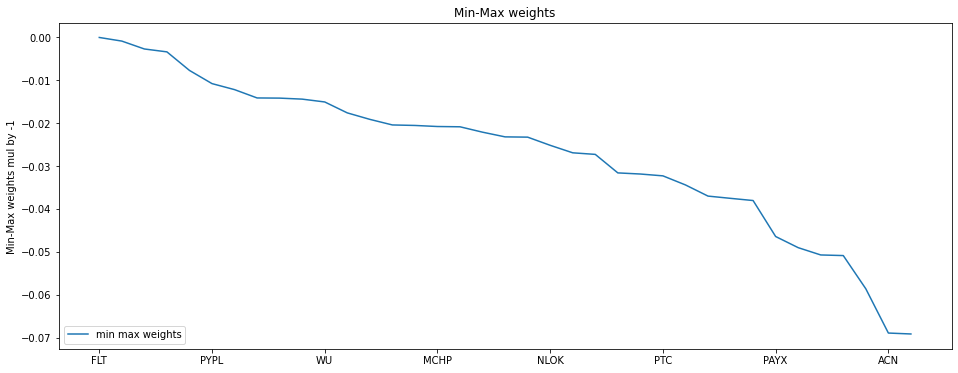

In [68]:
fig, ax = plt.subplots(figsize=(16,6))

short_basket_sorted[['min max weights']].mul(-1).plot(ax=ax)

ax.legend(['min max weights'], loc=3)
plt.ylabel('Min-Max weights mul by -1')
ax.set_title('Min-Max weights');

To recap:

* 1. We first loaded the data
* 2. then we made a exponetial weighted transformations on both the total counts and the positive counts
* 3. we then divided the positive by the total to get a positive percentage
* 4. we then did a historical zscore transformation on the positive percentage
* 5. we came to the conclusion that using quantile-binning was the better choice to determine what to long and what to short, considering that our ambition is to be market neutral and minimize the company specific risk in each basket. 
* 6. we came to the conclusion that for a zscore weighted allocation within the bins a min-max scaling transformation needs to be done to get weight that reflect the zscores 

# ZSCORE ROWS (Between stocks) punkt 6

From doing the historical zscore we have a series of zscores based on each stocks historical positive percentage in isolation to the other stocks.    

However, It could be the case that there is a general tendency of positive increased comments within all the XLK stocks today given the 20-day window due to a general increased positive sentiment towards tech stocks. So a high 20-day zscore for Apple today could be due to non-apple specific sentiment, comments including multiple tickers for example.

Making a market neutral strategy, for the reasons explained earlier, we would obviously like to have weights reflecting the stocks in relation to each other. One cool thing with the zscores done previously are that we kind of already have cross-sectional numbers since these zscores are of the same unit and we could just use these to determine how much of each stock we should short/long. If AAPL have 1.2 and NVDA have 1.5 historical zscore today we allocate more to NVDA than to AAPL, since NVDA has a little bit stronger sentiment to its historical mean than apple has to its historical mean. 

However, having a metric where cross-sectional difference is incorporated would be interesting to see. One ide is to make another zscore, a cross-sectional zscore on top of the historical zscore. But, there is already a cross-sectional ordinal scale and a cross-sectional zscore on top of the historical zscore would just maintain that ordering, lets test it! Will the weights be the same?

First lets check som stats on the historical zscores

In [69]:
means_punkt_5 = []
stds_punkt_5 = []
mins_punkt_5 = []
maxs_punkt_5 = []

for i in BLOOMBERG_zscore_col.T.columns:
    means = BLOOMBERG_zscore_col.T[i].mean()
    means_punkt_5.append(means)
    stds = BLOOMBERG_zscore_col.T[i].std()
    stds_punkt_5.append(stds)
    
    mins = BLOOMBERG_zscore_col.T[i].min()
    mins_punkt_5.append(mins)
    
    maxs = BLOOMBERG_zscore_col.T[i].max()
    maxs_punkt_5.append(maxs)
    

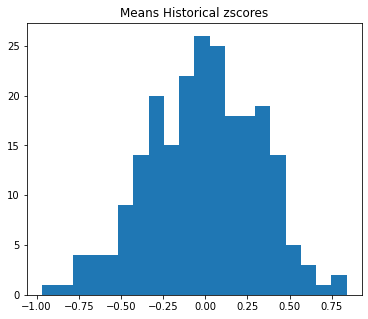

In [70]:
fig, ax = plt.subplots(figsize=(6,5))
plt.hist(means_punkt_5, bins = 20
        )

plt.title('Means Historical zscores')
plt.show()

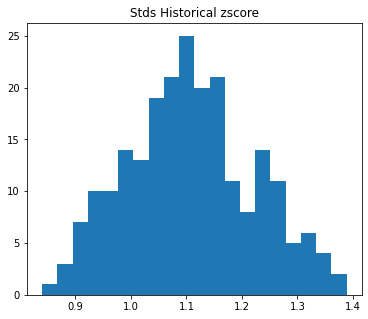

In [71]:
fig, ax = plt.subplots(figsize=(6,5))
plt.hist(stds_punkt_5, bins = 20
        )

plt.title('Stds Historical zscore')
plt.show()

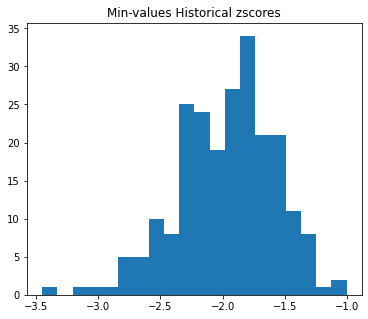

In [72]:
fig, ax = plt.subplots(figsize=(6,5))
plt.hist(mins_punkt_5, bins = 20
        )

plt.title('Min-values Historical zscores')
plt.show()

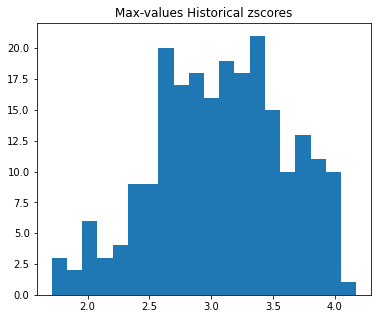

In [73]:
fig, ax = plt.subplots(figsize=(6,5))
plt.hist(maxs_punkt_5, bins = 20
        )

plt.title('Max-values Historical zscores')
plt.show()

$z_{i}=  \frac{x_{i}- \bar{x}}{ \sigma} $

$z_{i}=  \frac{x_{i}}{ \sigma} - \frac{\bar{x}}{ \sigma} $

$\frac{\bar{x}}{ \sigma} $:

In [74]:
df = pd.DataFrame()
df['Means'] = means_punkt_5
df['Stds'] = stds_punkt_5
df['CV rev'] = df['Means']/df['Stds']

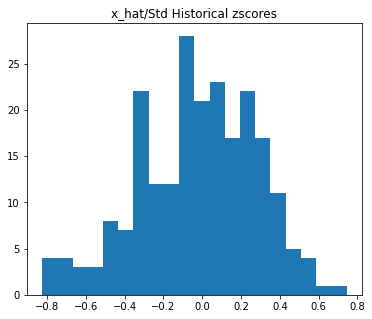

In [75]:
fig, ax = plt.subplots(figsize=(6,5))
plt.hist(df['CV rev'].values, bins = 20
        )

plt.title('x_hat/Std Historical zscores')
plt.show()

In [76]:
col_last_row_df = BLOOMBERG_zscore_col.loc[[BLOOMBERG_zscore_col.index[-1]]]
col_last_row_df

AAPL       ACN      ADBE       ADI      ADP      ADSK  \
Dates                                                                   
2021-11-02  1.568313 -1.918799 -0.804143 -1.272553  1.47594 -0.297676   

                AKAM     AMAT       AMD      ANET  ...       TER      TRMB  \
Dates                                              ...                       
2021-11-02 -1.277702  1.53434  0.773966  2.955488  ...  1.255814 -0.200894   

                 TXN       TYL         V      VRSN     WDC        WU  \
Dates                                                                  
2021-11-02  1.130102  1.647419  0.587784 -0.212025  0.4319 -0.006535   

                XLNX     ZBRA  
Dates                          
2021-11-02  1.404074  2.31509  

[1 rows x 75 columns]

In [77]:
test = col_last_row_df.T
test.columns = ['zscore hist']
test['zscore cross'] = (test['zscore hist'] - test['zscore hist'].mean(skipna=True))/test['zscore hist'].std(skipna=True)



In [78]:
test

zscore hist  zscore cross
AAPL     1.568313      0.994312
ACN     -1.918799     -2.165822
ADBE    -0.804143     -1.155685
ADI     -1.272553     -1.580173
ADP      1.475940      0.910601
...           ...           ...
VRSN    -0.212025     -0.619088
WDC      0.431900     -0.035542
WU      -0.006535     -0.432866
XLNX     1.404074      0.845473
ZBRA     2.315090      1.671066

[75 rows x 2 columns]

In [79]:
test['zscore hist'].median()

0.5685736944930685

In [80]:
test['zscore cross'].median()

0.0883158637116385

In [81]:
long_hist = test[['zscore hist']][test['zscore hist']>test['zscore hist'].median()]
long_cross = test[['zscore cross']][test['zscore cross']>test['zscore cross'].median()]

short_hist = test[['zscore hist']][test['zscore hist']<test['zscore hist'].median()]
short_cross = test[['zscore cross']][test['zscore cross']<test['zscore cross'].median()]


In [82]:
long_hist['zscore flip'] = long_hist['zscore hist']
long_hist['min max'] = (long_hist['zscore flip'] - long_hist['zscore flip'].min())/(
long_hist['zscore flip'].max()-long_hist['zscore flip'].min())
long_hist['min max weights long hist'] = long_hist['min max'] / long_hist['min max'].sum()

In [83]:
long_cross['zscore flip'] = long_cross['zscore cross']
long_cross['min max'] = (long_cross['zscore flip'] - long_cross['zscore flip'].min())/(
long_cross['zscore flip'].max()-long_cross['zscore flip'].min())
long_cross['min max weights long cross'] = long_cross['min max'] / long_cross['min max'].sum()

In [84]:
short_hist['zscore flip'] = short_hist['zscore hist']*-1
short_hist['min max'] = (short_hist['zscore flip'] - short_hist['zscore flip'].min())/(
short_hist['zscore flip'].max()-short_hist['zscore flip'].min())
short_hist['min max weights short hist'] = short_hist['min max'] / short_hist['min max'].sum()

In [85]:
short_cross['zscore flip'] = short_cross['zscore cross']*-1
short_cross['min max'] = (short_cross['zscore flip'] - short_cross['zscore flip'].min())/(
short_cross['zscore flip'].max()-short_cross['zscore flip'].min())
short_cross['min max weights short cross'] = short_cross['min max'] / short_cross['min max'].sum()

In [86]:
long_hist = long_hist.sort_values('zscore hist',ascending=False)
long_cross = long_cross.sort_values('zscore cross',ascending=False)

In [87]:
short_hist = short_hist.sort_values('zscore hist',ascending=False)
short_cross = short_cross.sort_values('zscore cross',ascending=False)

In [88]:
long_hist_weights = long_hist[['min max weights long hist']]
long_hist_weights = long_hist_weights.reset_index()
long_cross_weights = long_cross[['min max weights long cross']]
long_cross_weights = long_cross_weights.reset_index()

In [89]:
long_weights = pd.concat([long_hist_weights,long_cross_weights],axis=1)
long_weights

index  min max weights long hist index  min max weights long cross
0   NXPI                   0.105519  NXPI                    0.105519
1   ANET                   0.080780  ANET                    0.080780
2   ZBRA                   0.059068  ZBRA                    0.059068
3    CRM                   0.046627   CRM                    0.046627
4   ANSS                   0.046190  ANSS                    0.046190
5   JNPR                   0.044595  JNPR                    0.044595
6   LRCX                   0.041023  LRCX                    0.041023
7   CSCO                   0.037190  CSCO                    0.037190
8   KLAC                   0.036752  KLAC                    0.036752
9    APH                   0.036707   APH                    0.036707
10   TYL                   0.036430   TYL                    0.036430
11  AAPL                   0.033748  AAPL                    0.033748
12  INTC                   0.033568  INTC                    0.033568
13  AMAT                   0.032596  AMAT                    0.032596
14   ADP                   0.030616   ADP                    0.030616
15   FIS                   0.030191   FIS                    0.030191
16  CTSH                   0.029621  CTSH                    0.029621
17  XLNX                   0.028180  XLNX                    0.028180
18  FFIV                   0.026040  FFIV                    0.026040
19   NOW                   0.024970   NOW                    0.024970
20   TER                   0.023153   TER                    0.023153
21  PAYC                   0.021580  PAYC                    0.021580
22   TXN                   0.018890   TXN                    0.018890
23    MU                   0.015927    MU                    0.015927
24   HPE                   0.015368   HPE                    0.015368
25  ENPH                   0.013360  ENPH                    0.013360
26  MSFT                   0.012590  MSFT                    0.012590
27   GLW                   0.009024   GLW                    0.009024
28   MSI                   0.007632   MSI                    0.007632
29   AMD                   0.006816   AMD                    0.006816
30   TDY                   0.006599   TDY                    0.006599
31  CDNS                   0.005117  CDNS                    0.005117
32   GPN                   0.002415   GPN                    0.002415
33     V                   0.000503     V                    0.000503
34  FISV                   0.000315  FISV                    0.000315
35  SWKS                   0.000302  SWKS                    0.000302
36   IBM                   0.000000   IBM                    0.000000

In [90]:
short_hist_weights  = short_hist[['min max weights short hist']]
short_hist_weights  = short_hist_weights.reset_index()
short_cross_weights = short_cross[['min max weights short cross']]
short_cross_weights = short_cross_weights.reset_index()

In [91]:
short_weights = pd.concat([short_hist_weights,short_cross_weights],axis=1)
short_weights

index  min max weights short hist index  min max weights short cross
0    FLT                    0.000000   FLT                     0.000000
1    TEL                    0.000847   TEL                     0.000847
2    WDC                    0.002689   WDC                     0.002689
3   IPGP                    0.003364  IPGP                     0.003364
4     IT                    0.007698    IT                     0.007698
5   PYPL                    0.010778  PYPL                     0.010778
6   KEYS                    0.012182  KEYS                     0.012182
7   CDAY                    0.014125  CDAY                     0.014125
8    HPQ                    0.014165   HPQ                     0.014165
9     BR                    0.014401    BR                     0.014401
10    WU                    0.015063    WU                     0.015063
11  CTXS                    0.017612  CTXS                     0.017612
12  MPWR                    0.019126  MPWR                     0.019126
13  NVDA                    0.020431  NVDA                     0.020431
14  TRMB                    0.020548  TRMB                     0.020548
15  MCHP                    0.020796  MCHP                     0.020796
16  VRSN                    0.020862  VRSN                     0.020862
17   STX                    0.022120   STX                     0.022120
18  ORCL                    0.023216  ORCL                     0.023216
19  ADSK                    0.023279  ADSK                     0.023279
20  NLOK                    0.025187  NLOK                     0.025187
21  JKHY                    0.026938  JKHY                     0.026938
22  QCOM                    0.027306  QCOM                     0.027306
23  AVGO                    0.031629  AVGO                     0.031629
24  NTAP                    0.031892  NTAP                     0.031892
25   PTC                    0.032320   PTC                     0.032320
26  QRVO                    0.034440  QRVO                     0.034440
27  INTU                    0.037047  INTU                     0.037047
28  ADBE                    0.037573  ADBE                     0.037573
29   CDW                    0.038083   CDW                     0.038083
30  PAYX                    0.046486  PAYX                     0.046486
31  FTNT                    0.049090  FTNT                     0.049090
32   ADI                    0.050792   ADI                     0.050792
33  AKAM                    0.050937  AKAM                     0.050937
34   DXC                    0.058701   DXC                     0.058701
35   ACN                    0.069031   ACN                     0.069031
36  SNPS                    0.069247  SNPS                     0.069247

The weights do not change and that is because we already had an ordering between the stocks, a rank, based on the historical zscores and that is really what zscore does - rank the elements in the set towards its mean and push the distribution to center at 0:

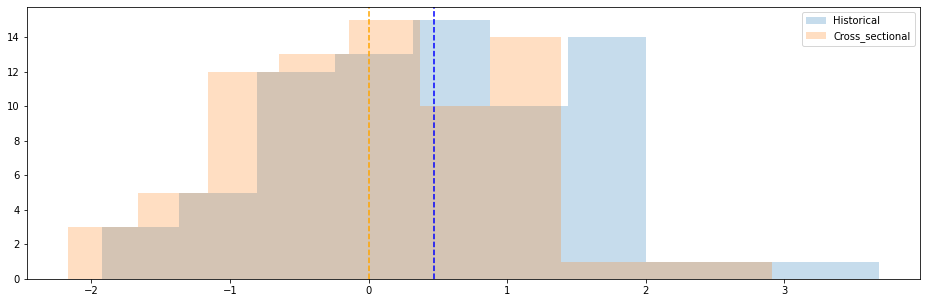

In [92]:
binz = 10

plt.figure(figsize=(16,5))
plt.hist(test['zscore hist'], alpha = 0.25, label = 'Historical',bins=binz)
plt.hist(test['zscore cross'], alpha = 0.25, label = 'Cross_sectional',bins=binz)
plt.axvline(np.mean(test['zscore hist']), color = 'blue', ls = '--')
plt.axvline(np.mean(test['zscore cross']), color = 'orange', ls = '--')
plt.legend()
plt.show()

In [93]:
print('Cross-Sectional - Nr of stocks above zero: '+str(len(test[test['zscore cross']>0])))
print('Cross-Sectional - Nr of stocks below zero: '+str(len(test[test['zscore cross']<0])))
print('Cross-Sectional - Nr of stocks above median: '+str(len(test[test['zscore cross']>test['zscore cross'].median()])))
print('Cross-Sectional - Nr of stocks below median: '+str(len(test[test['zscore cross']<test['zscore cross'].median()])))



Cross-Sectional - Nr of stocks above zero: 40
Cross-Sectional - Nr of stocks below zero: 35
Cross-Sectional - Nr of stocks above median: 37
Cross-Sectional - Nr of stocks below median: 37


In [94]:
print('Historical - Nr of stocks above zero: '+str(len(test[test['zscore hist']>0])))
print('Historical - Nr of stocks below zero: '+str(len(test[test['zscore hist']<0])))
print('Historical - Nr of stocks above median: '+str(len(test[test['zscore hist']>test['zscore hist'].median()])))
print('Historical - Nr of stocks below median: '+str(len(test[test['zscore hist']<test['zscore hist'].median()])))


Historical - Nr of stocks above zero: 48
Historical - Nr of stocks below zero: 27
Historical - Nr of stocks above median: 37
Historical - Nr of stocks below median: 37


# V2: Cross-sectional first, then historical zscores

So, a third thing to test would be to zscore the cross-sectionals first, then do the 20-day historical zscore on top of that. 

Original Data:

In [95]:
BLOOMBERG

AAPL       ACN      ADBE       ADI       ADP      ADSK  \
Dates                                                                    
2020-11-25  0.005437  0.106061  0.100000  0.269231  0.062500  0.349693   
2020-11-26  0.005584  0.089506  0.067961  0.443038  0.084746  0.301829   
2020-11-27  0.006630  0.090812  0.117002  0.718919  0.110465  0.285233   
2020-11-30  0.006942  0.067978  0.168887  1.073113  0.090028  0.295208   
2020-12-01  0.007424  0.079627  0.240869  0.510884  0.097101  0.271441   
...              ...       ...       ...       ...       ...       ...   
2021-10-27  0.012092  0.075824  0.054903  0.119239  0.101210  0.036557   
2021-10-28  0.013277  0.060198  0.041384  0.076867  0.127574  0.063755   
2021-10-29  0.018684  0.043277  0.053262  0.085872  0.175660  0.073970   
2021-11-01  0.018987  0.035332  0.054318  0.071282  0.163611  0.057692   
2021-11-02  0.016125  0.028491  0.065202  0.058503  0.142993  0.059252   

                AKAM      AMAT       AMD      ANET  ...       TER      TRMB  \
Dates                                               ...                       
2020-11-25  0.200000  0.230769  0.117892  0.027778  ...  0.111111  0.111111   
2020-11-26  0.118644  0.365854  0.116972  0.053763  ...  0.069444  0.208333   
2020-11-27  0.110577  0.522936  0.113488  0.089202  ...  0.148148  0.333333   
2020-11-30  0.140252  0.552408  0.122712  0.128205  ...  0.254630  0.386905   
2020-12-01  0.094772  0.417546  0.127064  0.121056  ...  0.228196  0.256691   
...              ...       ...       ...       ...  ...       ...       ...   
2021-10-27  0.071689  0.077160  0.142753  0.126096  ...  0.265408  0.060664   
2021-10-28  0.026429  0.079605  0.141702  0.118575  ...  0.218661  0.050055   
2021-10-29  0.020438  0.085417  0.132334  0.077603  ...  0.351962  0.084737   
2021-11-01  0.016543  0.088718  0.131326  0.078841  ...  0.334318  0.079562   
2021-11-02  0.032027  0.127517  0.122200  0.216974  ...  0.312458  0.058226   

                 TXN       TYL         V      VRSN       WDC        WU  \
Dates                                                                    
2020-11-25  0.076923  0.083333  0.139785  0.666667  0.333333  0.081081   
2020-11-26  0.073529  0.079365  0.090395  0.833333  0.294118  0.053571   
2020-11-27  0.116564  0.124183  0.102249  1.151515  0.283582  0.050258   
2020-11-30  0.199664  0.180556  0.077527  1.220657  0.382353  0.047727   
2020-12-01  0.276440  0.202107  0.103378  0.849950  0.228407  0.038089   
...              ...       ...       ...       ...       ...       ...   
2021-10-27  0.145452  0.139558  0.152942  0.168296  0.050482  0.019871   
2021-10-28  0.152211  0.147921  0.111630  0.182327  0.072090  0.026669   
2021-10-29  0.157953  0.250720  0.098966  0.096048  0.116401  0.029360   
2021-11-01  0.157174  0.275461  0.098735  0.092985  0.115269  0.022231   
2021-11-02  0.168048  0.216145  0.099600  0.088740  0.087942  0.014377   

                XLNX      ZBRA  
Dates                           
2020-11-25  0.083333  0.066667  
2020-11-26  0.072464  0.115942  
2020-11-27  0.109195  0.206061  
2020-11-30  0.221601  0.186544  
2020-12-01  0.174374  0.178070  
...              ...       ...  
2021-10-27  0.136952  0.109022  
2021-10-28  0.192512  0.080287  
2021-10-29  0.223392  0.151984  
2021-11-01  0.221552  0.118429  
2021-11-02  0.193424  0.211368  

[245 rows x 75 columns]

###  #1 Caluclate cross_sectional zscores

In [96]:
#stock relative
def zscore_rows(data_df,skipna=True):
    df                       = data_df.copy()
    df_mean                  = df.mean(axis=1,skipna=skipna)
    df_std                   = df.std(axis=1,skipna=skipna)
    
    for i in df.columns:
        df[i] = (df[i]-df_mean)/df_std
    
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
        
    return df

In [97]:
cross_sectional_BLOOMBERG = zscore_rows(BLOOMBERG,skipna=True)

###  #2 Caluclate historical zscores

In [98]:
BLOOMBERG_zscore_col = zscore_columns(cross_sectional_BLOOMBERG,look_back_window = look_back_window,skipna=True)

So, we have first calcualted the cross-sectional zscores, on these we have then calcualted the historical rolling 20-day zscore on each stock.

The cross-sectional zscore answers the question: "How high/low is todays positive percentage of Apple compared to the other stocks?"

The historical zscores is then answering: "How high/low is todays cross-sectional zscore of Apple in relation to how the cross-sectional zscore have been for Apple the last 20 days?" 

Let's compare the resulting weights with same data as before,the last row of the bloomberg data:

In [99]:
col_last_row_df = BLOOMBERG_zscore_col.loc[[BLOOMBERG_zscore_col.index[-1]]]
col_last_row_df

AAPL      ACN      ADBE       ADI       ADP      ADSK  \
Dates                                                                   
2021-11-02 -0.429924 -1.76428 -1.303406 -1.493328  1.308976 -0.842072   

                AKAM      AMAT       AMD      ANET  ...       TER      TRMB  \
Dates                                               ...                       
2021-11-02 -1.680535  0.089383 -0.814616  2.587997  ...  1.002534 -0.636584   

                 TXN       TYL         V     VRSN       WDC        WU  \
Dates                                                                   
2021-11-02  0.479218  1.714672 -0.402623 -0.50091 -0.437569 -0.826069   

                XLNX     ZBRA  
Dates                          
2021-11-02  1.209656  1.77041  

[1 rows x 75 columns]

In [100]:
new_test = col_last_row_df.T
new_test.columns = ['New zscore']

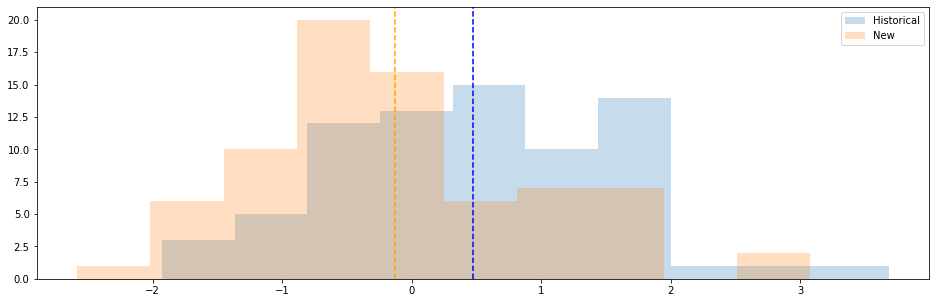

In [101]:
binz = 10

plt.figure(figsize=(16,5))
plt.hist(test['zscore hist'], alpha = 0.25, label = 'Historical',bins=binz)
plt.hist(new_test['New zscore'], alpha = 0.25, label = 'New',bins=binz)
plt.axvline(np.mean(test['zscore hist']), color = 'blue', ls = '--')
plt.axvline(np.mean(new_test['New zscore']), color = 'orange', ls = '--')
plt.legend()
plt.show()

In [102]:
test_3 = col_last_row_df.T
test_3.columns = ['zscore cross hist']

In [103]:
long_3  = test_3[['zscore cross hist']][test_3 ['zscore cross hist']>test_3 ['zscore cross hist'].median()]
long_3  = long_3.sort_values('zscore cross hist',ascending=False)
short_3 = test_3[['zscore cross hist']][test_3['zscore cross hist']<test_3['zscore cross hist'].median()]
short_3 = short_3.sort_values('zscore cross hist',ascending=False)

In [104]:
long_3['zscore flip'] = long_3['zscore cross hist']
long_3['min max'] = (long_3['zscore flip'] - long_3['zscore flip'].min())/(
long_3['zscore flip'].max()-long_3['zscore flip'].min())
long_3 ['min max weights long cross hist'] = long_3['min max'] / long_3['min max'].sum()

In [105]:
short_3['zscore flip'] = short_3['zscore cross hist']*-1
short_3['min max'] = (short_3['zscore flip'] - short_3['zscore flip'].min())/(
short_3['zscore flip'].max()-short_3['zscore flip'].min())
short_3['min max weights short cross hist'] = short_3['min max'] / short_3['min max'].sum()

In [106]:
short_crosshist_weights = short_3[['min max weights short cross hist']]
short_crosshist_weights = short_crosshist_weights.reset_index()
long_crosshist_weights  = long_3[['min max weights long cross hist']]
long_crosshist_weights  = long_crosshist_weights.reset_index()

In [107]:
long_crosshist_weights.columns = ['cross hist stocks','cross hist min max weights long']

In [108]:
long_weights.columns = ['Stocks in min max weights long hist','min max weights long hist','index','min max weights long cross']


In [109]:
long_weitz = pd.concat([long_weights[['Stocks in min max weights long hist','min max weights long hist']],long_crosshist_weights],axis=1)
long_weitz

Stocks in min max weights long hist  min max weights long hist  \
0                                 NXPI                   0.105519   
1                                 ANET                   0.080780   
2                                 ZBRA                   0.059068   
3                                  CRM                   0.046627   
4                                 ANSS                   0.046190   
5                                 JNPR                   0.044595   
6                                 LRCX                   0.041023   
7                                 CSCO                   0.037190   
8                                 KLAC                   0.036752   
9                                  APH                   0.036707   
10                                 TYL                   0.036430   
11                                AAPL                   0.033748   
12                                INTC                   0.033568   
13                                AMAT                   0.032596   
14                                 ADP                   0.030616   
15                                 FIS                   0.030191   
16                                CTSH                   0.029621   
17                                XLNX                   0.028180   
18                                FFIV                   0.026040   
19                                 NOW                   0.024970   
20                                 TER                   0.023153   
21                                PAYC                   0.021580   
22                                 TXN                   0.018890   
23                                  MU                   0.015927   
24                                 HPE                   0.015368   
25                                ENPH                   0.013360   
26                                MSFT                   0.012590   
27                                 GLW                   0.009024   
28                                 MSI                   0.007632   
29                                 AMD                   0.006816   
30                                 TDY                   0.006599   
31                                CDNS                   0.005117   
32                                 GPN                   0.002415   
33                                   V                   0.000503   
34                                FISV                   0.000315   
35                                SWKS                   0.000302   
36                                 IBM                   0.000000   

   cross hist stocks  cross hist min max weights long  
0               NXPI                         0.090133  
1               ANET                         0.076833  
2               ZBRA                         0.054752  
3               KLAC                         0.053334  
4                TYL                         0.053247  
5                APH                         0.052559  
6               JNPR                         0.050899  
7               ANSS                         0.046358  
8               CTSH                         0.046314  
9               FFIV                         0.042848  
10               ADP                         0.042290  
11              XLNX                         0.039607  
12               NOW                         0.038891  
13               FIS                         0.034629  
14              INTC                         0.034244  
15               TER                         0.034013  
16               GLW                         0.022689  
17              MSFT                         0.021073  
18              CDNS                         0.020706  
19               TXN                         0.019880  
20              PAYC                         0.017561  
21               TDY                         0.016198  
22              CSCO                         0.012385  
23              ENPH                

As we can see, when we comparing the two versions the weights are different. 
The min max weights long hist-column is when we did historical zscore only.  
The cross hist min max weights long-column (far right) is when we first do cross-sectional zscore and then historical zscore on top of the cross-sectional zscore. 

Some stocks that we were before shorting we are now longing (IBM is for instance not in the long basket anymore).   

In [110]:
BLOOMBERG_cross_only = zscore_rows(BLOOMBERG,skipna=True)

In [111]:
col_last_row_df = BLOOMBERG_cross_only.loc[[BLOOMBERG_cross_only.index[-1]]]
col_last_row_df

AAPL       ACN      ADBE       ADI       ADP      ADSK  \
Dates                                                                    
2021-11-02 -1.391994 -1.220001 -0.709379 -0.802562  0.372632 -0.792142   

                AKAM      AMAT       AMD      ANET  ...       TER      TRMB  \
Dates                                               ...                       
2021-11-02 -1.170813  0.157369  0.083419  1.401637  ...  2.729744 -0.806416   

                 TXN       TYL         V      VRSN       WDC        WU  \
Dates                                                                    
2021-11-02  0.721128  1.390107 -0.230927 -0.381991 -0.393084 -1.416316   

                XLNX      ZBRA  
Dates                           
2021-11-02  1.074074  1.323665  

[1 rows x 75 columns]

In [112]:
test_4 = col_last_row_df.T
test_4.columns = ['zscore cross hist']

In [113]:
long_4  = test_4[['zscore cross hist']][test_4['zscore cross hist']>test_4 ['zscore cross hist'].median()]
long_4  = long_4.sort_values('zscore cross hist',ascending=False)
short_4 = test_4[['zscore cross hist']][test_4['zscore cross hist']<test_4['zscore cross hist'].median()]
short_4 = short_4.sort_values('zscore cross hist',ascending=False)

In [114]:
long_4['zscore flip'] = long_4['zscore cross hist']
long_4['min max'] = (long_4['zscore flip'] - long_4['zscore flip'].min())/(
long_4['zscore flip'].max()-long_4['zscore flip'].min())
long_4['min max weights long cross hist'] = long_4['min max'] / long_4['min max'].sum()

In [115]:
short_4['zscore flip'] = short_4['zscore cross hist']*-1
short_4['min max'] = (short_4['zscore flip'] - short_4['zscore flip'].min())/(
short_4['zscore flip'].max()-short_4['zscore flip'].min())
short_4['min max weights short cross hist'] = short_4['min max'] / short_4['min max'].sum()

In [116]:
short_crosshist_weights_cross = short_4[['min max weights short cross hist']]
short_crosshist_weights_cross = short_crosshist_weights_cross.reset_index()
long_crosshist_weights_cross  = long_4[['min max weights long cross hist']]
long_crosshist_weights_cross  = long_crosshist_weights_cross.reset_index()

In [117]:
long_crosshist_weights_cross.columns = ['cross only stocks','cross only min max weights long']

In [118]:
pd.concat([long_crosshist_weights_cross,long_crosshist_weights],axis=1)

cross only stocks  cross only min max weights long cross hist stocks  \
0                APH                         0.078287              NXPI   
1                TER                         0.076815              ANET   
2               KLAC                         0.066517              ZBRA   
3               FFIV                         0.065063              KLAC   
4                NOW                         0.047821               TYL   
5               ANET                         0.042848               APH   
6                TYL                         0.042553              JNPR   
7               ZBRA                         0.040854              ANSS   
8               JNPR                         0.040080              CTSH   
9                FLT                         0.038263              FFIV   
10              CTSH                         0.035445               ADP   
11              XLNX                         0.034471              XLNX   
12               GLW                         0.033746               NOW   
13              CDAY                         0.032994               FIS   
14              NXPI                         0.032185              INTC   
15               TEL                         0.029542               TER   
16              MPWR                         0.028500               GLW   
17               TDY                         0.027722              MSFT   
18              CDNS                         0.027056              CDNS   
19               TXN                         0.025444               TXN   
20              ENPH                         0.024047              PAYC   
21               FIS                         0.022646               TDY   
22               ADP                         0.016531              CSCO   
23              PAYX                         0.014678              ENPH   
24              AMAT                         0.011026               TEL   
25              LRCX                         0.010923              FISV   
26               AMD                         0.009135              AMAT   
27              CSCO                         0.008529               CRM   
28              SWKS                         0.007980               HPE   
29              PAYC                         0.006665              IPGP   
30              NVDA                         0.005956               FLT   
31               HPQ                         0.005737               MSI   
32              FISV                         0.004504              LRCX   
33               GPN                         0.002766               GPN   
34              MSFT                         0.001574              SWKS   
35                 V                         0.001095               HPQ   
36              QCOM                         0.000000                IT   

    cross hist min max weights long  
0                          0.090133  
1                          0.076833  
2                          0.054752  
3                          0.053334  
4                          0.053247  
5                          0.052559  
6                          0.050899  
7                          0.046358  
8                          0.046314  
9                          0.042848  
10                         0.042290  
11                         0.039607  
12                         0.038891  
13                         0.034629  
14                         0.034244  
15                         0.034013  
16                         0.022689  
17                         0.021073  
18                         0.020706  
19                         0.019880  
20                         0.017561  
21                         0.016198  
22                         0.012385  
23                         0.011689  
24                         0.011264  
25                         0.009768  
26                         0.009351  
27                         0.007130  
28                         0.006392  
29          

Ultimately we have two versions that would be interesting to make inference on:
1. Historic zscore on each stock in isolation
2. first cross-sectional zscore and then a historical zscore on top. 

Furthermore, I think that the rank weighted allocation have a little bit more interesting aspects to it than the equal weighted, since the min-max-weighting is perfectly "fit" to the data it would be cool to se how a more generalized version performs.